In [1]:
#Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
data=pd.read_csv("data.csv")

In [4]:
# looking the top 5 rows of dataset
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#data types of variable
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [7]:
#finding the variable having int64 datatype
data.dtypes[data.dtypes=='int64']

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

In [8]:
#converitng the below variable into category variable
data['MSSubClass']=data['MSSubClass'].astype('category')
data['OverallQual']=data['OverallQual'].astype('category')
data['OverallCond']=data['OverallCond'].astype('category')
data['YrSold']=data['YrSold'].astype('category')
data['MoSold']=data['MoSold'].astype('category')

In [9]:
#converting all the object datatype to category
for i in data.columns[1:]:
  if data[i].dtypes=='object':
    data[i]=data[i].astype('category')

In [10]:
#collecting all the category variable and continuous variable
category_vars=[]
continuous_vars=[]
for i in data.columns[1:]:
  if data[i].dtypes=='int64' or data[i].dtypes=='float64':
    continuous_vars.append(i)
  elif data[i].dtypes=='category':
    category_vars.append(i)

category_vars

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [11]:
#missing values in category and continuous 'LotFrontage', 'MasVnrArea', 'GarageYrBlt
data.isna().sum().sum()
data[continuous_vars].isna().sum(),data[category_vars].isna().sum()

(LotFrontage      259
 LotArea            0
 YearBuilt          0
 YearRemodAdd       0
 MasVnrArea         8
 BsmtFinSF1         0
 BsmtFinSF2         0
 BsmtUnfSF          0
 TotalBsmtSF        0
 1stFlrSF           0
 2ndFlrSF           0
 LowQualFinSF       0
 GrLivArea          0
 BsmtFullBath       0
 BsmtHalfBath       0
 FullBath           0
 HalfBath           0
 BedroomAbvGr       0
 KitchenAbvGr       0
 TotRmsAbvGrd       0
 Fireplaces         0
 GarageYrBlt       81
 GarageCars         0
 GarageArea         0
 WoodDeckSF         0
 OpenPorchSF        0
 EnclosedPorch      0
 3SsnPorch          0
 ScreenPorch        0
 PoolArea           0
 MiscVal            0
 SalePrice          0
 dtype: int64,
 MSSubClass          0
 MSZoning            0
 Street              0
 Alley            1369
 LotShape            0
 LandContour         0
 Utilities           0
 LotConfig           0
 LandSlope           0
 Neighborhood        0
 Condition1          0
 Condition2          0
 Bldg

In [12]:
# finding the mode and median of all the category and continuous variable having missing values
Alley_m=data['Alley'].mode()
MasVnrType_m=data['MasVnrType'].mode()
BsmtQual_m=data['BsmtQual'].mode()
BsmtCond_m    =  data['BsmtCond'].mode()
BsmtExposure_m   =data['BsmtExposure'].mode()
BsmtFinType1_m=data['BsmtFinType1'].mode()
BsmtFinType2_m=data['BsmtFinType2'].mode()
Electrical_m=data['Electrical'].mode()
FireplaceQu_m=data['FireplaceQu'].mode()
GarageType=data['GarageType'].mode()
GarageFinish=data['GarageFinish'].mode()
GarageQual=data['GarageQual'].mode()
GarageCond =data['GarageCond'].mode()
PavedDrive =data['PavedDrive'].mode()
PoolQC =data['PoolQC'].mode()
Fence   =data['Fence'].mode()
MiscFeature  =data['MiscFeature'].mode()
LotFrontage =data['LotFrontage'].median()
MasVnrArea  =data['MasVnrArea'].median()
GarageYrBlt =data['GarageYrBlt'].median()

In [13]:
#Filling the null values with fillna funciton
data['Alley']=data['Alley'].fillna(Alley_m.values[0])
data['MasVnrType']=data['MasVnrType'].fillna(MasVnrType_m.values[0])
data['BsmtQual']=data['BsmtQual'].fillna(BsmtQual_m.values[0])
data['BsmtCond']=data['BsmtCond'].fillna(BsmtCond_m.values[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(BsmtExposure_m.values[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(BsmtFinType1_m.values[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(BsmtFinType2_m.values[0])
data['Electrical']=data['Electrical'].fillna(Electrical_m.values[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(FireplaceQu_m.values[0])
data['GarageType']=data['GarageType'].fillna(GarageType.values[0])
data['GarageFinish']=data['GarageFinish'].fillna(GarageFinish.values[0])
data['GarageQual']=data['GarageQual'].fillna(GarageQual.values[0])
data['GarageCond']=data['GarageCond'].fillna(GarageCond.values[0])
data['PavedDrive']=data['PavedDrive'].fillna(PavedDrive.values[0])
data['PoolQC']=data['PoolQC'].fillna(PoolQC.values[0])
data['Fence']=data['Fence'].fillna(Fence.values[0])
data['MiscFeature']=data['MiscFeature'].fillna(MiscFeature.values[0])
data['LotFrontage']=data['LotFrontage'].ffill()
data['MasVnrArea']=data['MasVnrArea'].fillna(MasVnrArea)
data['GarageYrBlt']=data['GarageYrBlt'].fillna(GarageYrBlt)

In [14]:
#checking for null values
data.isna().sum().sum()

0

 **Univariate Analysis**


In [25]:
# 1. custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)


  #looping for each variable
  for j,i in enumerate(var_group):

    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information

    sns.kdeplot(data[i], fill=True)
    plt.xlabel('{}'.format(i), fontsize = 10)
    plt.ylabel('density')
    plt.title('std={}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(st_dev),(round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))
    plt.show()

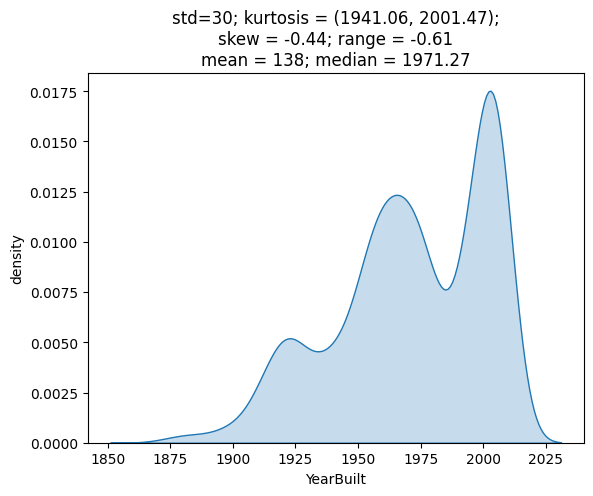

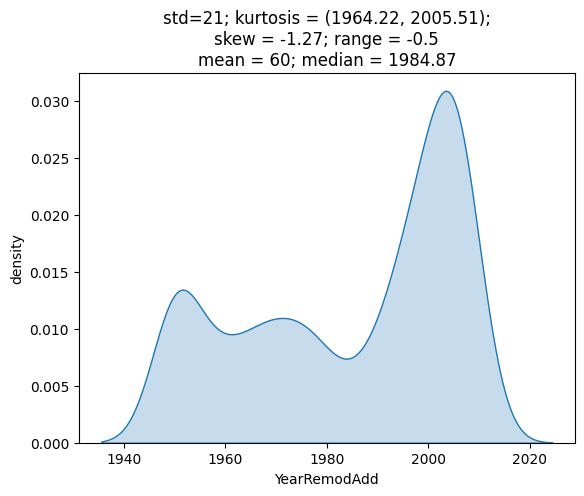

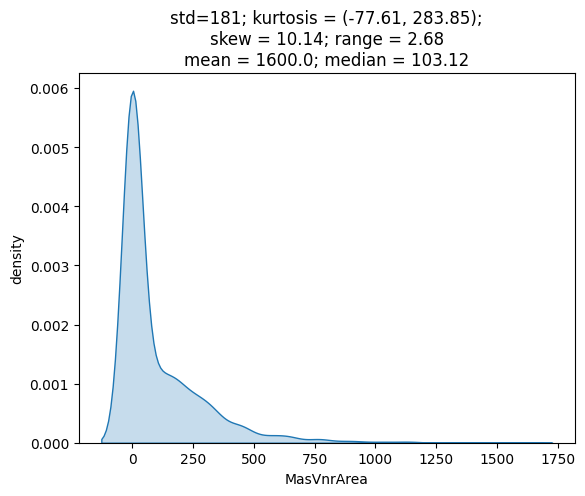

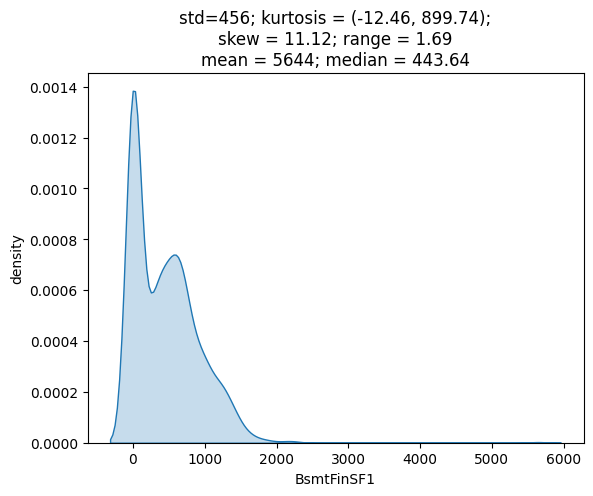

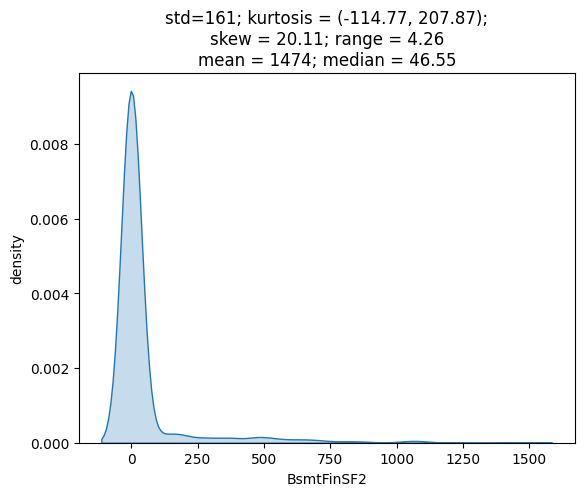

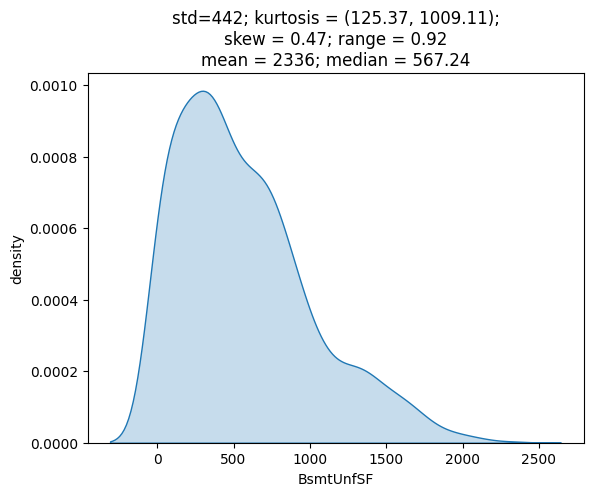

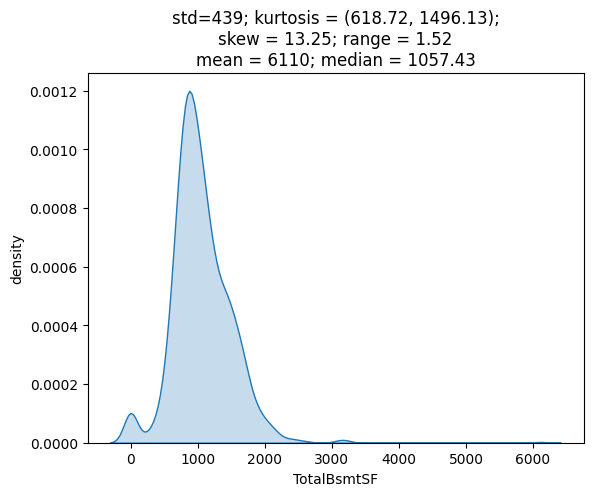

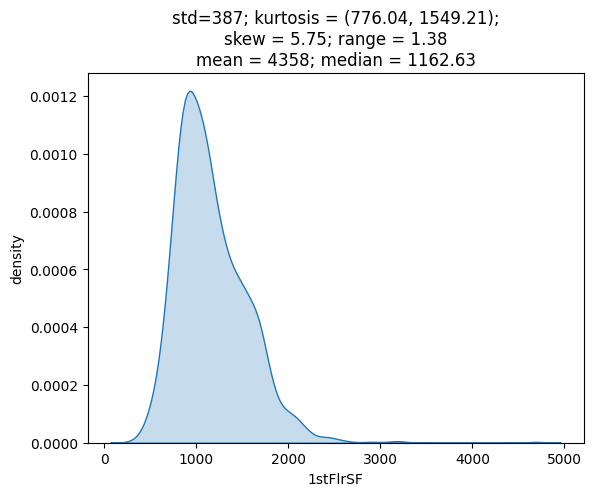

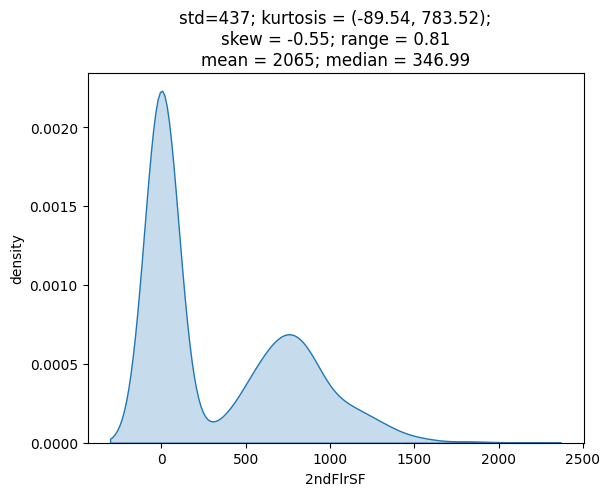

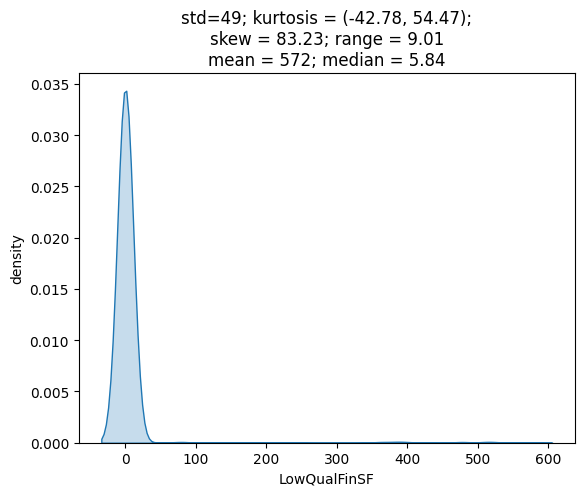

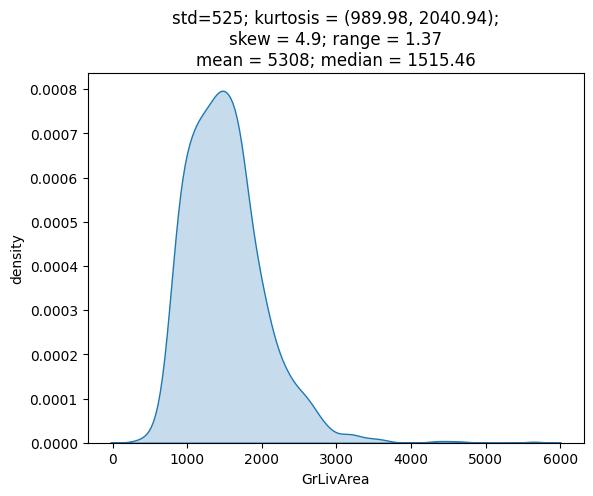

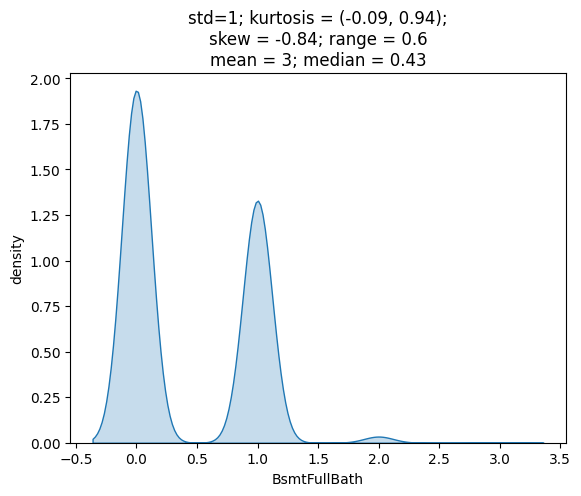

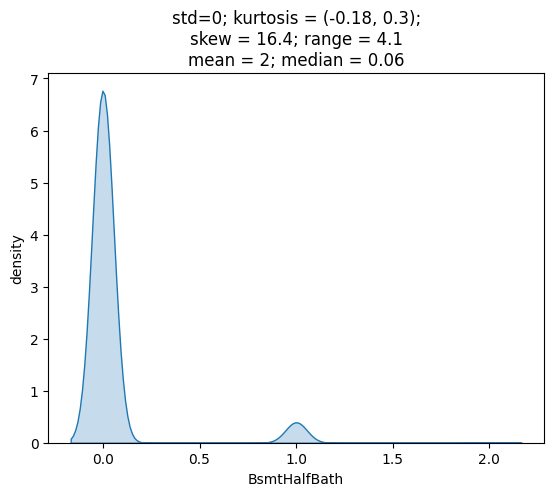

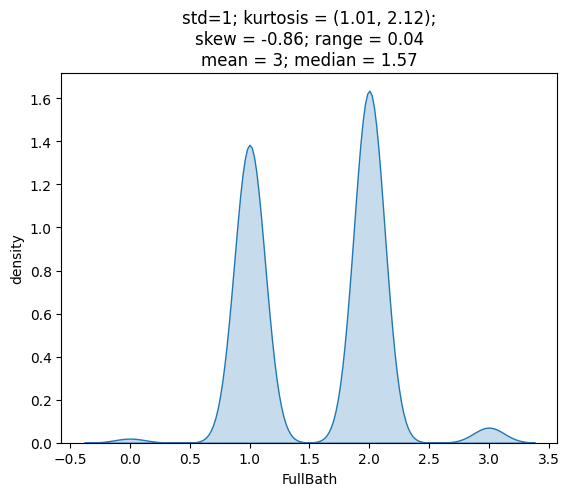

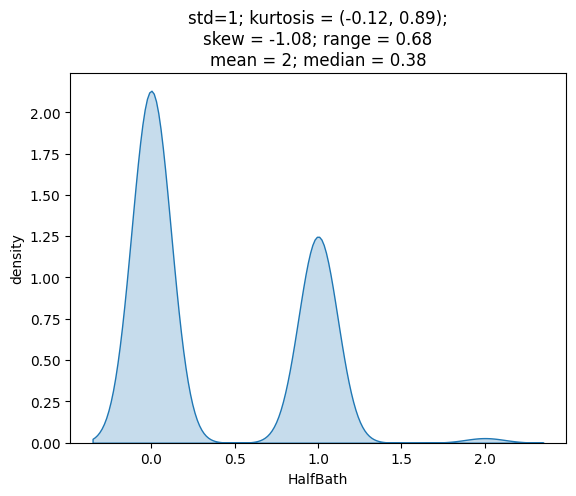

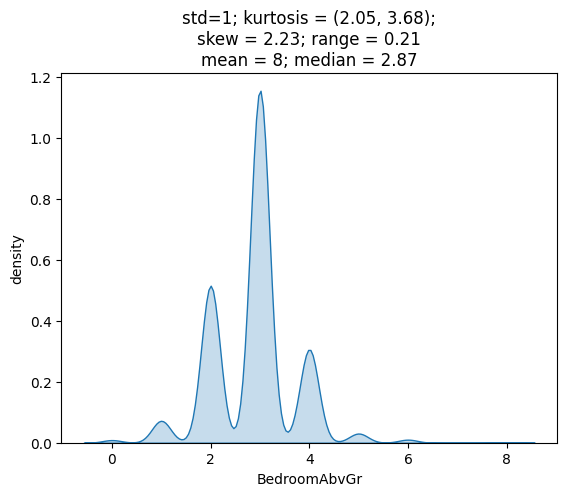

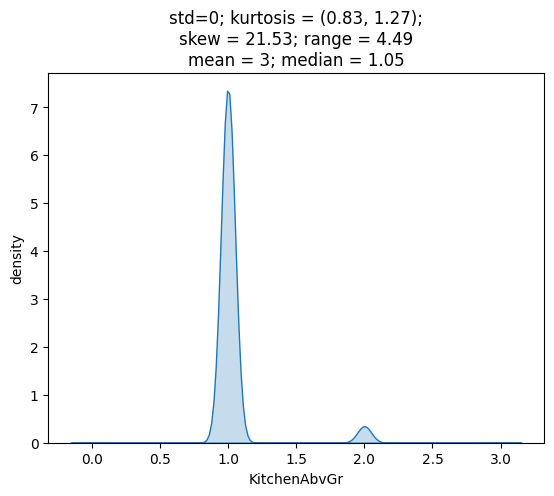

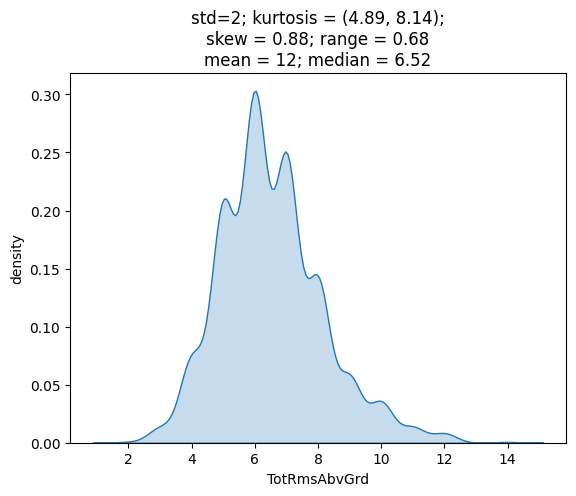

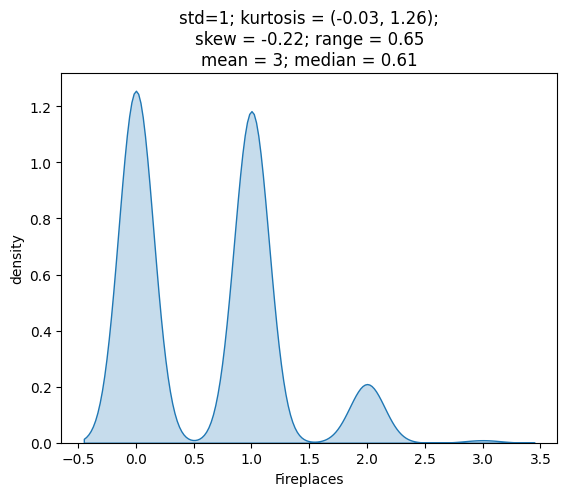

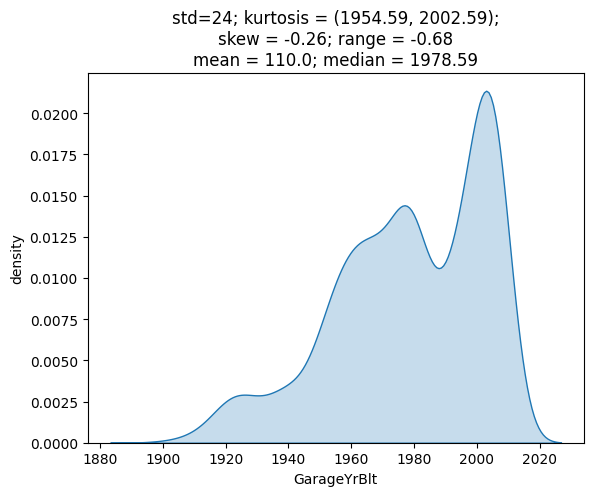

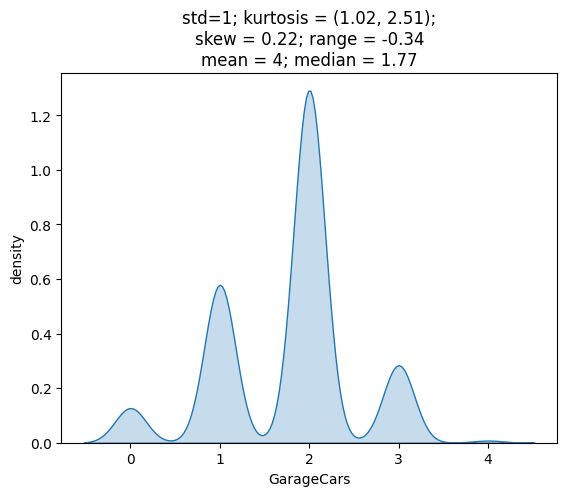

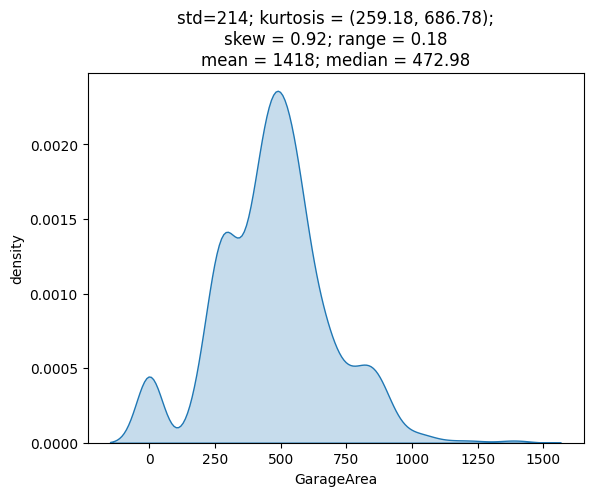

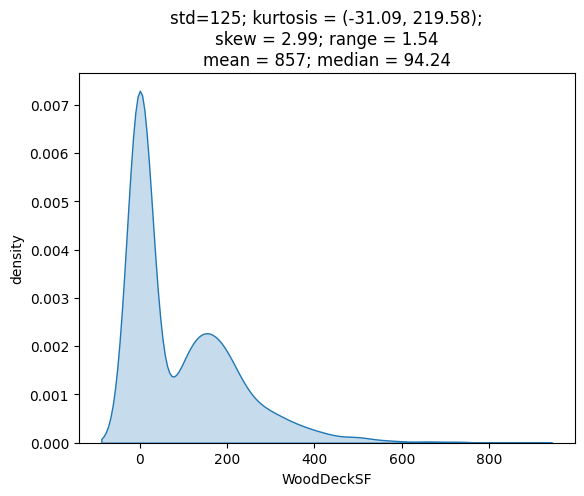

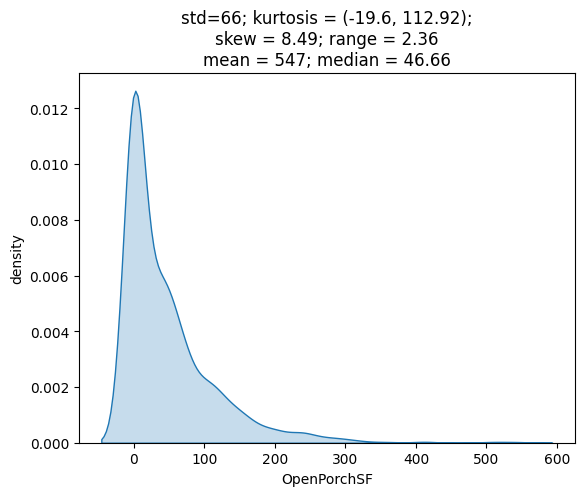

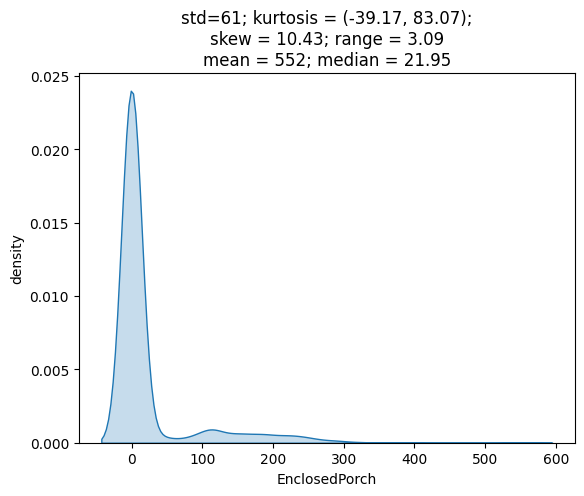

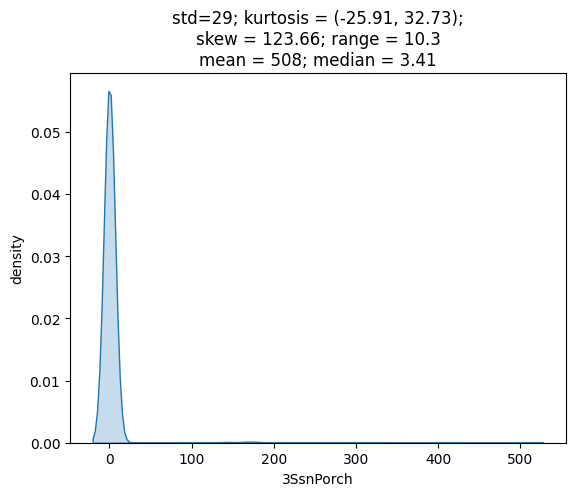

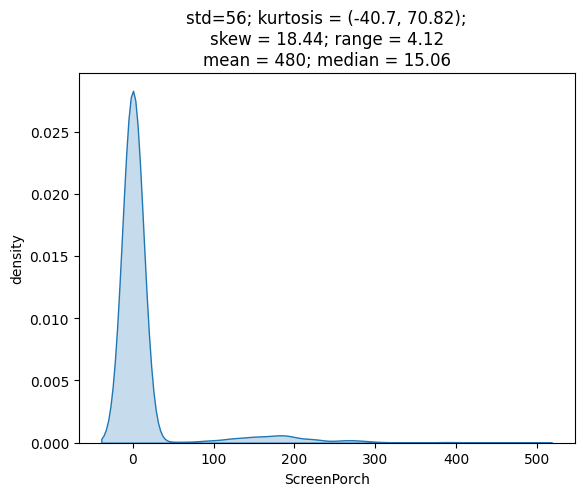

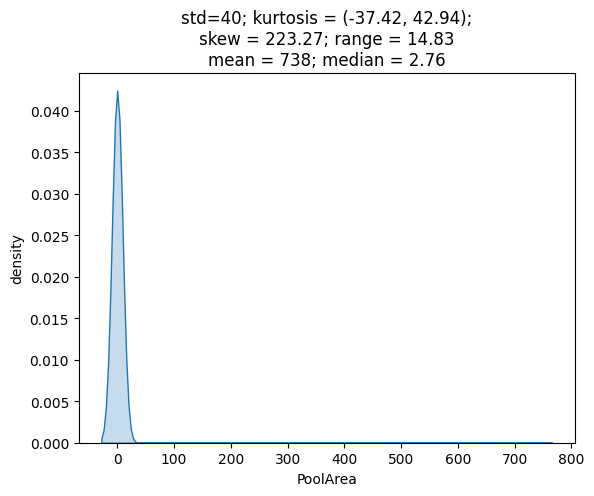

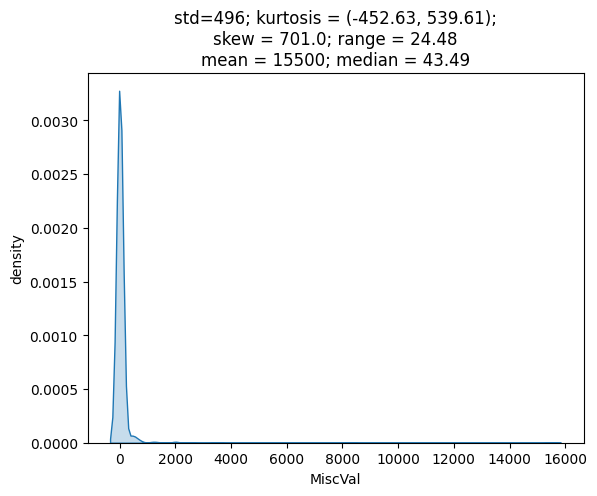

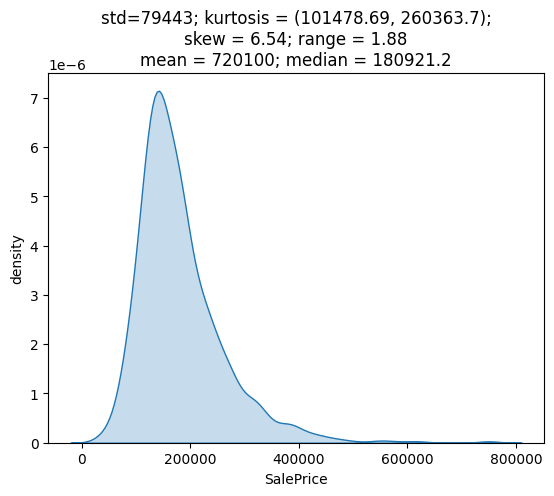

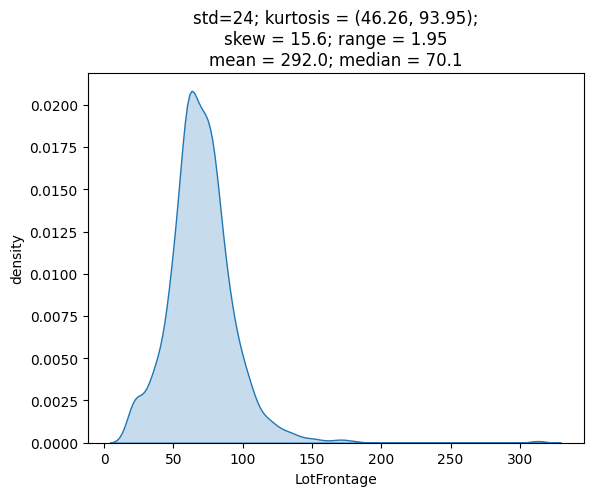

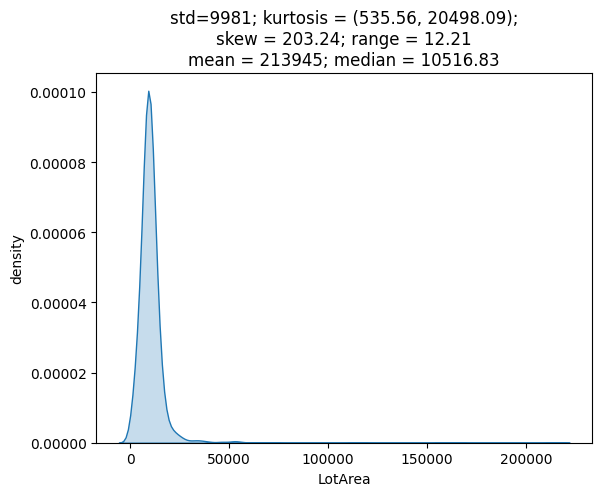

In [26]:
#Calling UVA_numeric funciton
UVA_numeric(data,continuous_vars)



**Summary**:
1**.LotArea**-
       The variable exhibits a relatively high standard deviation, indicating a wide spread of values around the mean. The positive kurtosis value suggests a heavy-tailed distribution with a relatively large number of outliers or extreme values. The positive skewness indicates that the distribution is skewed to the right, with a longer tail on the right side.
Overall, the variable shows significant variability and deviation from a normal distribution, with a pronounced right skewness and high kurtosis, indicating the presence of outliers or extreme values in the upper range of the distribution

2.**YearBuilt**-The variable has a relatively low standard deviation of 30, indicating a narrow spread of values around the mean. The negative kurtosis value suggests a slightly flatter distribution compared to a normal distribution. The negative skewness indicates that the distribution is slightly skewed to the left, with a longer tail on the left side

3.**BsmtUnfSF**:The variable has a high standard deviation of 442, indicating a wide spread of values around the mean. The positive kurtosis value of 0.47 suggests a slightly heavier tail compared to a normal distribution. The positive skewness of 0.92 indicates that the distribution is skewed to the right, with a longer tail on the right side.
4.1stFlrSF:the variable exhibits a wide range of values with a relatively high standard deviation and positive skewness, indicating a skewed distribution with a longer tail on the right side. The high positive kurtosis suggests a significant presence of outliers or extreme values in the upper range of the distribution

5.**Overall** summary :In the above graph we can see the some variables are normally distributed and some have low outliers while some have high outliers. we can also see there is left skewness and right skewness.
positive kurtosis indicates a more peaked and heavy-tailed distribution, while negative kurtosis indicates a flatter and light-tailed distribution relative to a normal distribution


In [30]:
# 2. function for visualisation of Categorical Variables and it bar graph distribution
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)


  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  # Define a color palette with different colors for each category
    colors = sns.color_palette('Set3', n_colors=n_uni)

  #Plotting the variable with every information
    plt.bar(norm_count.index,norm_count,color=colors,width=1)
    plt.xlabel('SaleCondition', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title('top 3 value counts\n{};'.format(norm_count[0:3]))
    plt.show()



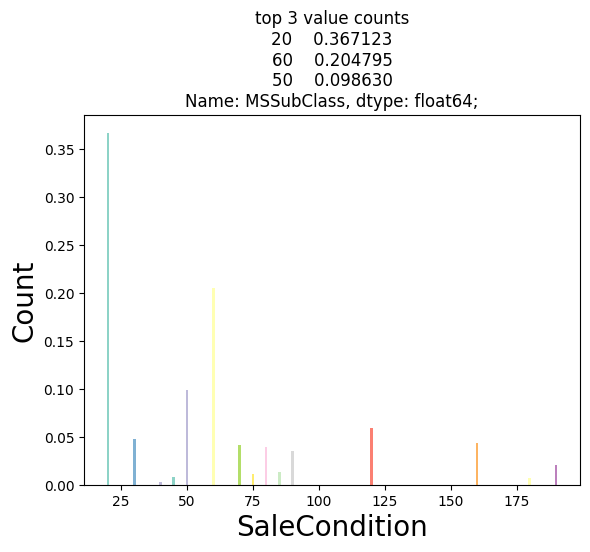

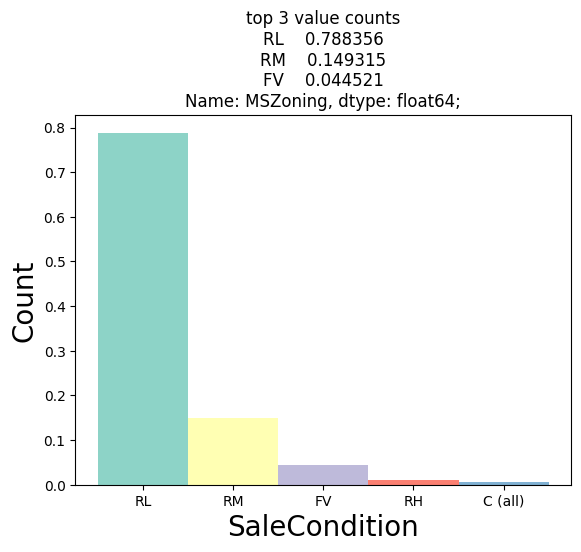

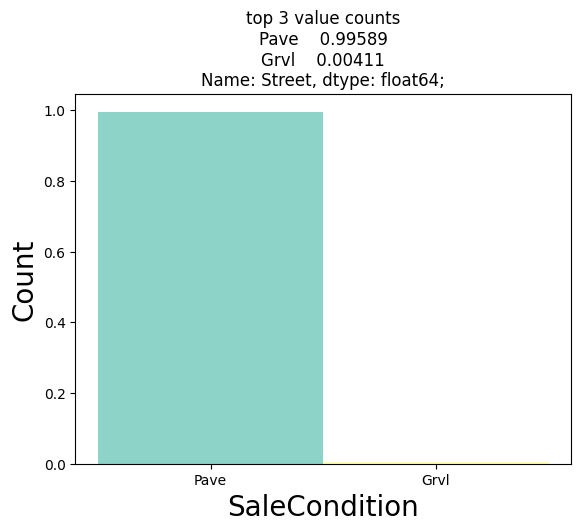

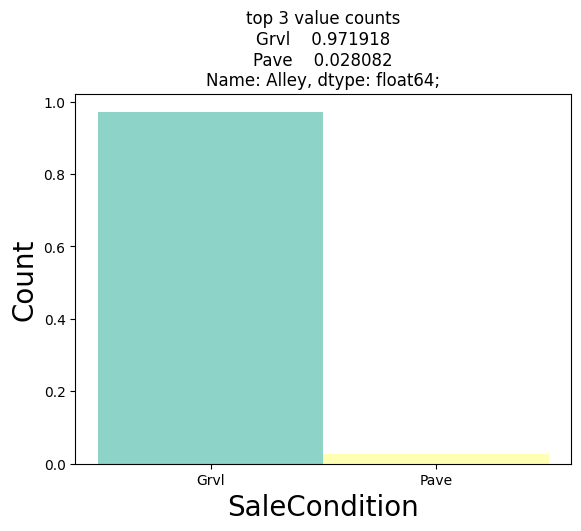

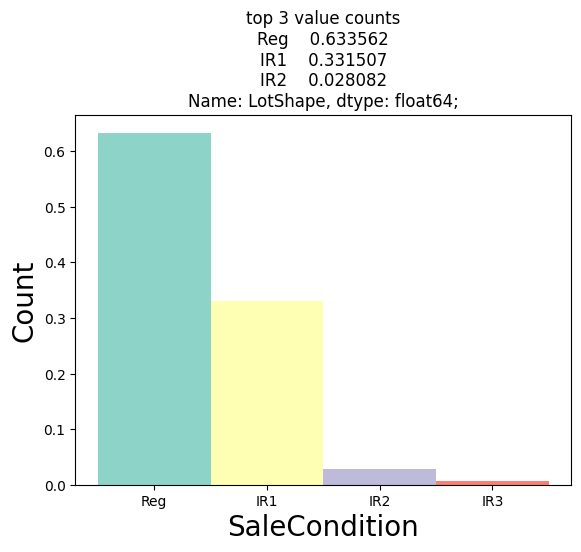

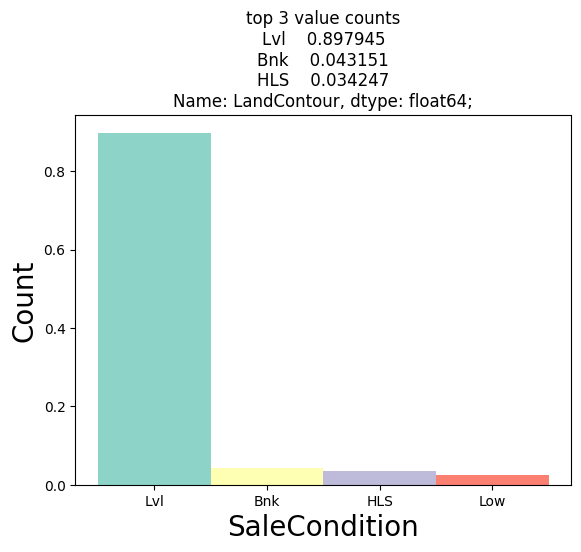

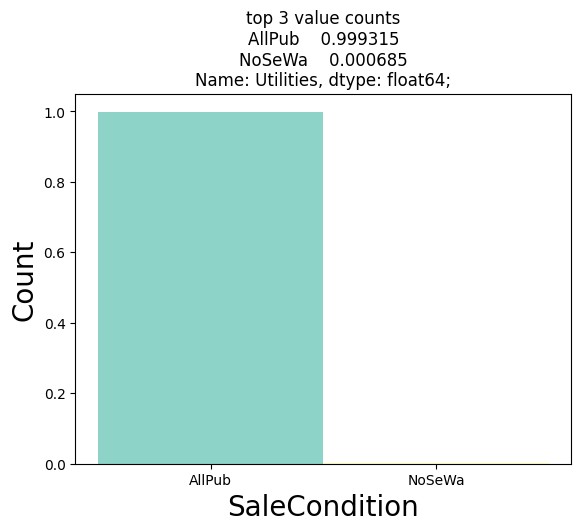

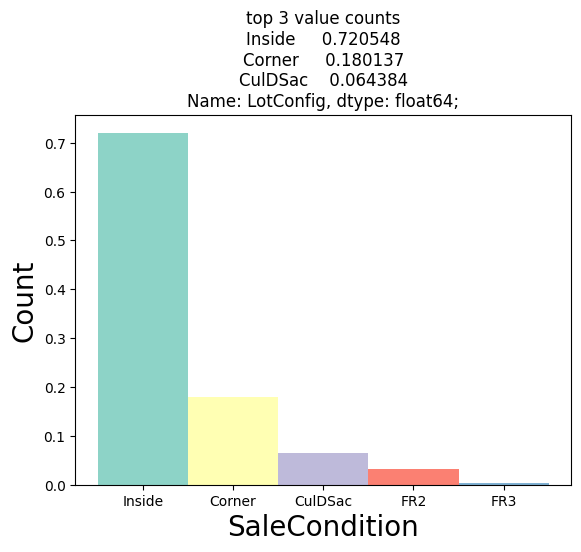

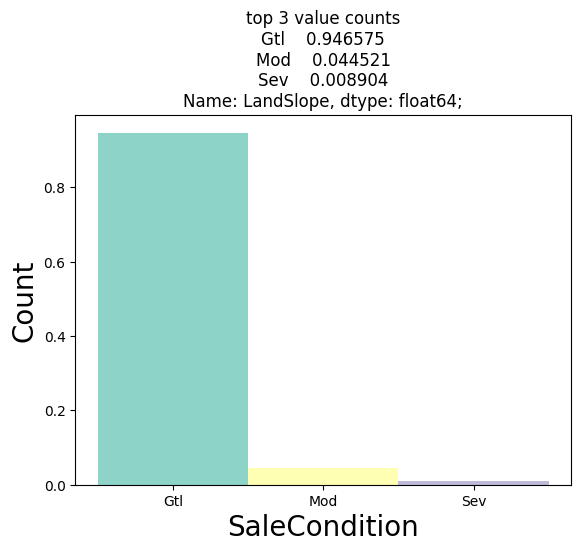

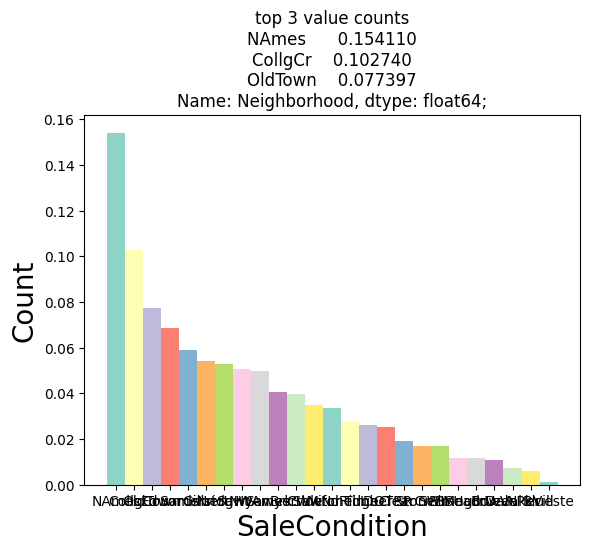

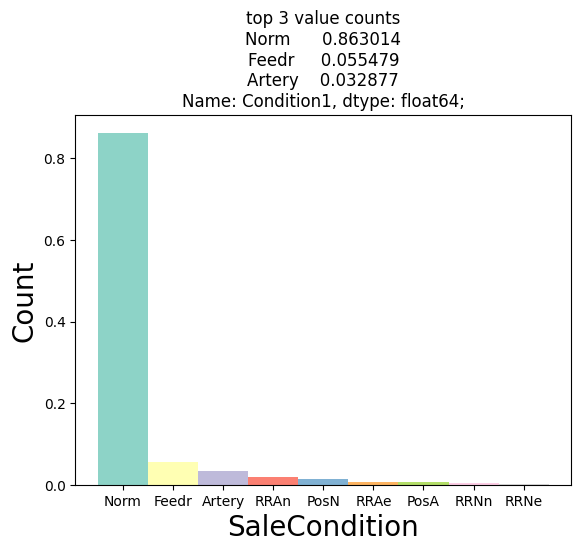

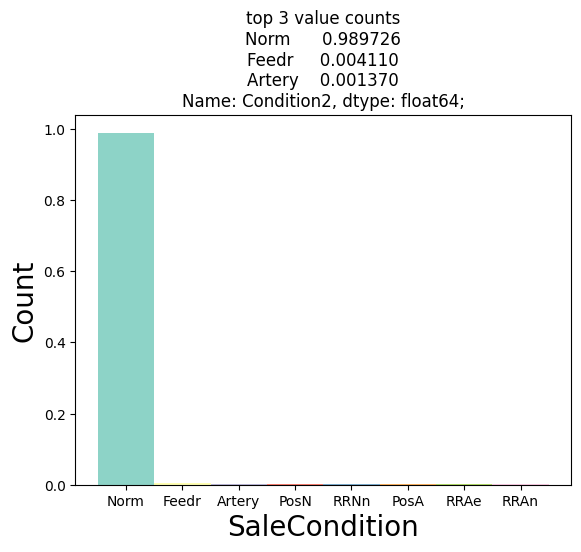

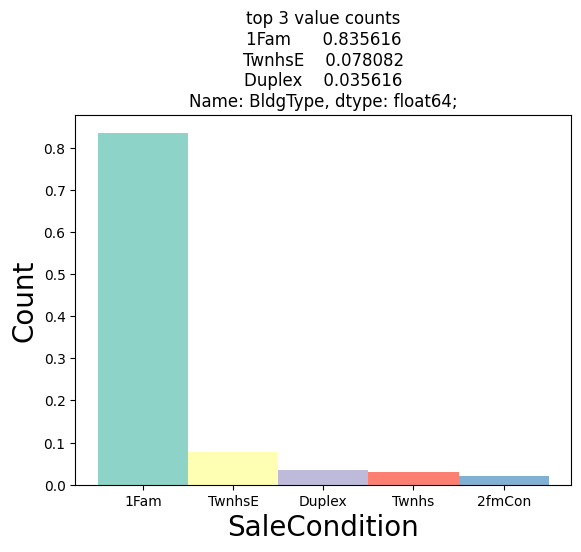

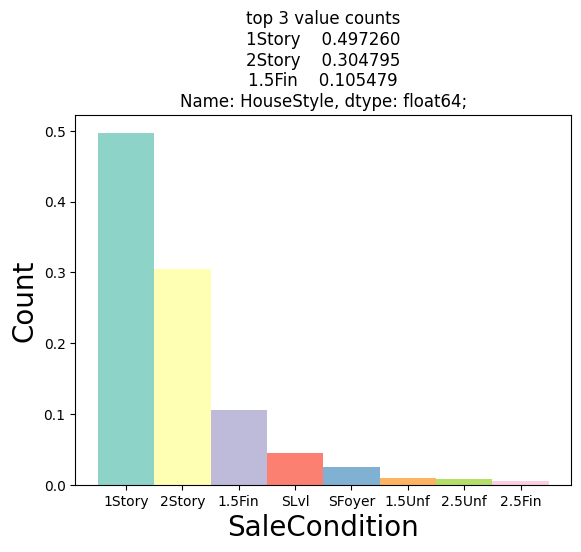

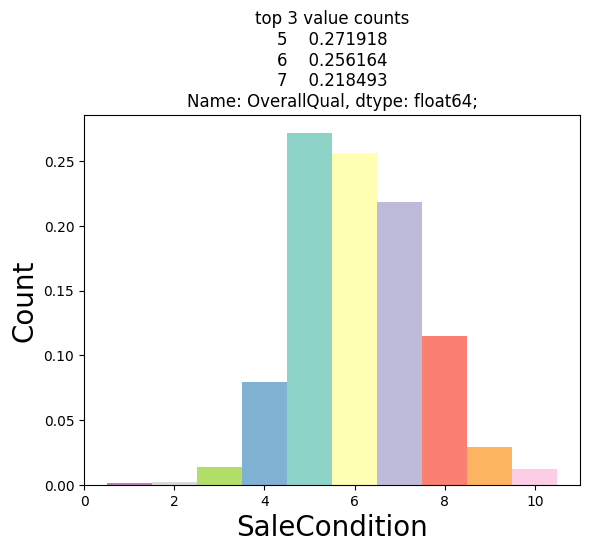

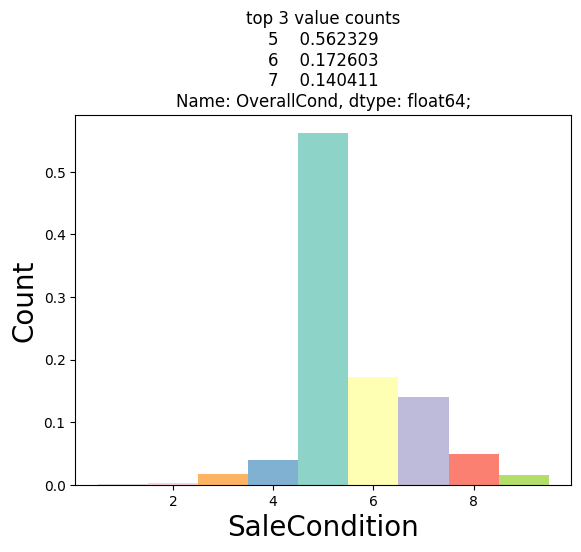

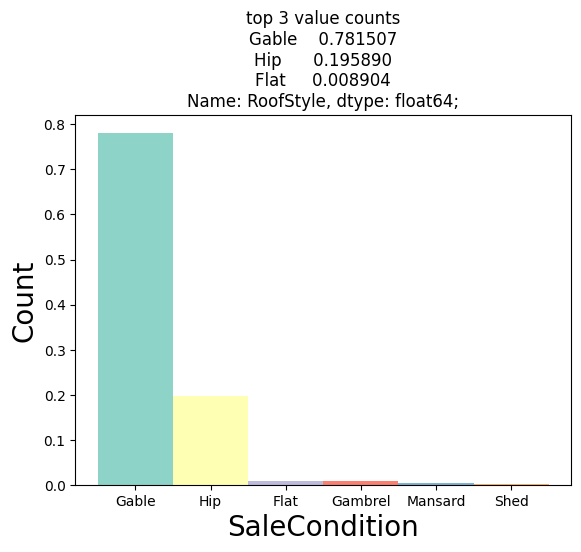

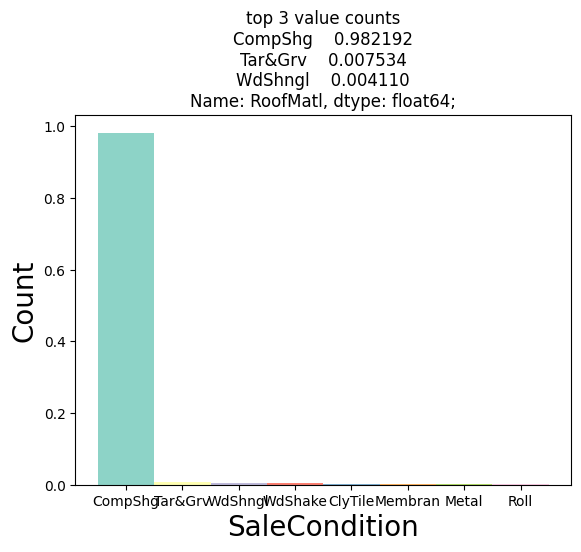

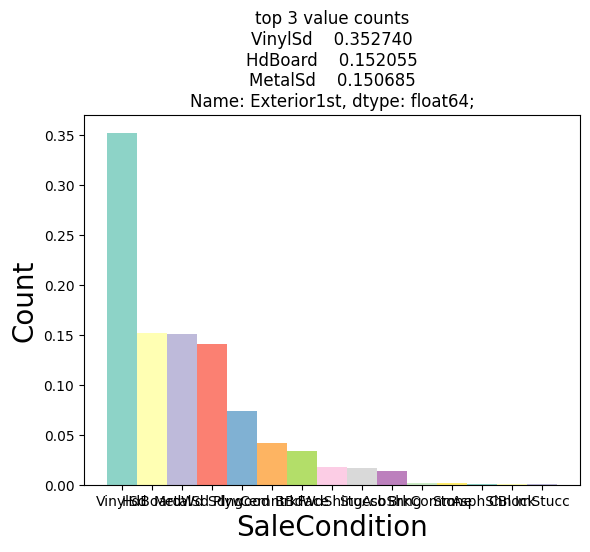

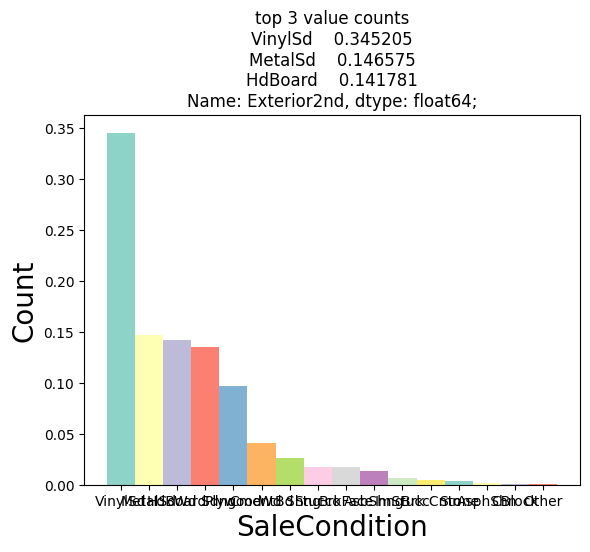

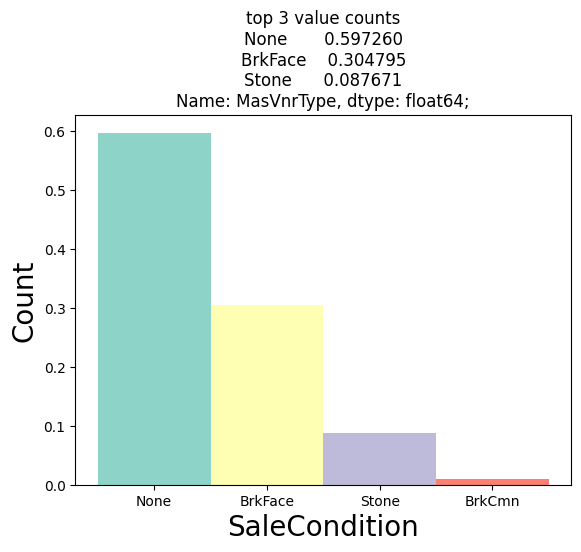

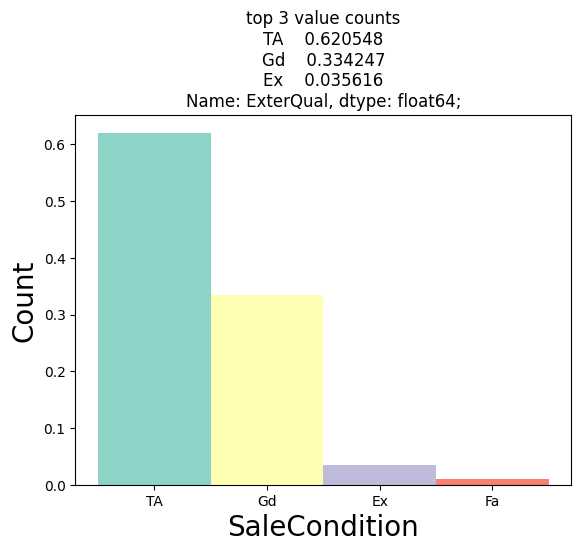

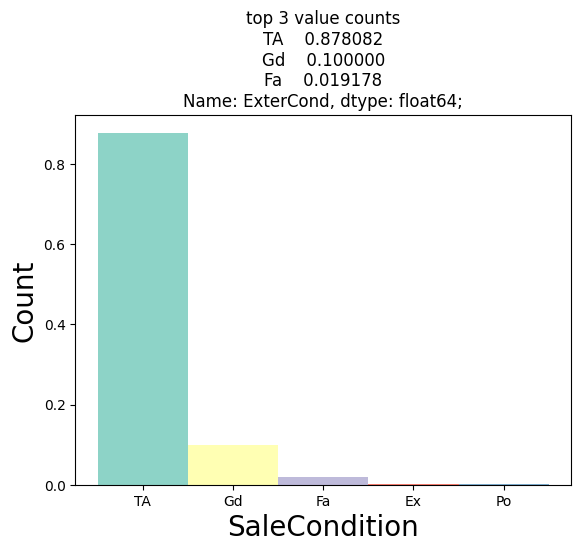

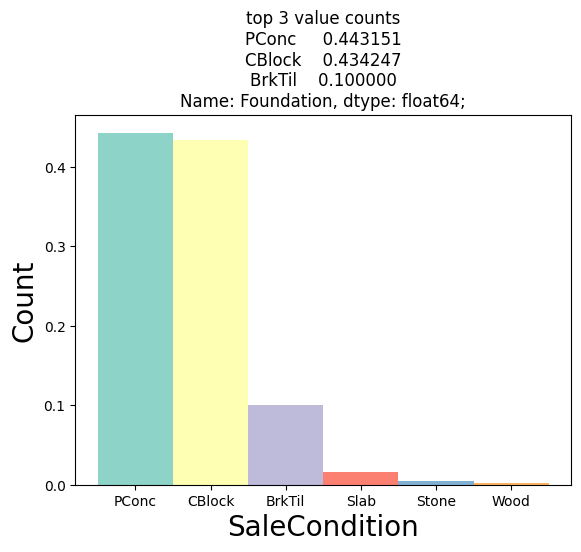

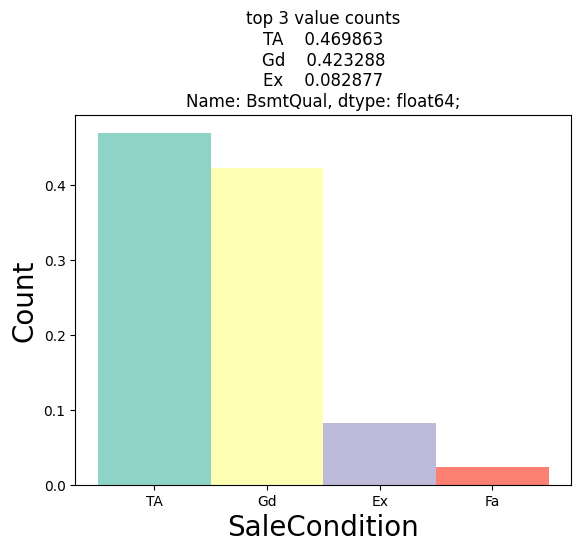

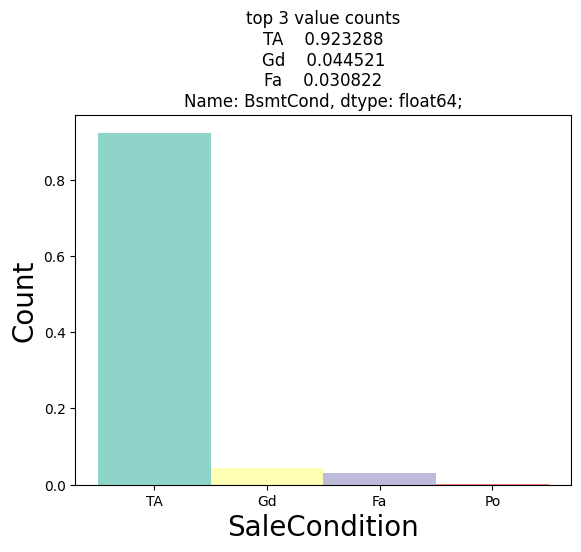

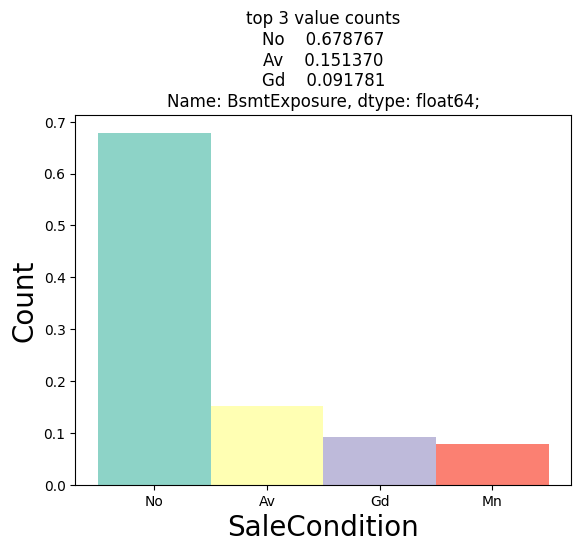

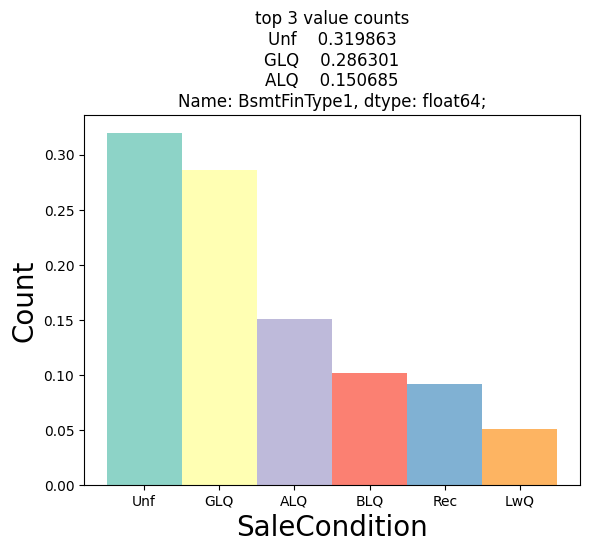

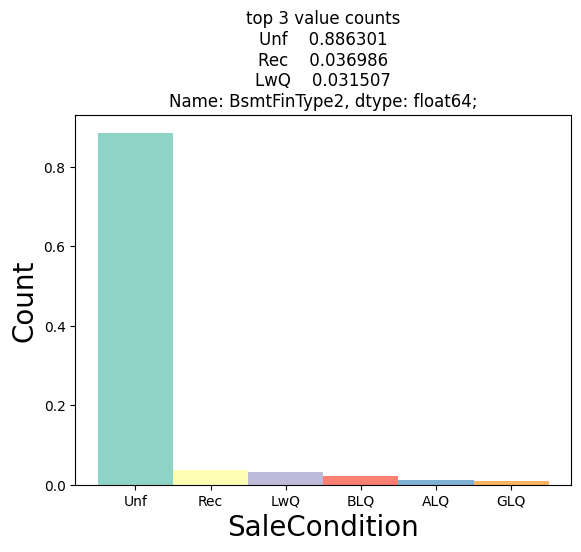

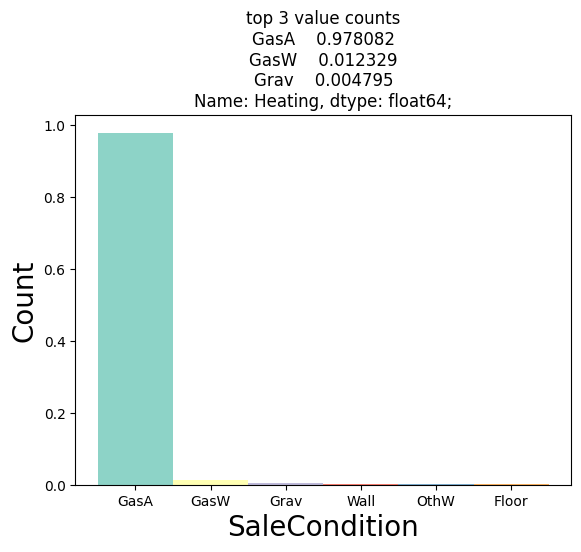

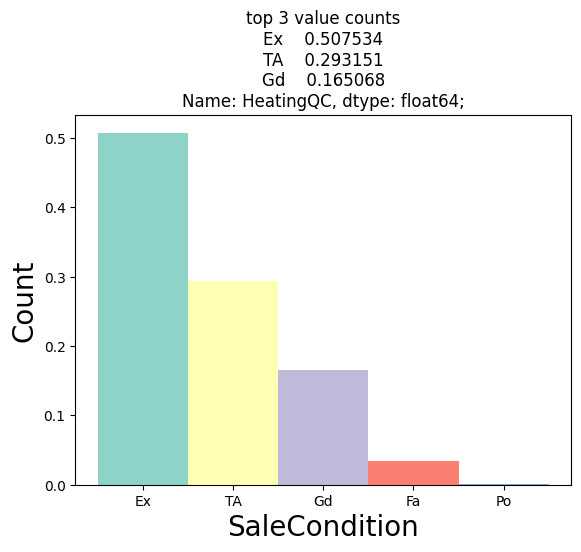

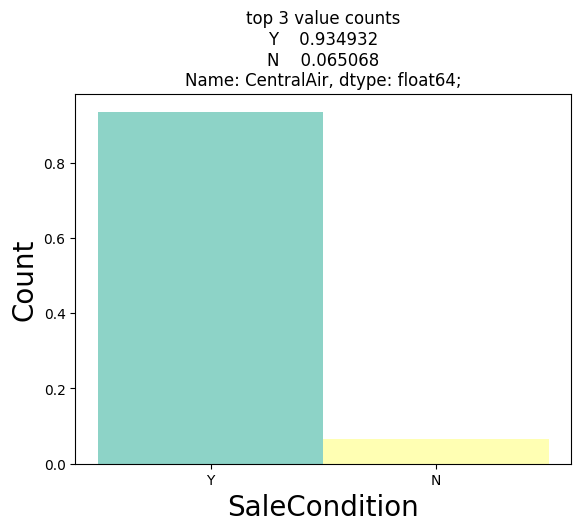

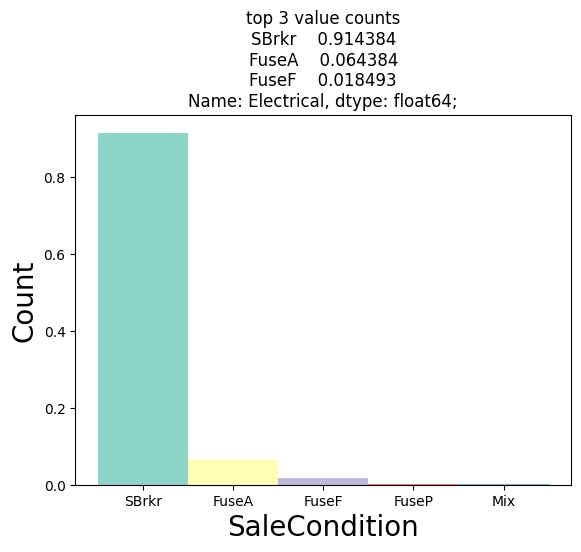

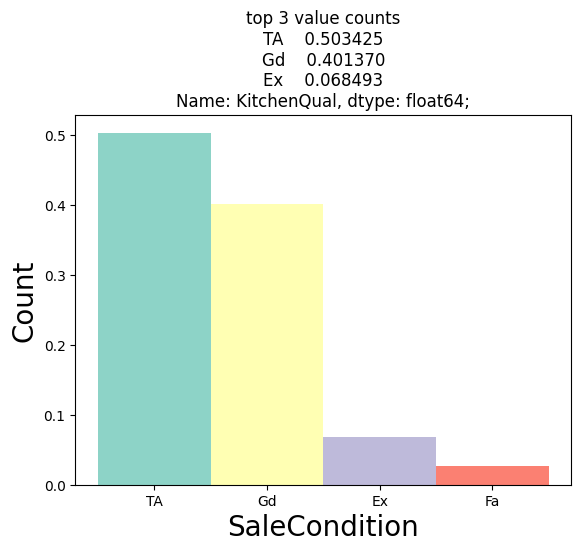

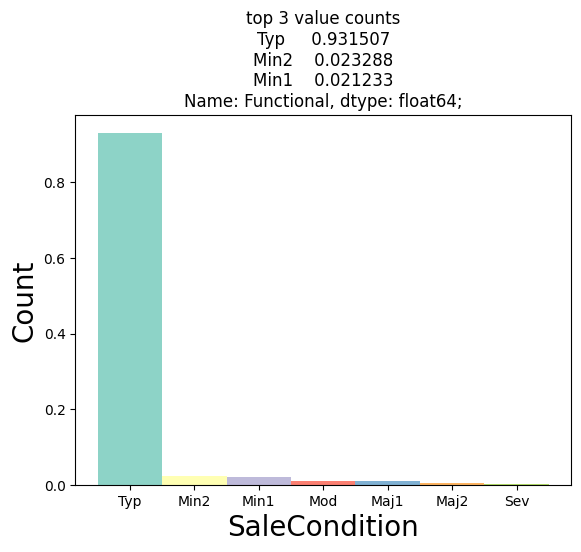

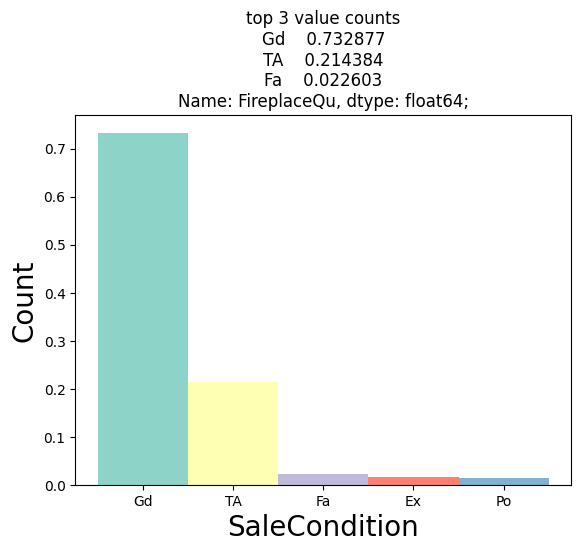

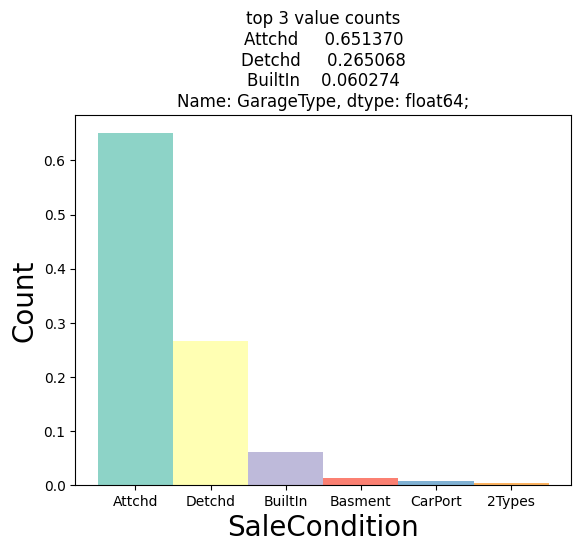

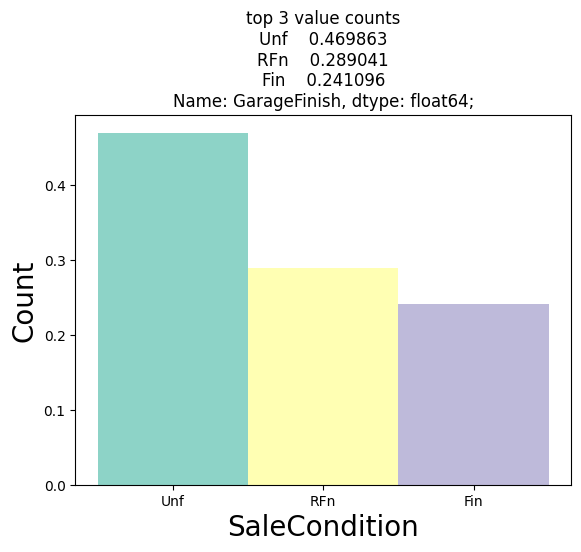

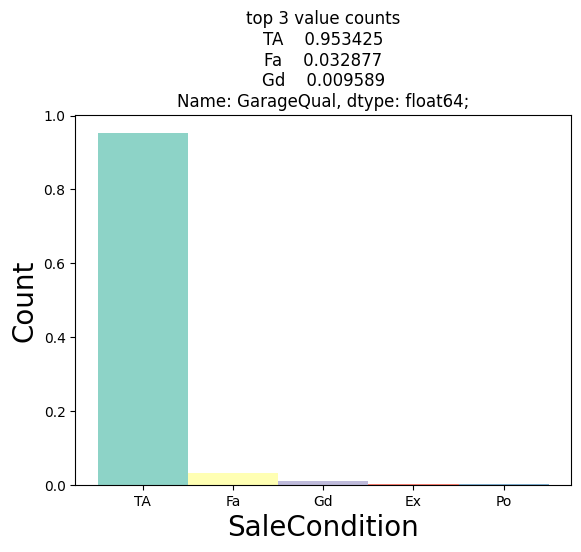

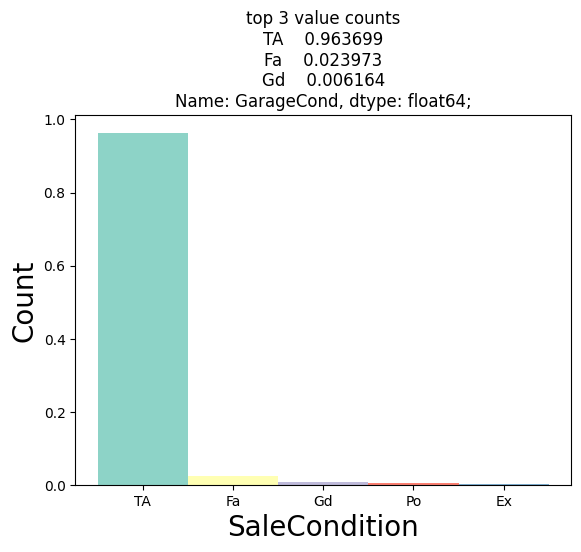

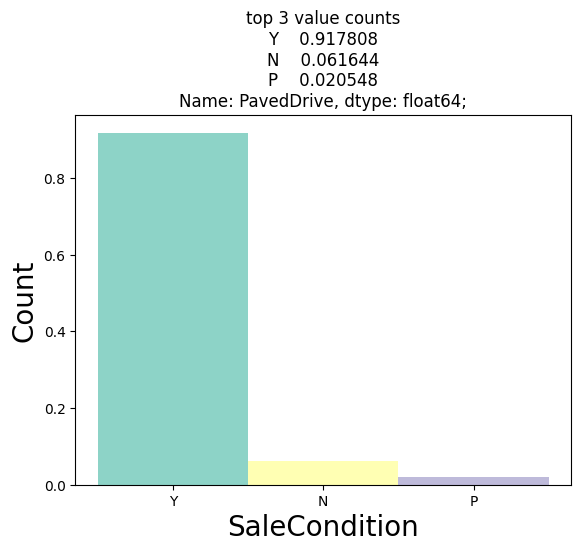

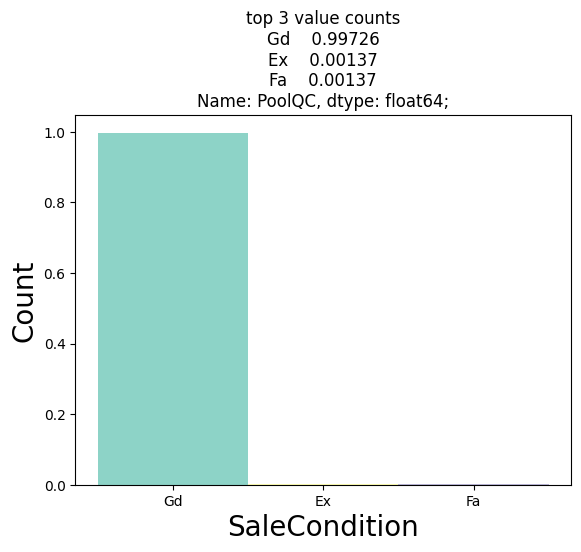

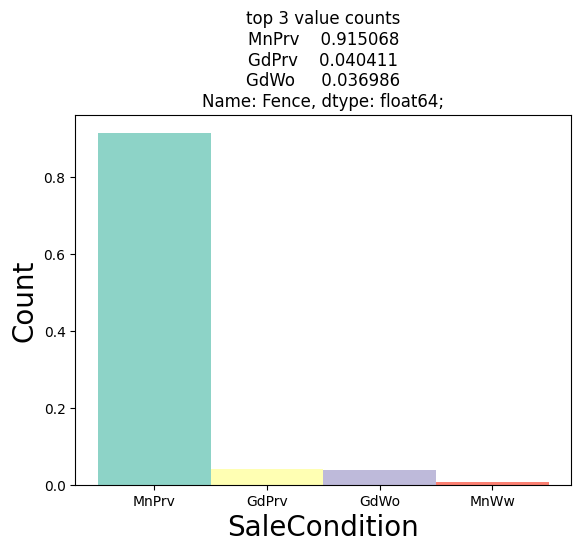

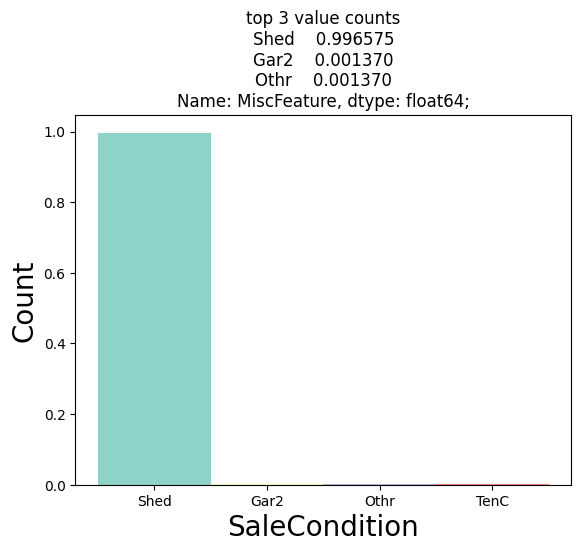

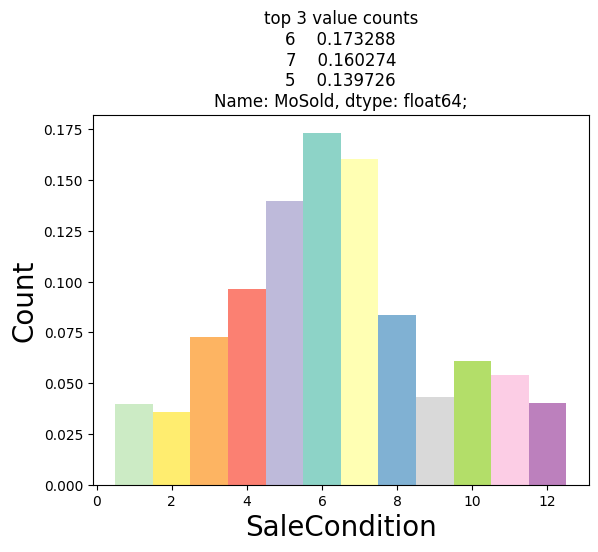

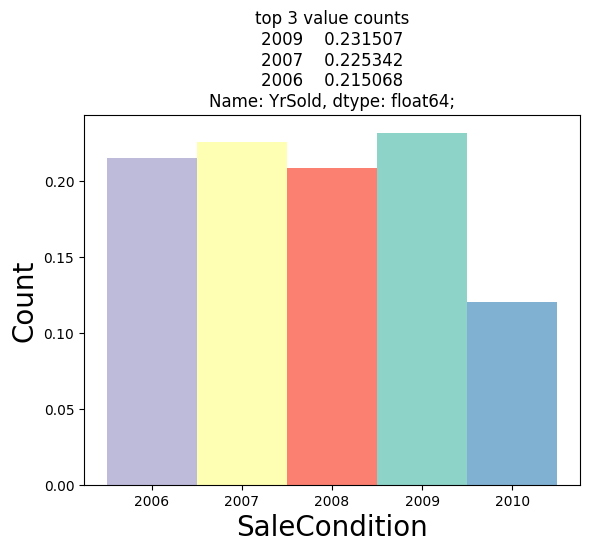

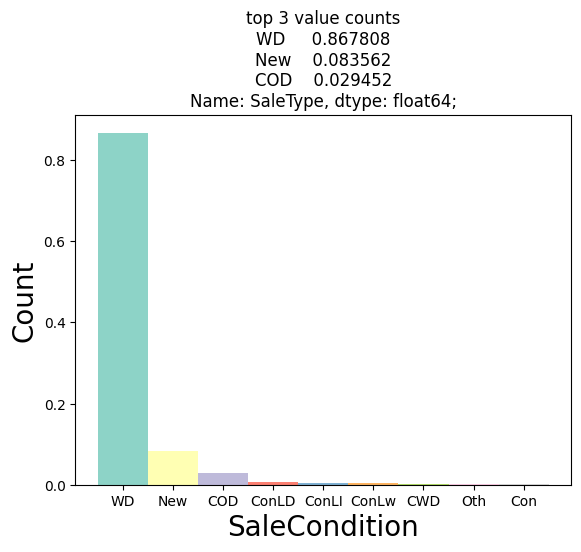

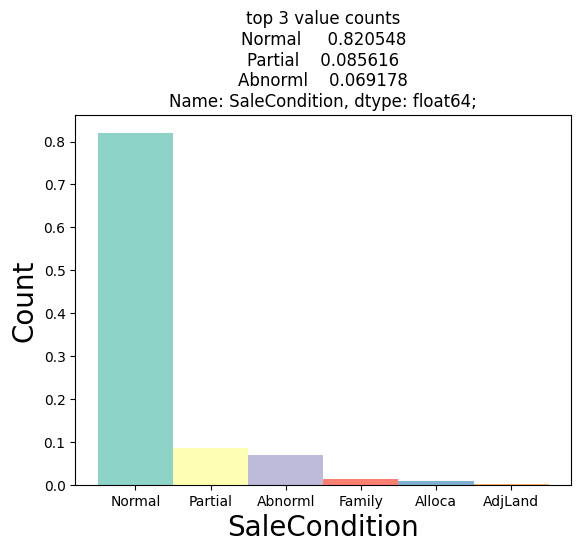

In [31]:
#calling UVA_category function
UVA_category(data,category_vars)

Summary:
**MSSubClass**: The majority of the dwellings involved in the sale belong to two categories, 20 and 60,
which together account for more than 58% of the total MSSubClass values.

**MSZoning:** The RL type of zoning is the most prevalent, constituting approximately 79% of the observations.

**Street**: The vast majority, around 99.5%, of the properties have a paved street, while a very small percentage have a gravel street.

**Alley**: The variable "Alley" represents the type of alley access to the property.
It is observed that the number of properties with a gravel alley is slightly higher compared to other types of alley access.

**LotShape**: The general shape of the properties is primarily regular, accounting for approximately 63% of the observations.

**LandContour:** The majority of the properties exhibit a flat level, with approximately 90% of the data falling under this category.

**Utilities:** The "Utilities" variable indicates the type of utilities available. The vast majority, around 99%, have access to all public utilities, including electricity, gas, water, and sewage.

**HouseStyle:** The analysis reveals that the most common house style is "1Story," which comprises approximately 50% of the observations.

**RoofStyle:** The "RoofStyle" variable indicates the style of the roof. The analysis shows that "Gable" roofs are the most prevalent, accounting for around 78% of the data, followed by approximately 20% of roofs with a "Hip" style.
In summary:

the analysis provides insights into various features of the dataset. It reveals the predominant categories within each variable,
such as the most common dwelling type, zoning type, street type, and property shape.
These findings can help in understanding the distribution and characteristics of the data,
which may be useful for further analysis or decision-making processes related to the dataset.



In [32]:
#removing the saleprice from list as saleprice is target variable
continuous_vars.remove('SalePrice')

In [33]:
#Removing the outliers do we can clearnly visualize the grap and see the trend
# Dealing with outliers in the numerical variables
for i ,j in enumerate(continuous_vars):
  quant25=data[j].quantile(0.25)
  quant75=data[j].quantile(0.75)
  IQR=quant75-quant25
  median=data[j].median()
  # whisker
  whis_low=median-(1.5*IQR)
  whis_high=median+(1.5*IQR)
  # replacing outliers with max/min whisker

  data[j][data[j]>whis_high] = whis_high+1
  data[j][data[j]<whis_low] = whis_low-1

**Bivariate Analysis**



Visualize the relationship between continuous variables and the target variable

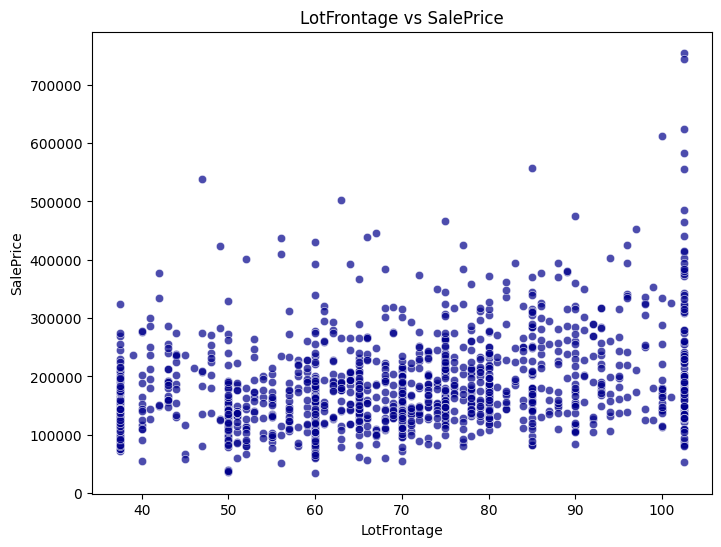

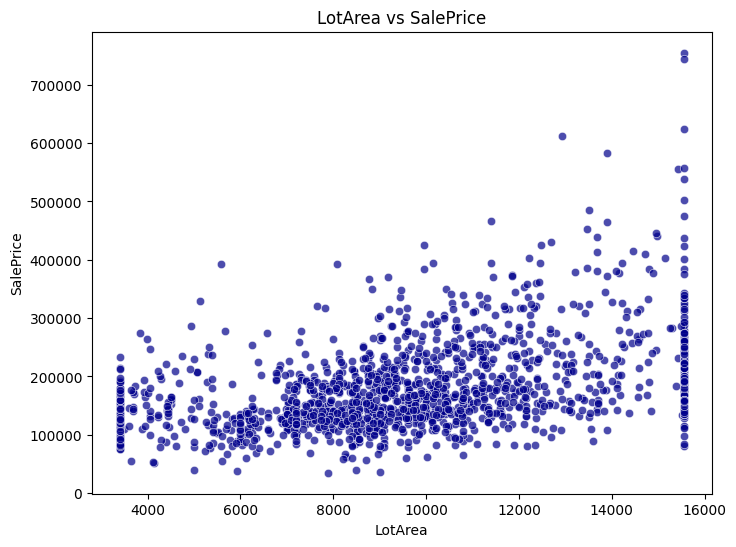

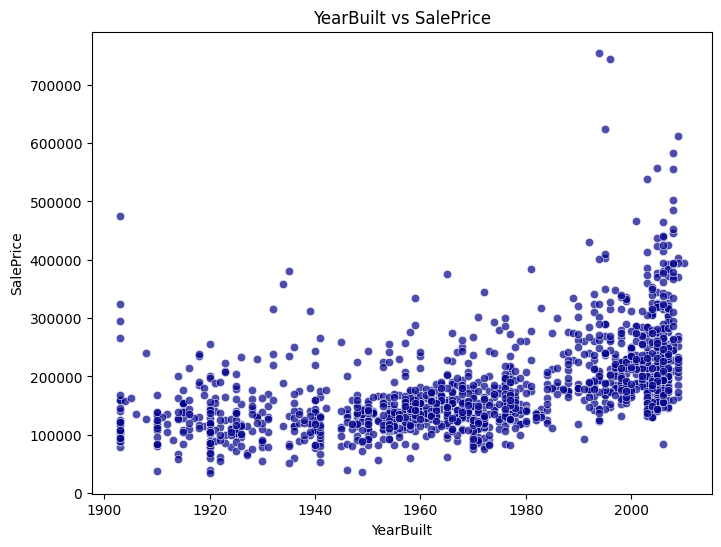

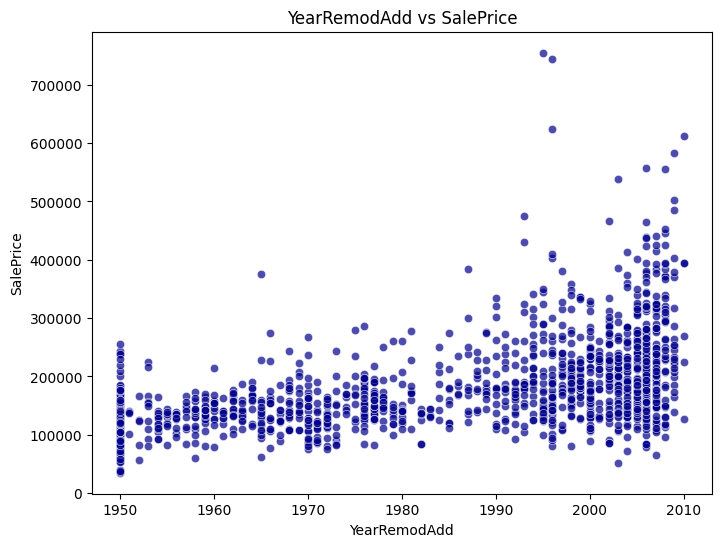

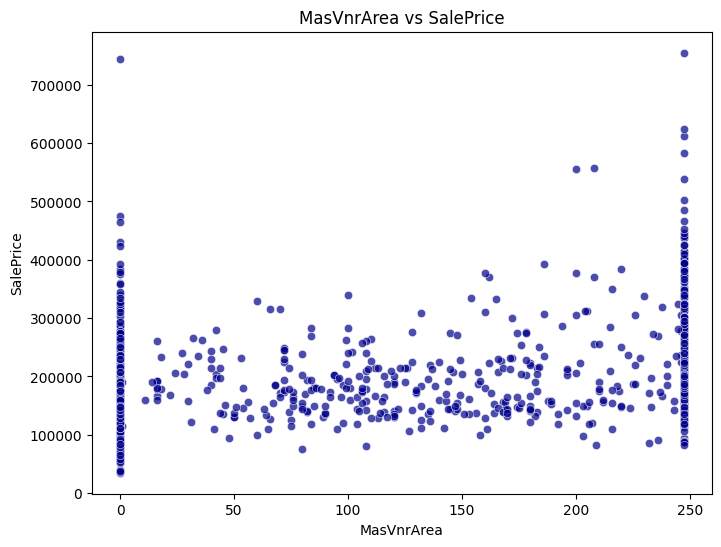

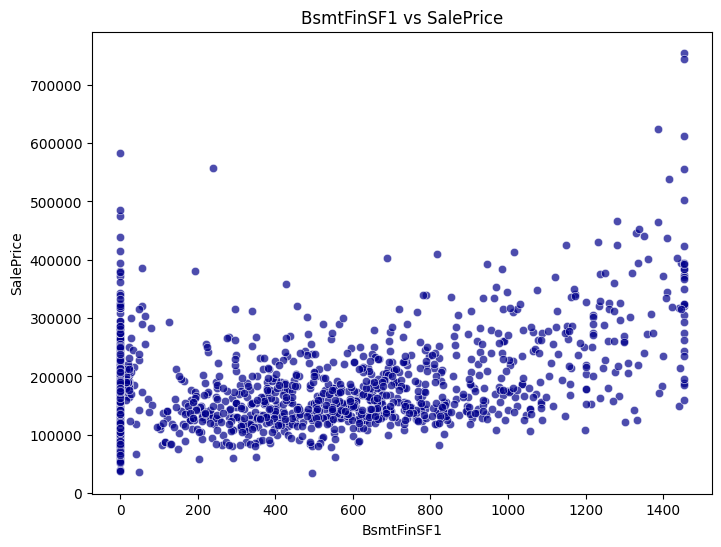

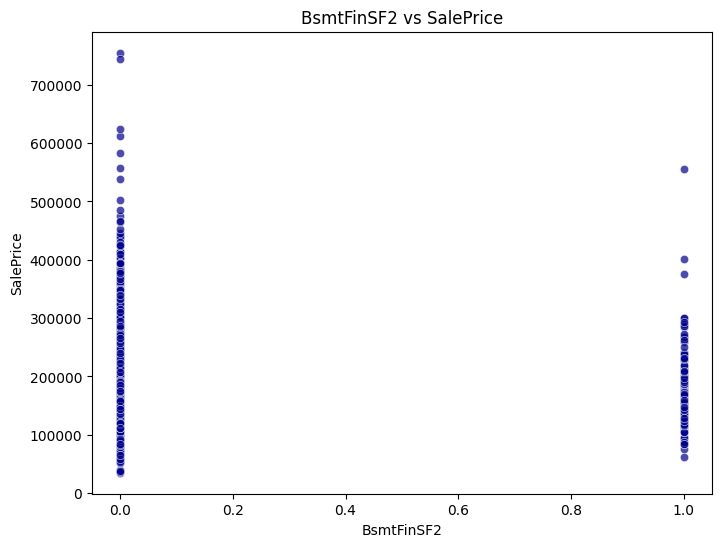

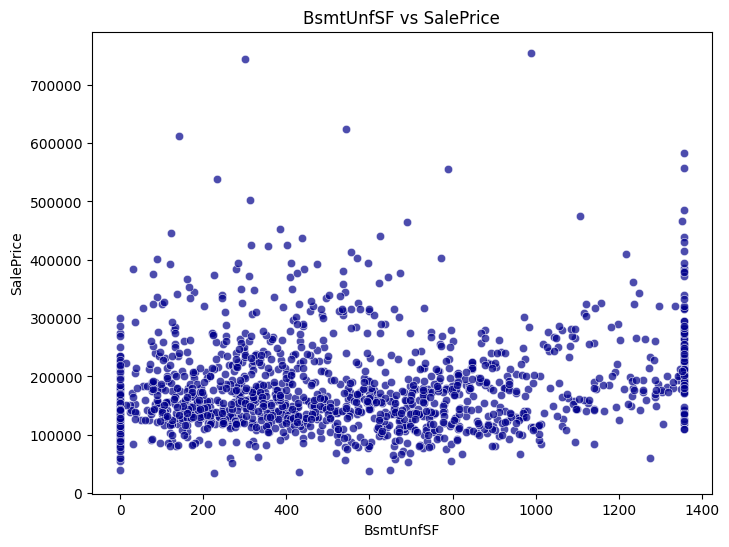

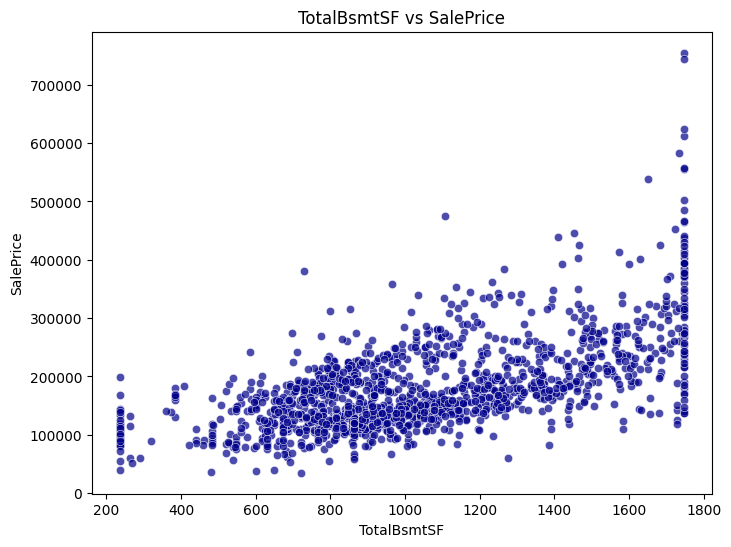

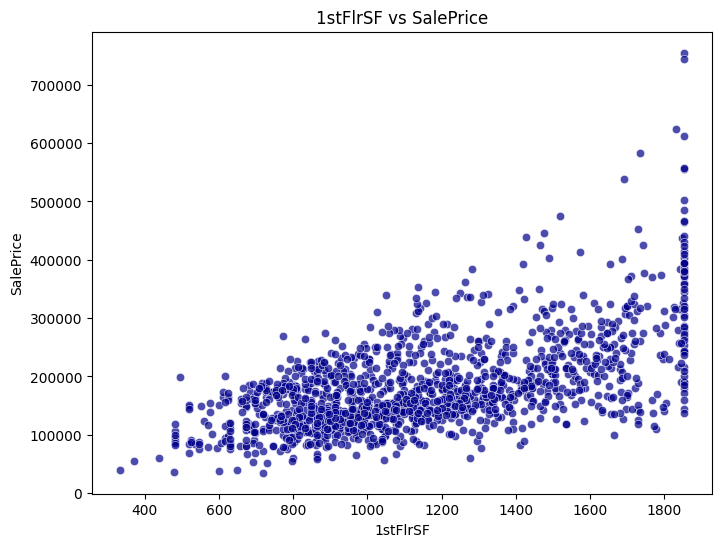

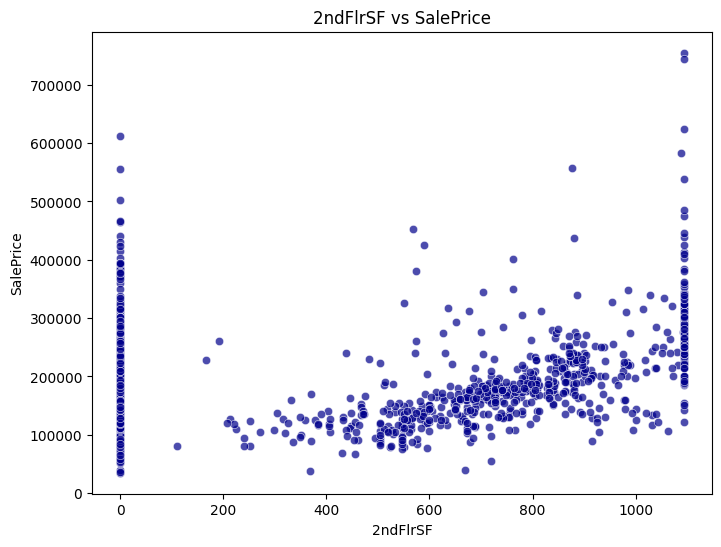

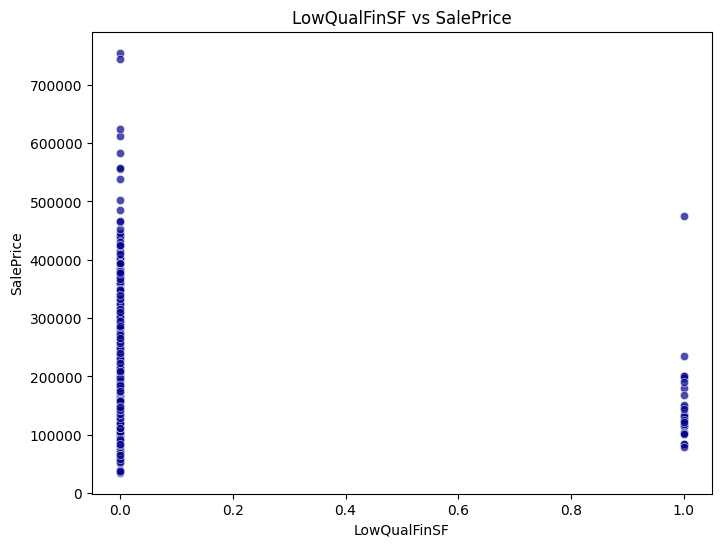

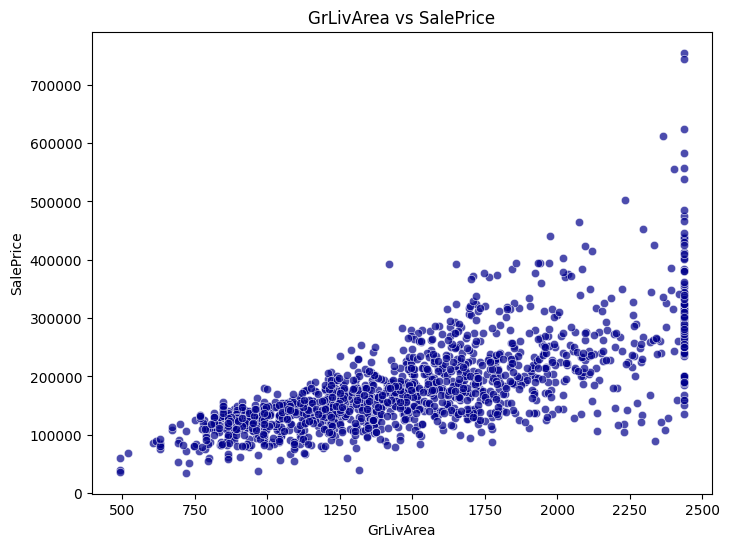

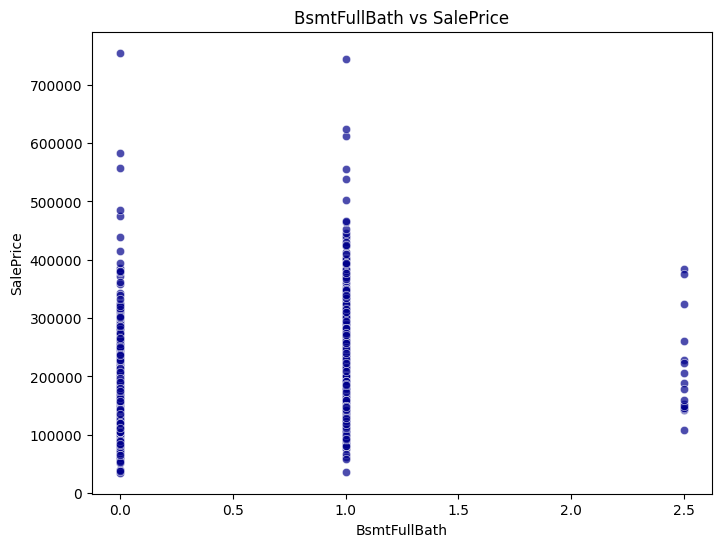

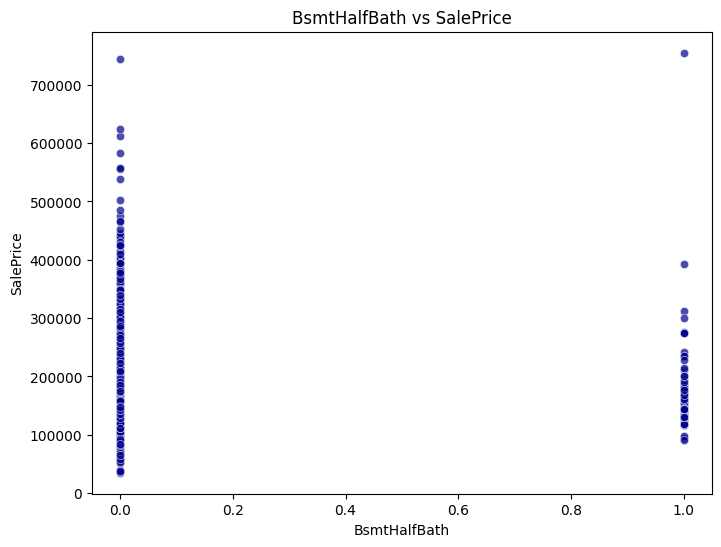

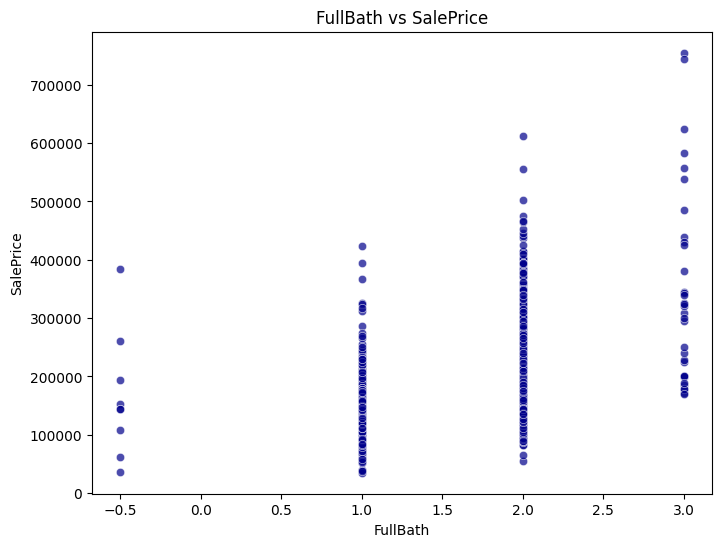

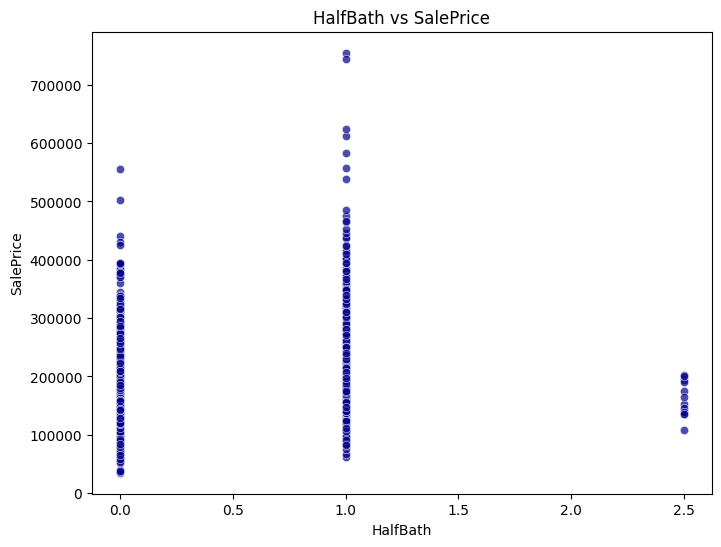

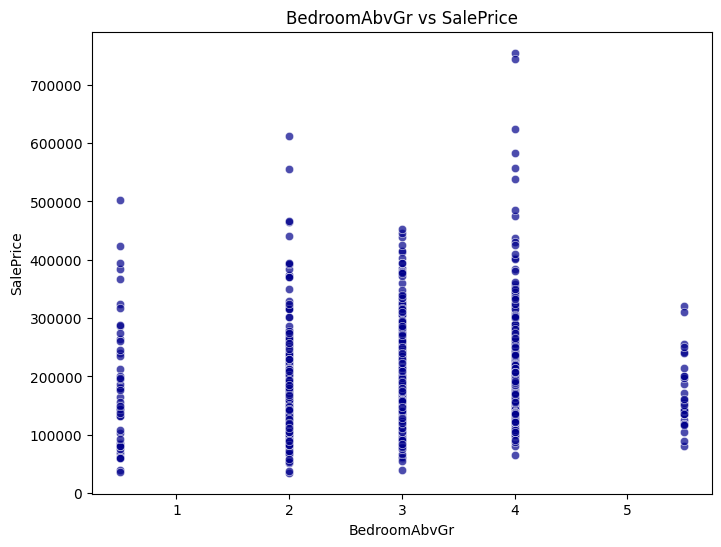

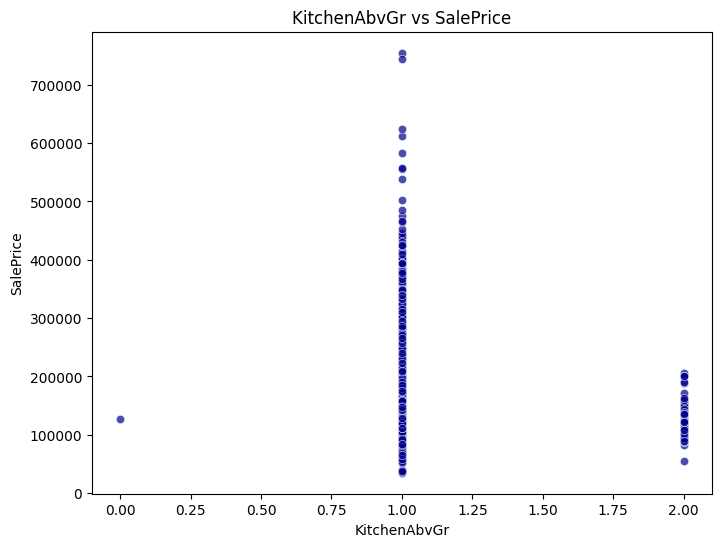

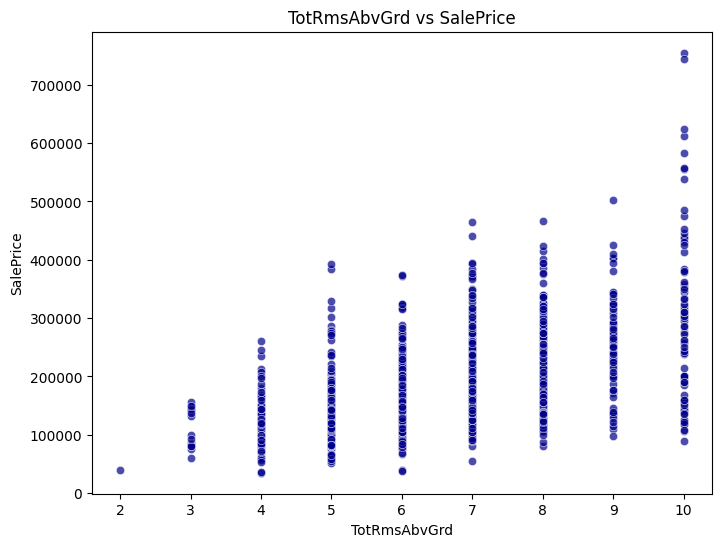

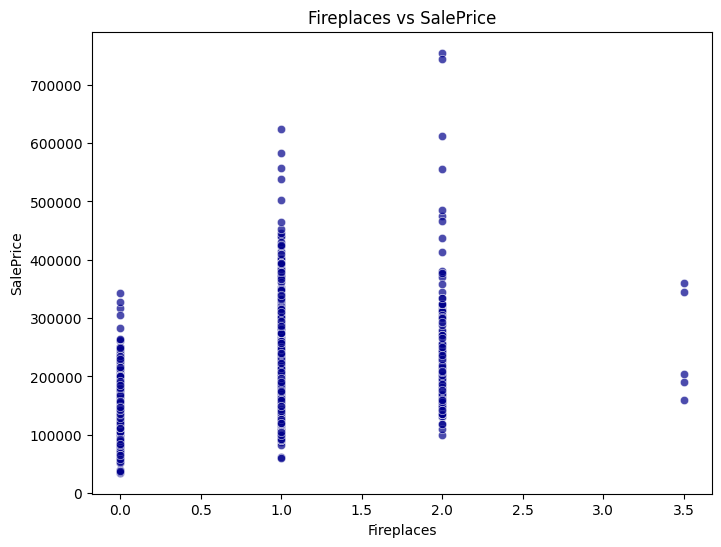

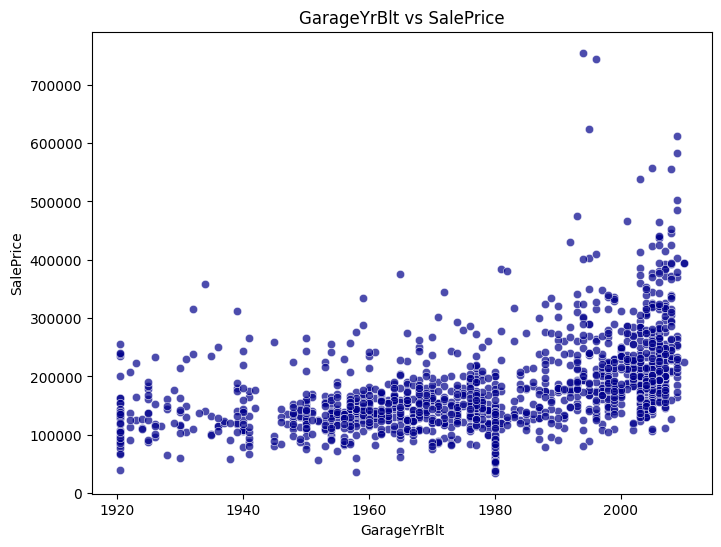

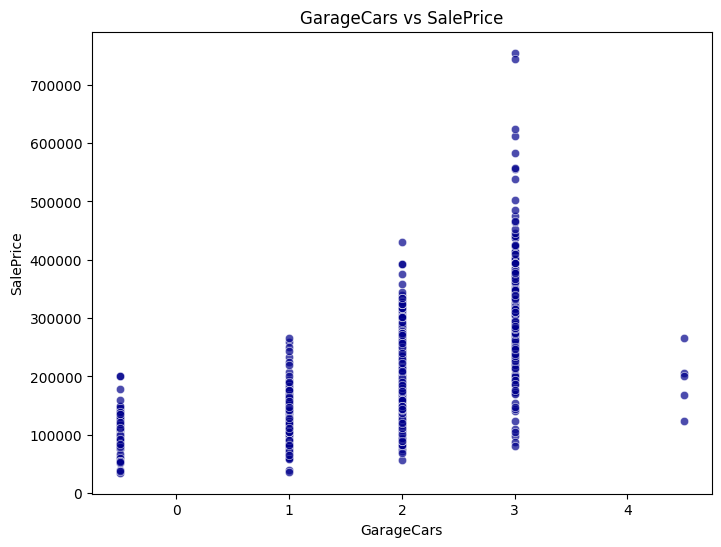

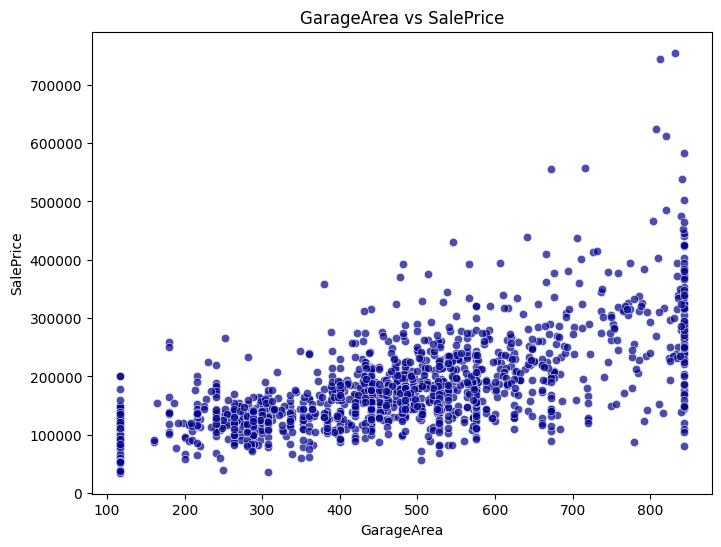

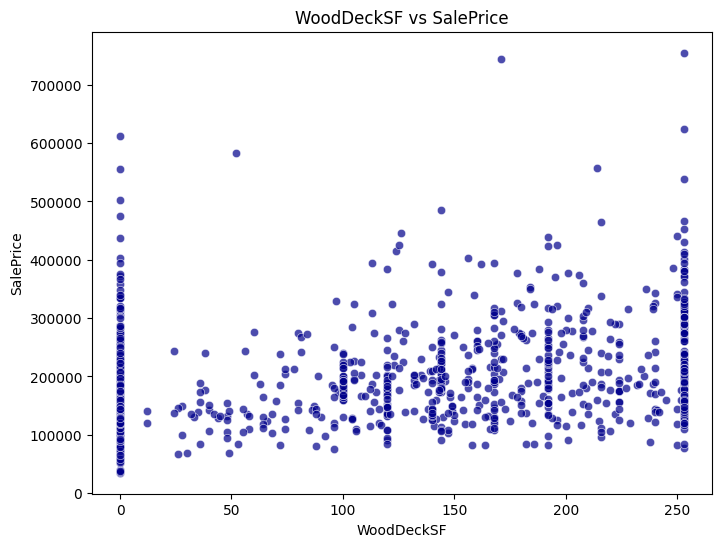

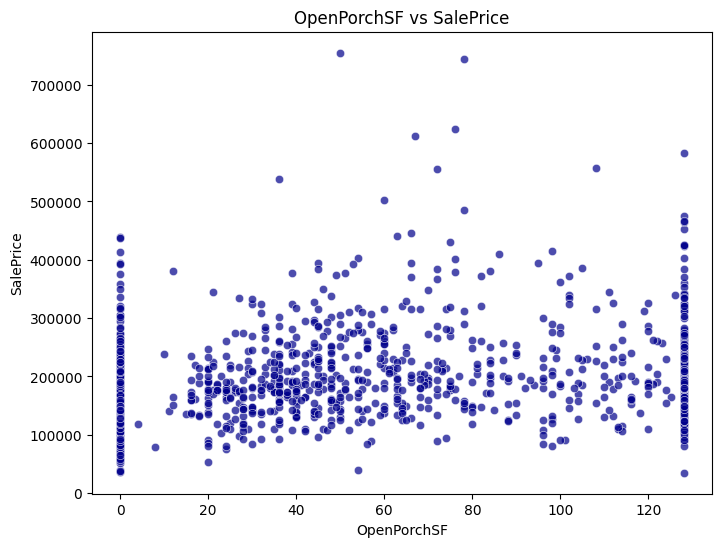

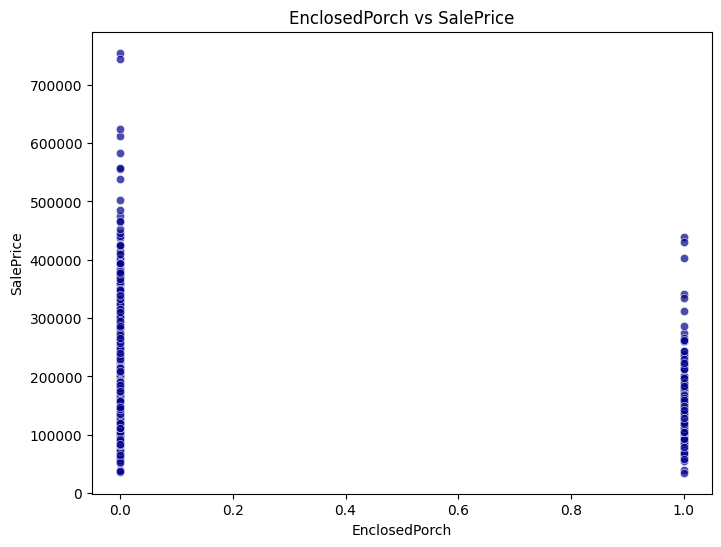

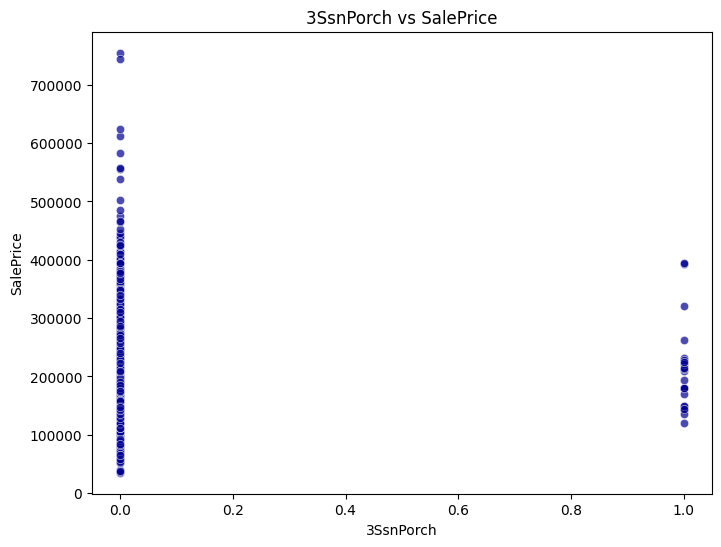

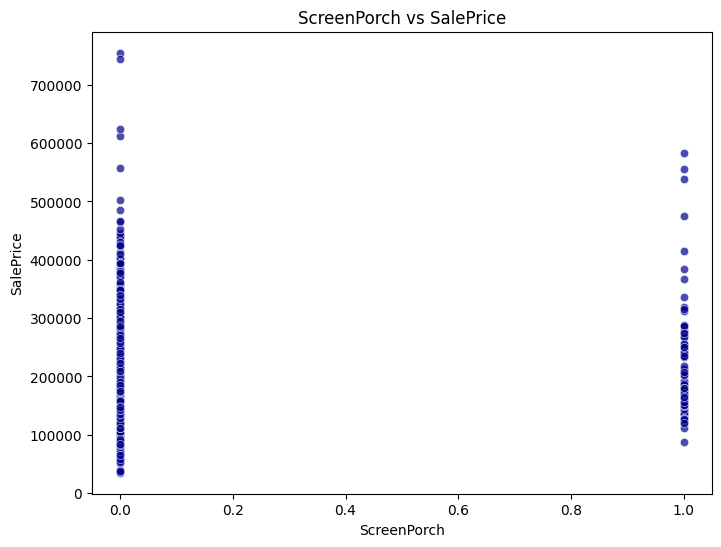

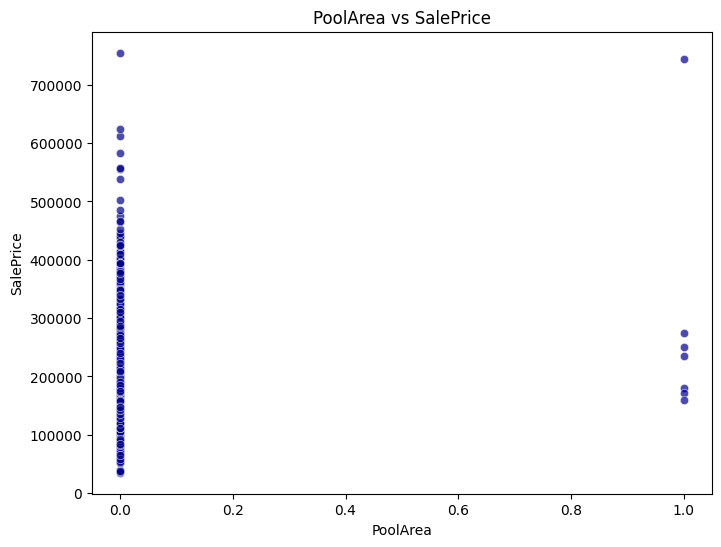

In [ ]:
# 2.1 Plot  between continuous variable and target variable
# Visualize the relationship between continuous variables and the target variable
for var in continuous_vars[:-1]:  # Excluding 'SalePrice'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=var, y='SalePrice', color='darkblue', alpha=0.7)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(f"{var} vs SalePrice")
    plt.show()




**Visulaize the relationship between category variables and target variable(SalePrice)**

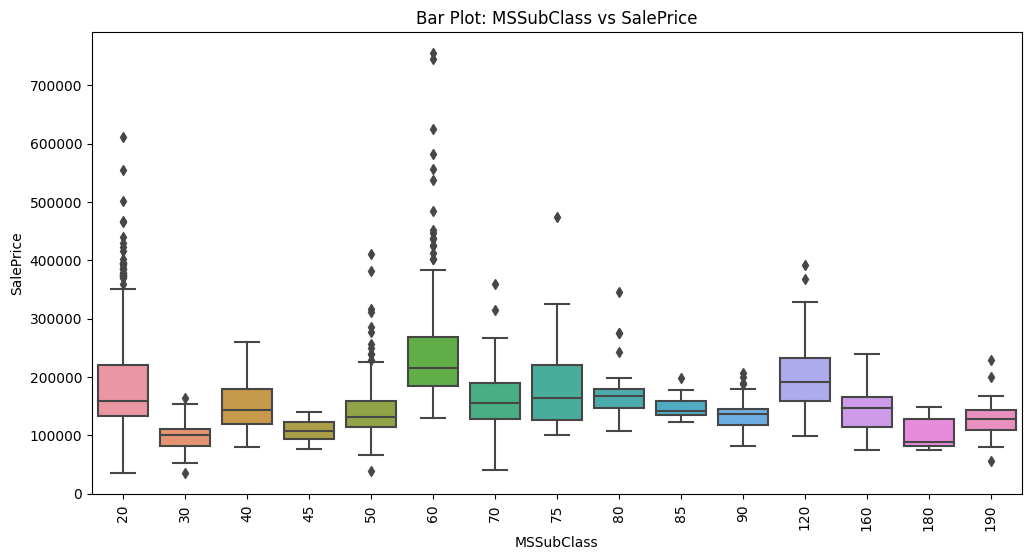

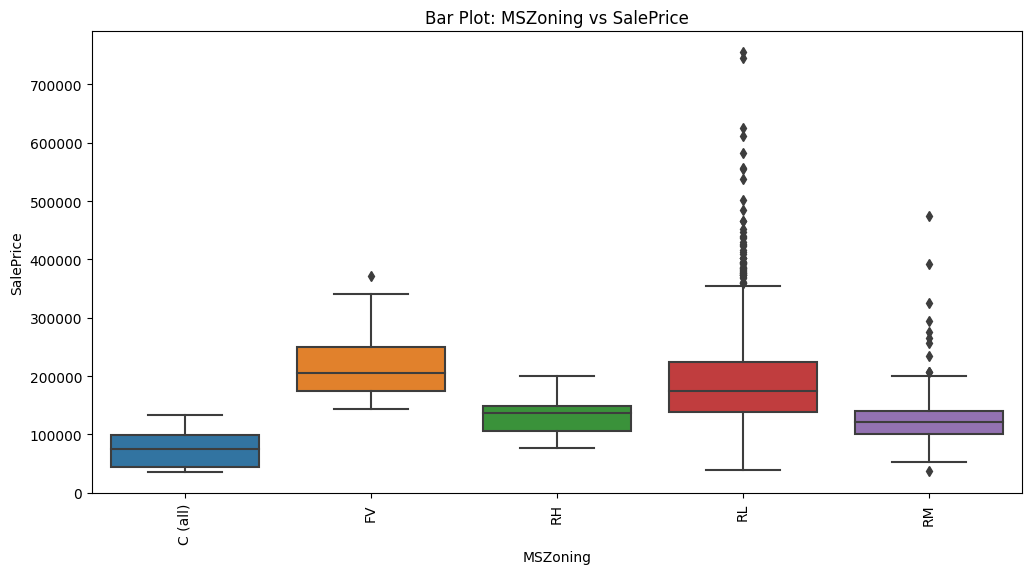

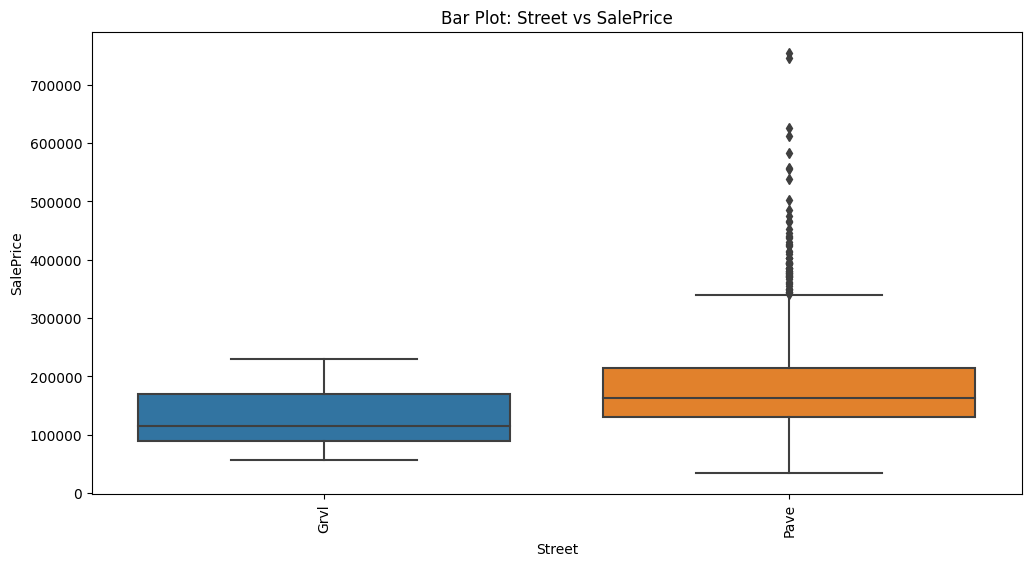

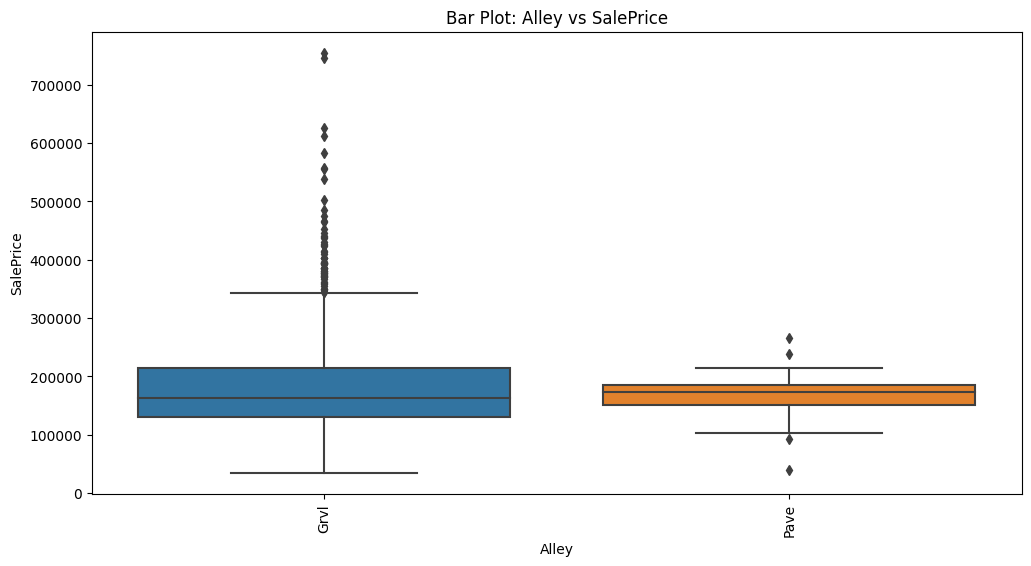

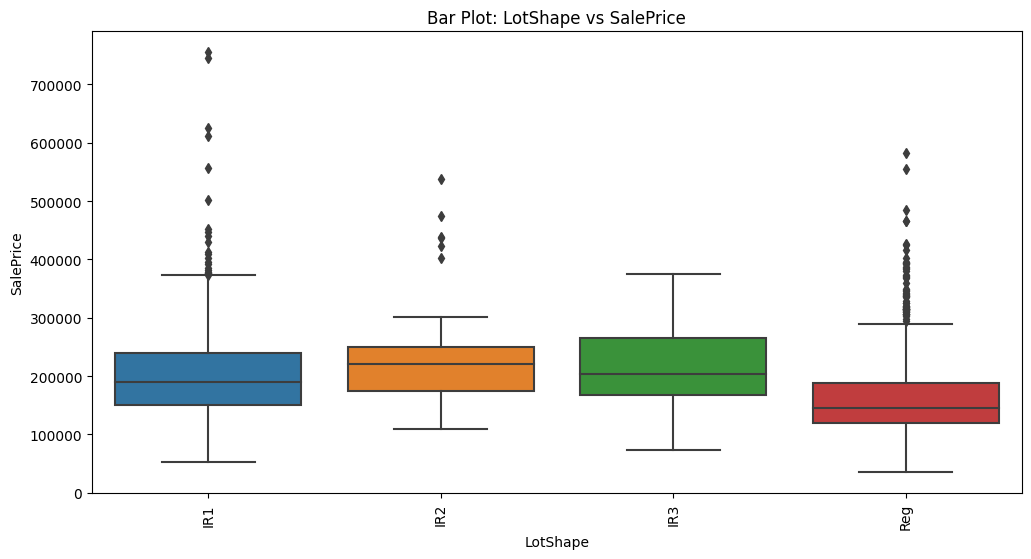

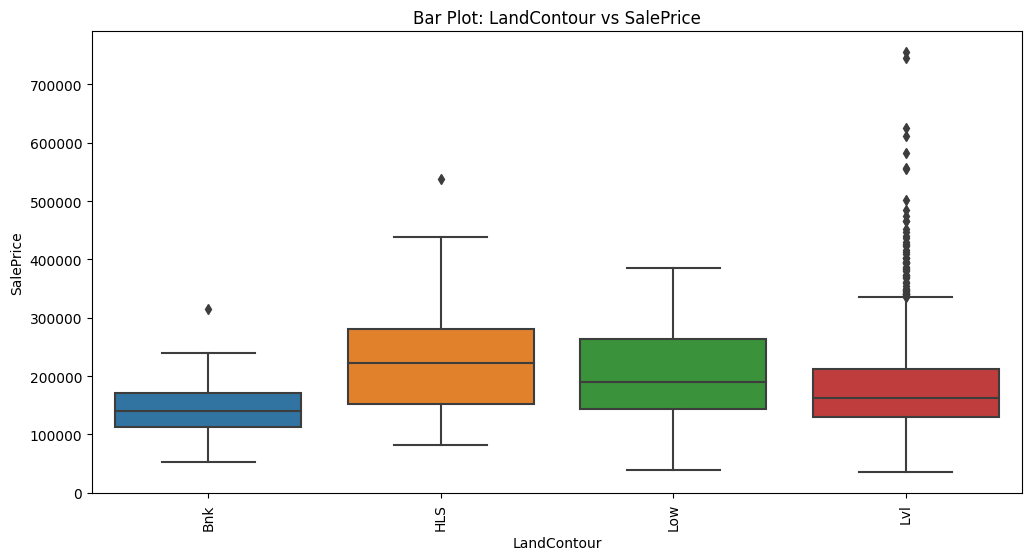

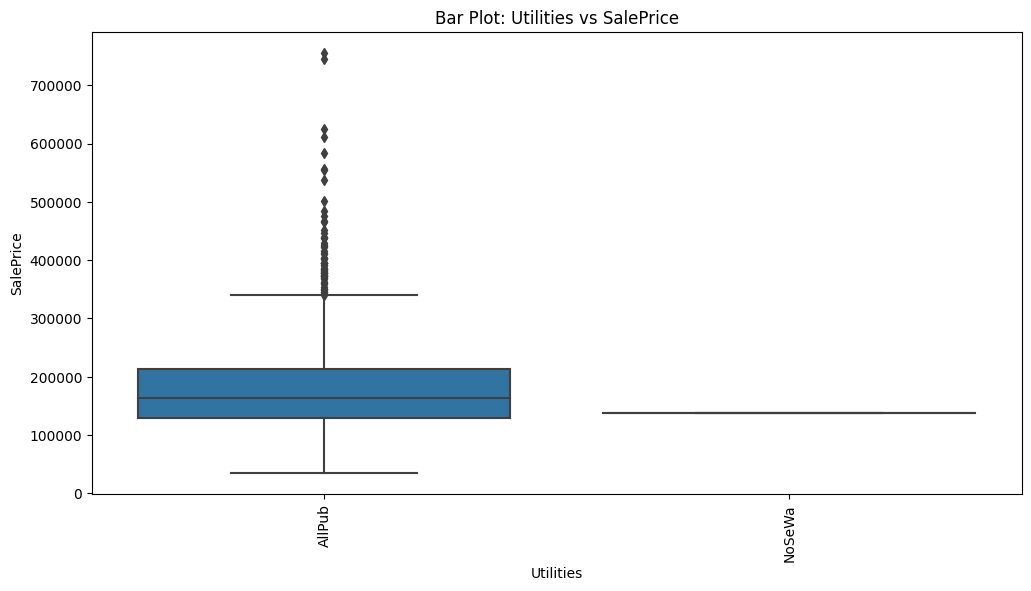

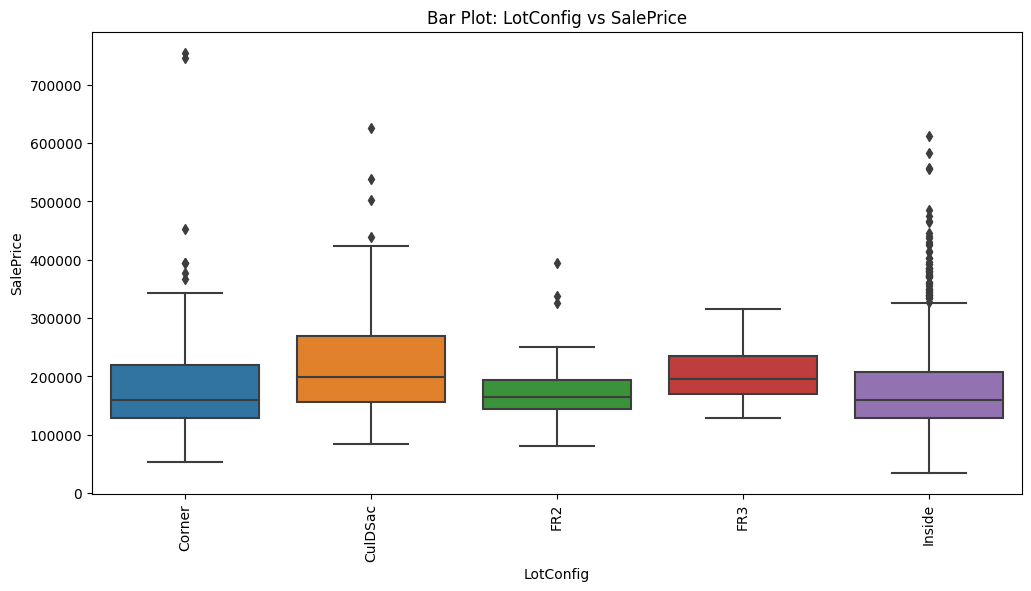

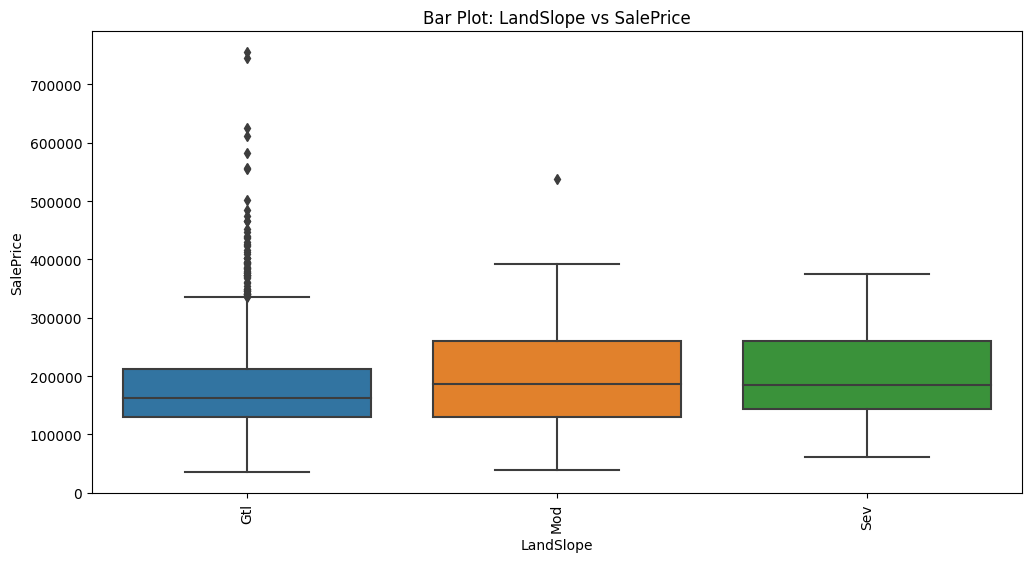

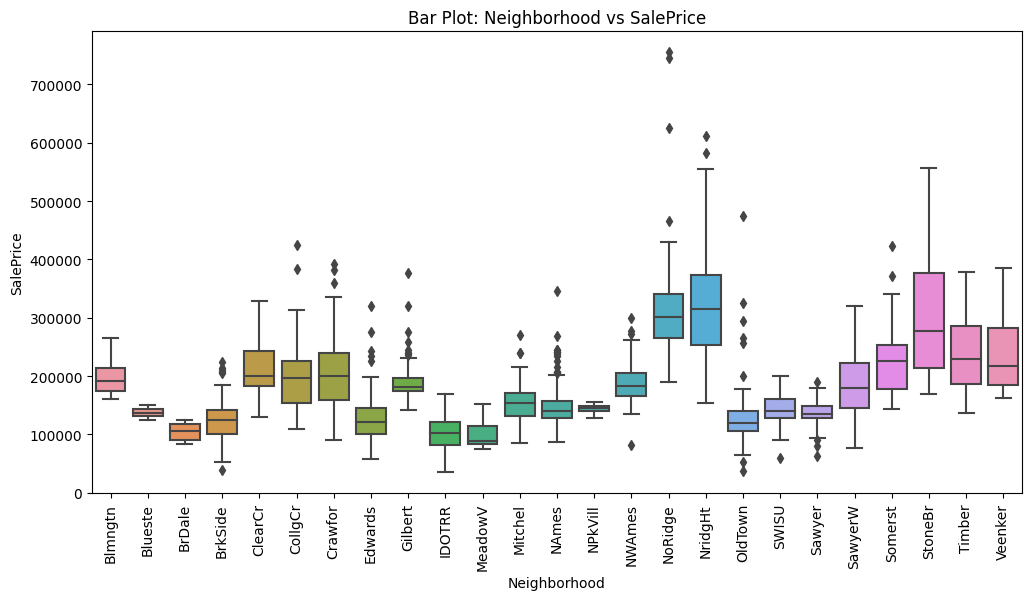

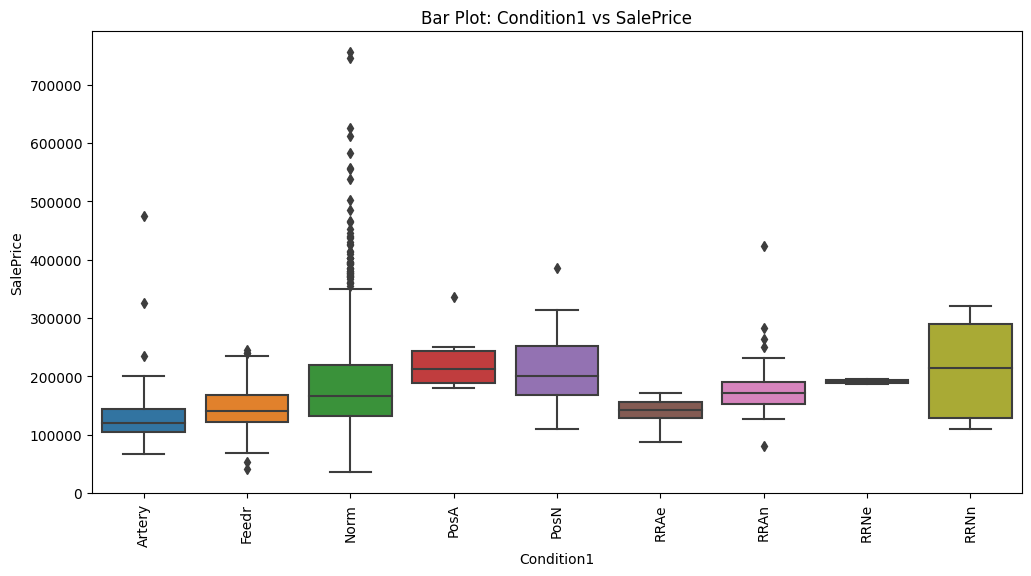

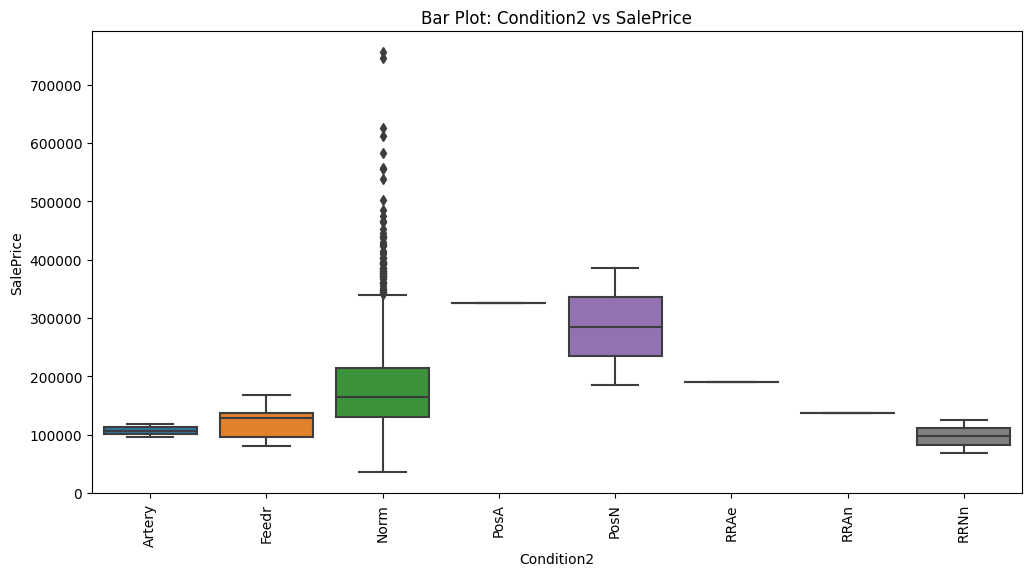

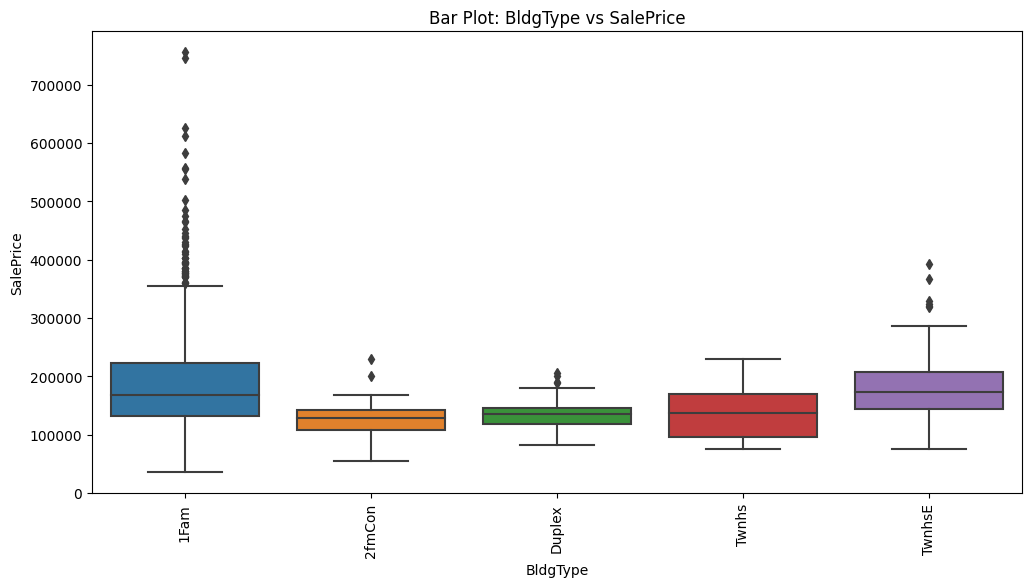

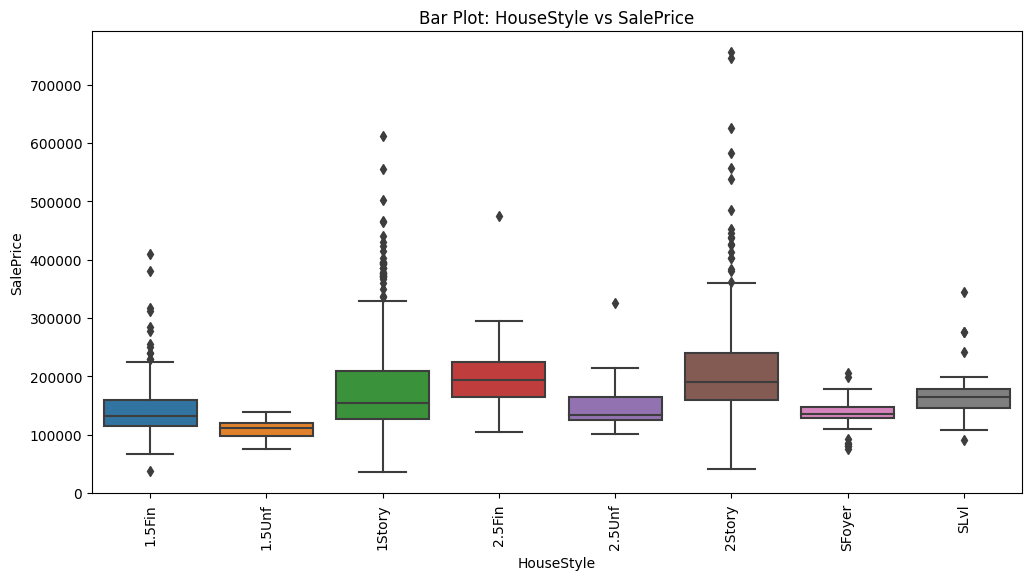

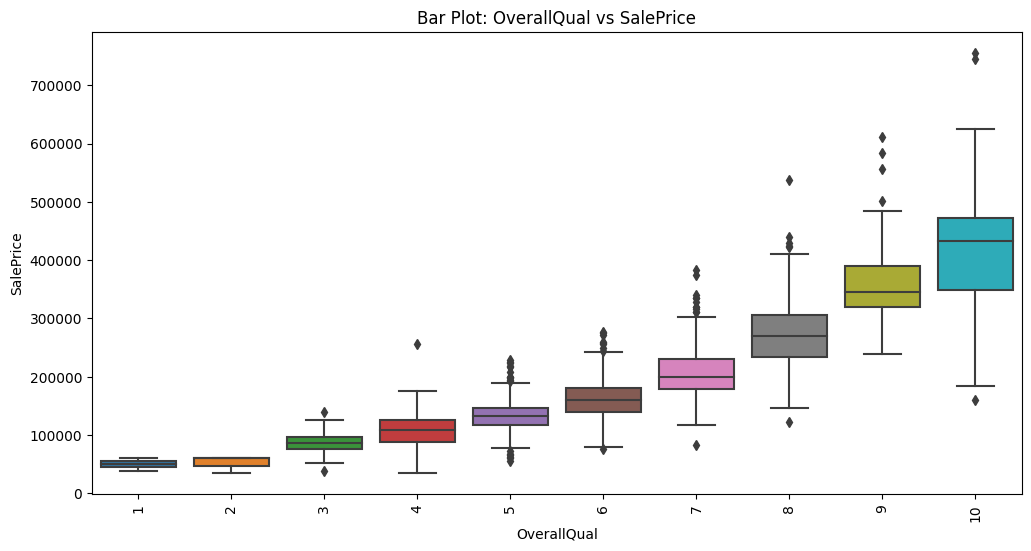

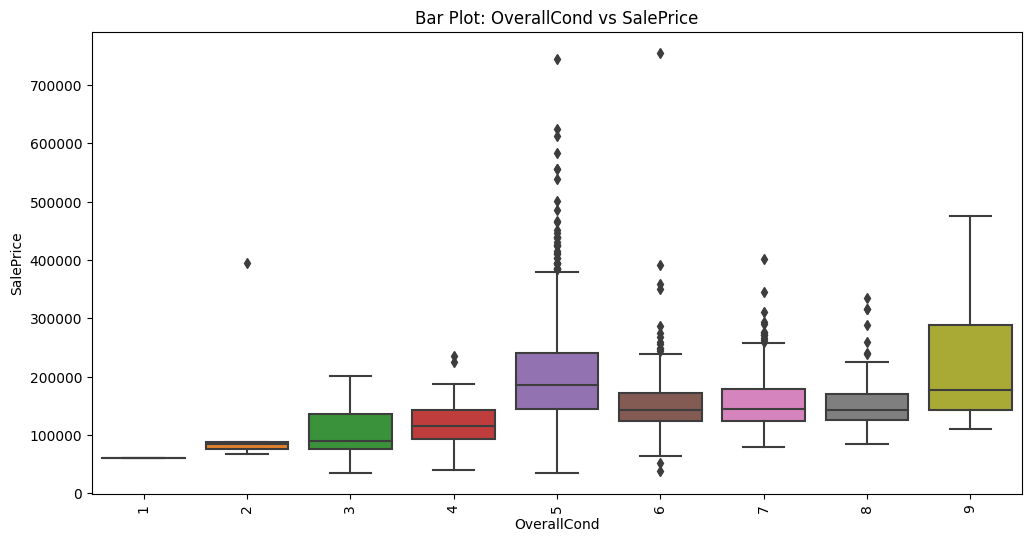

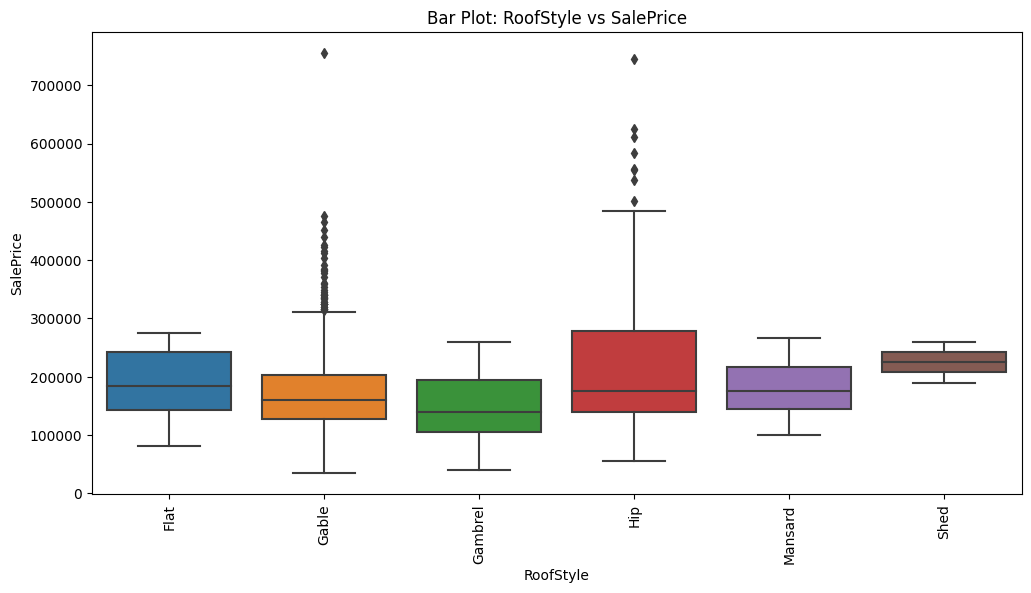

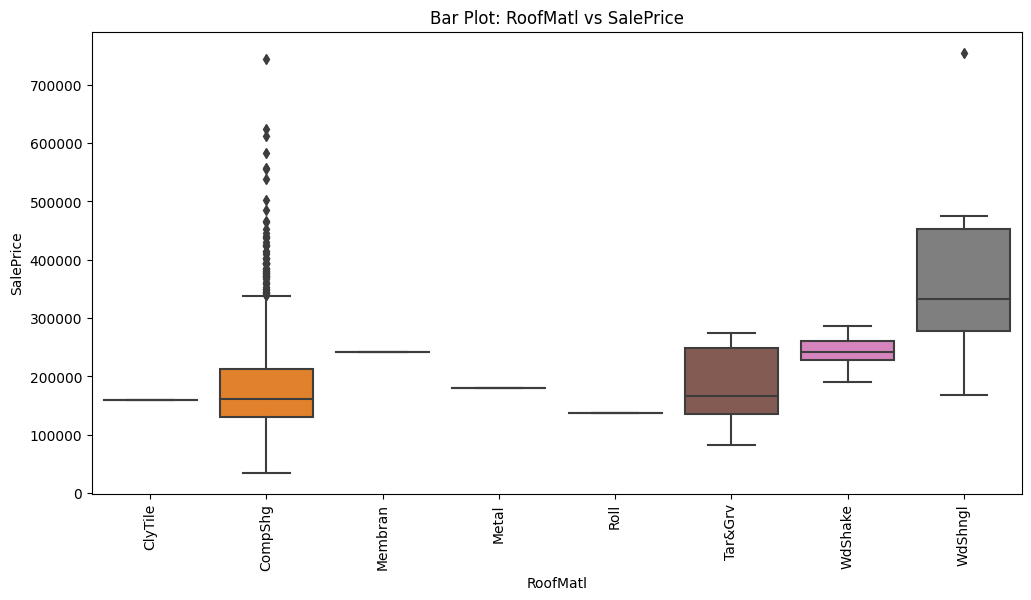

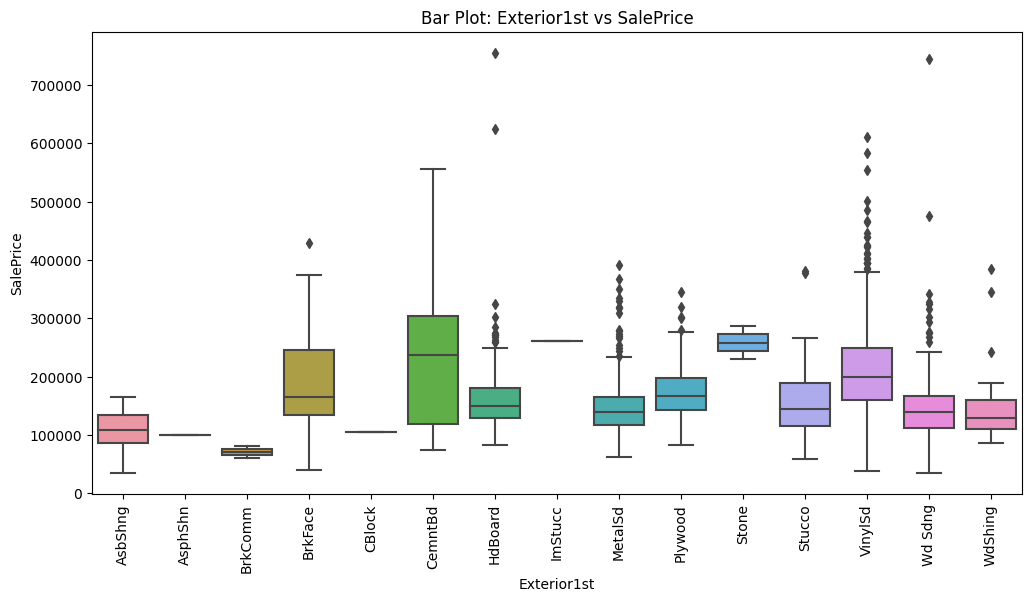

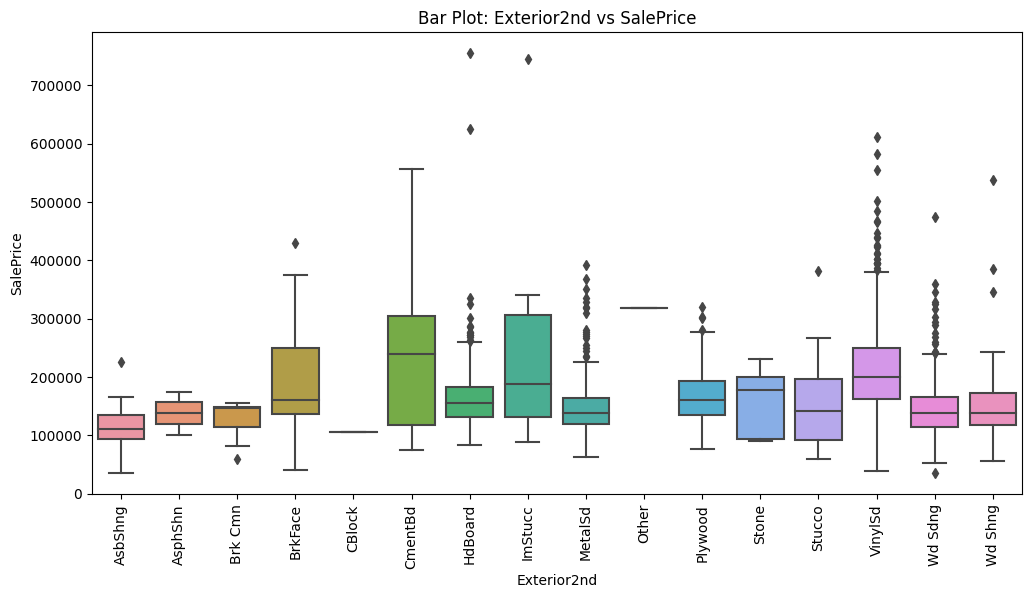

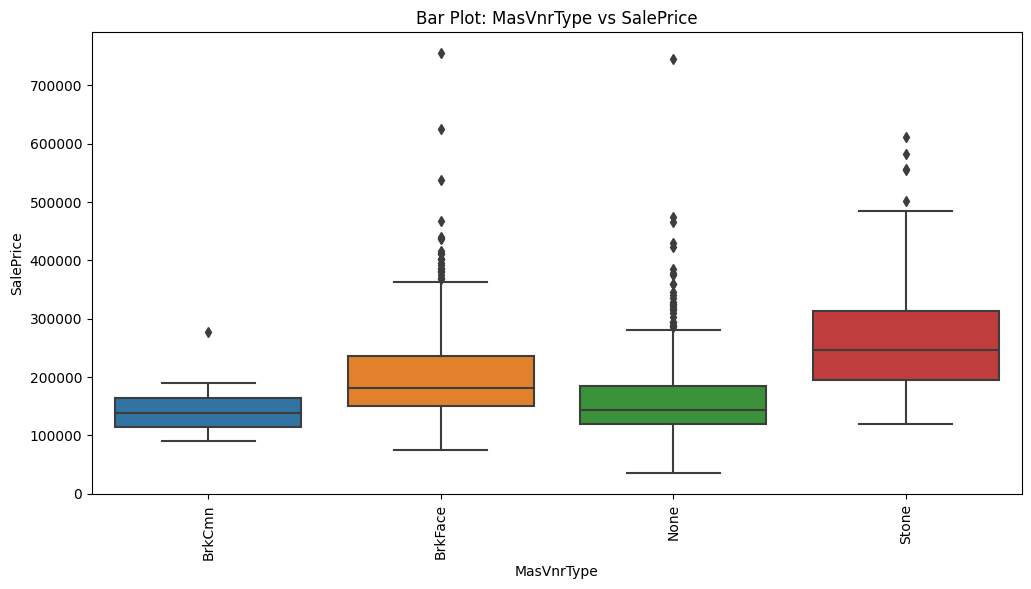

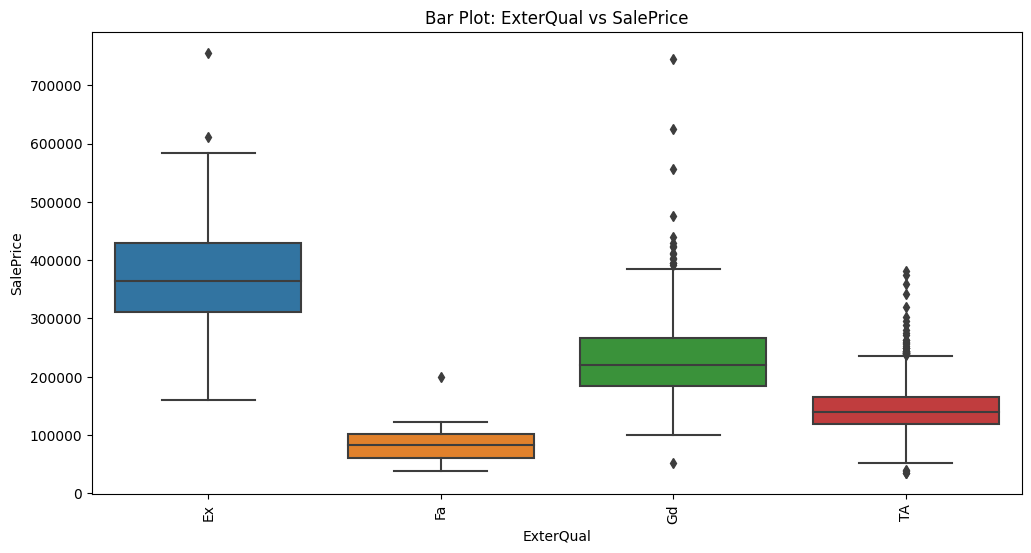

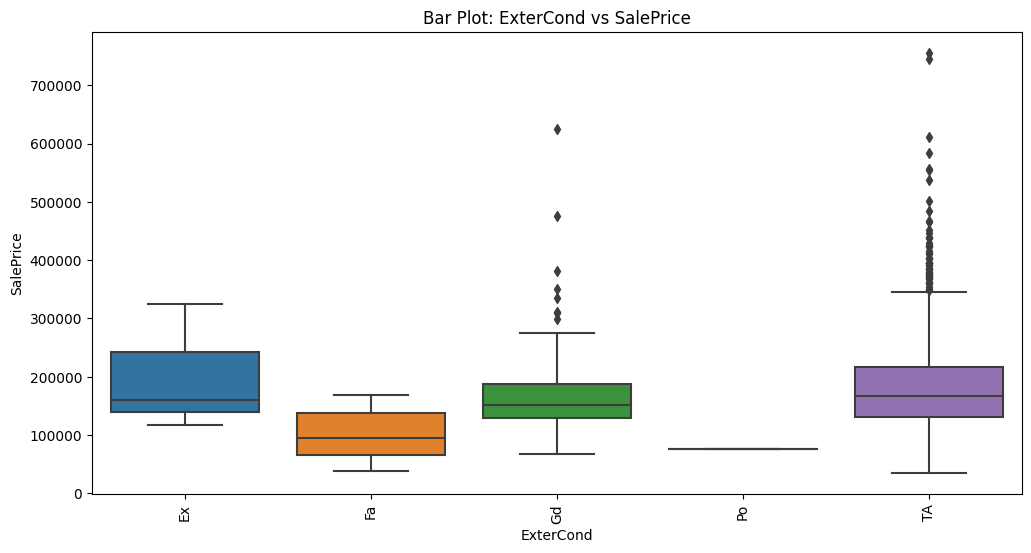

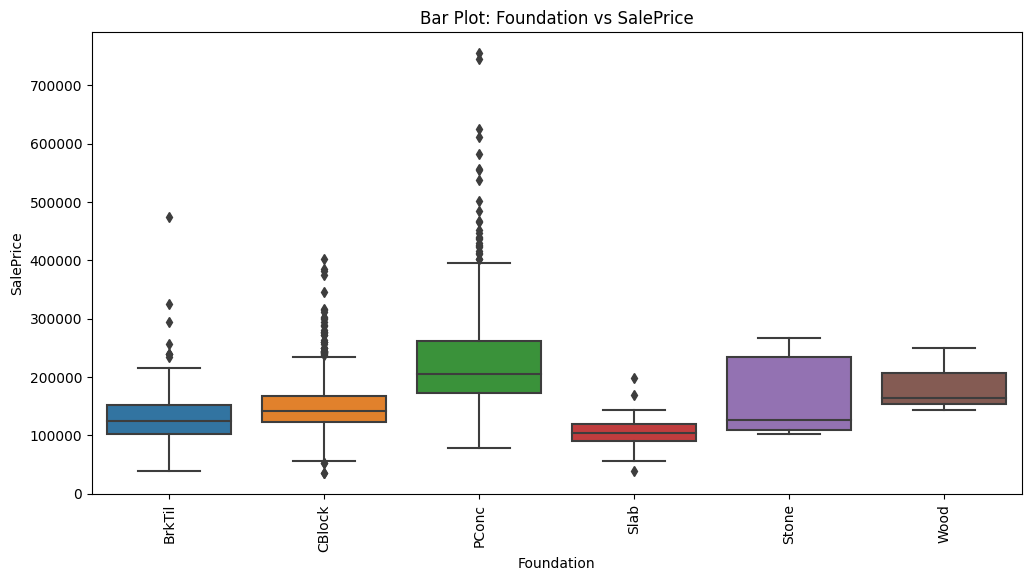

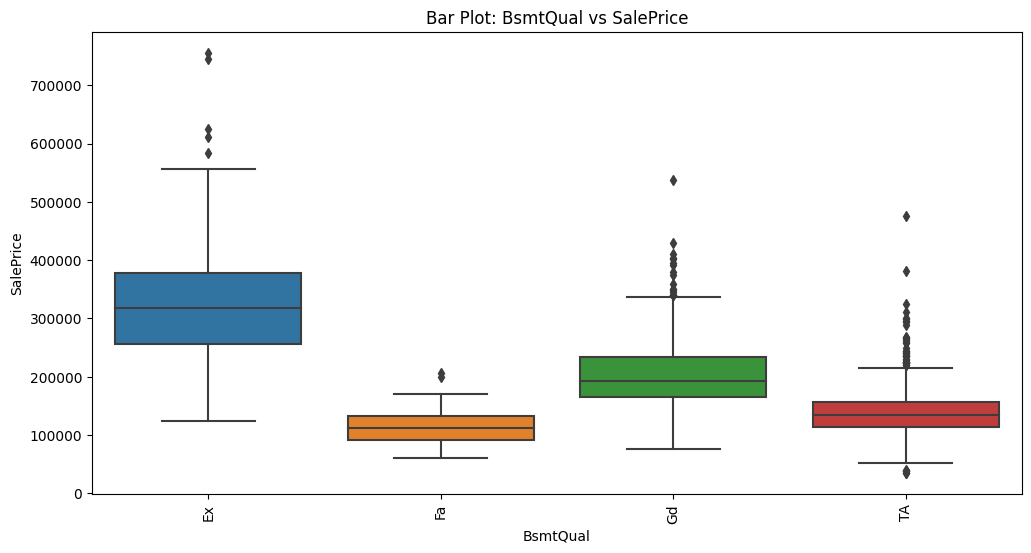

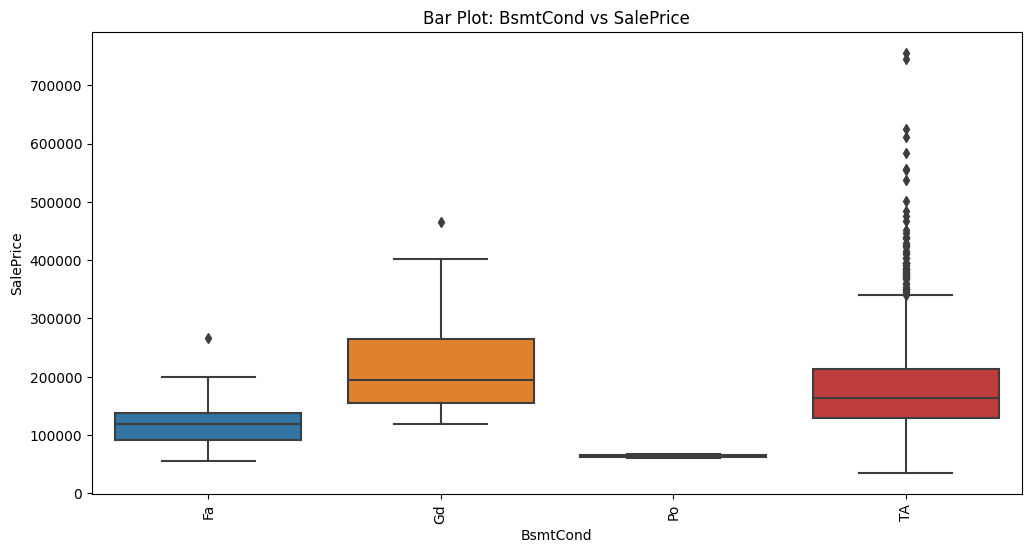

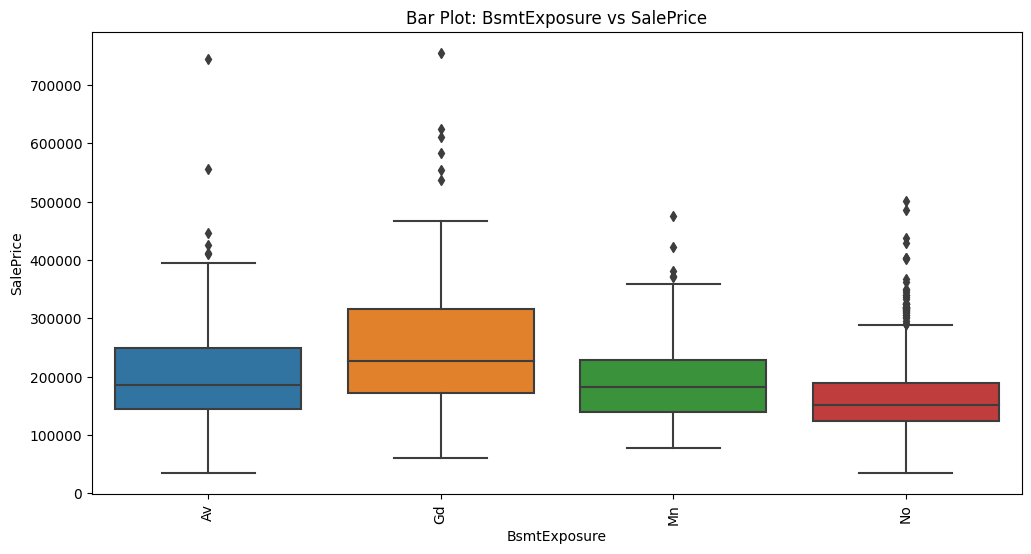

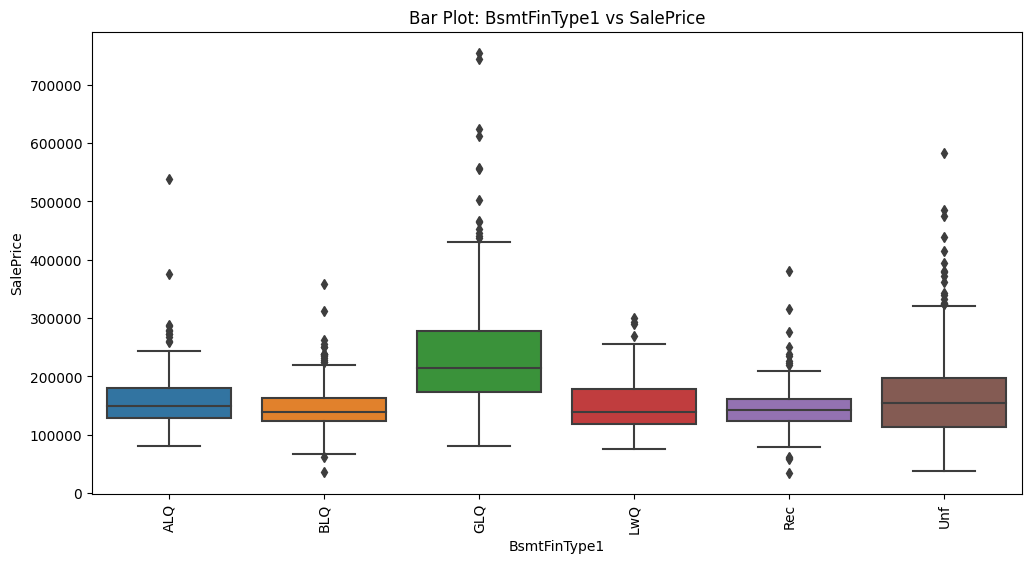

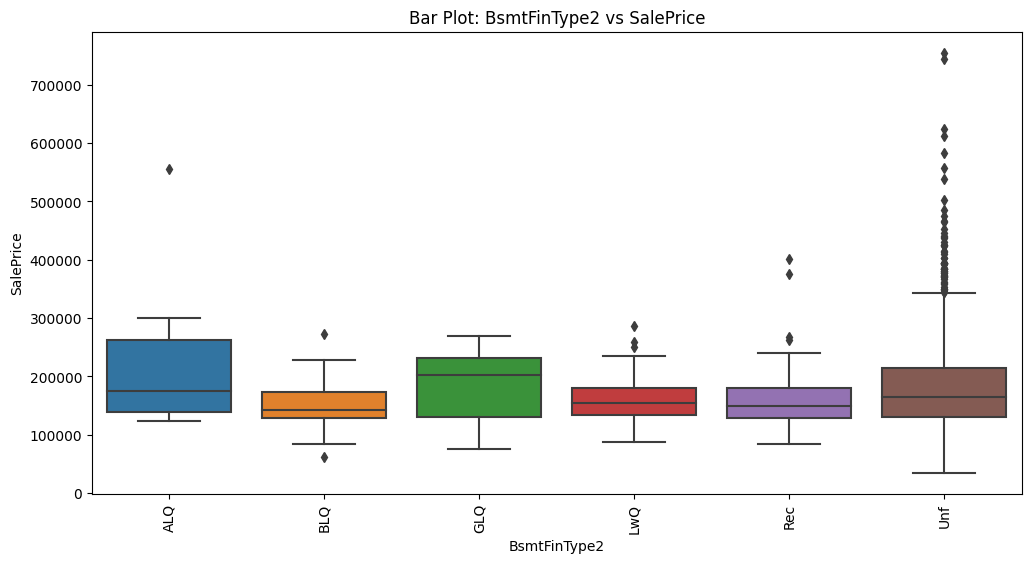

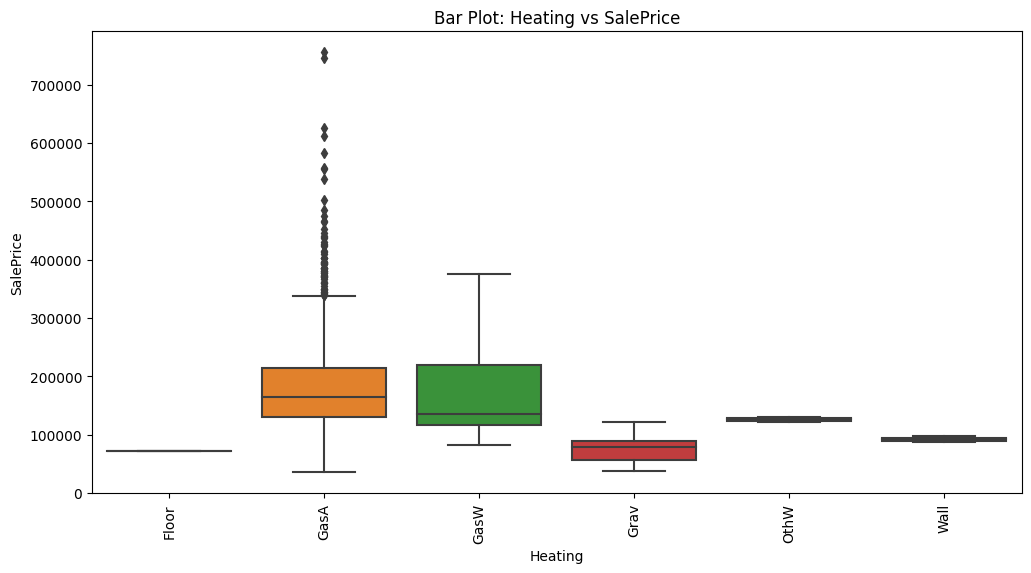

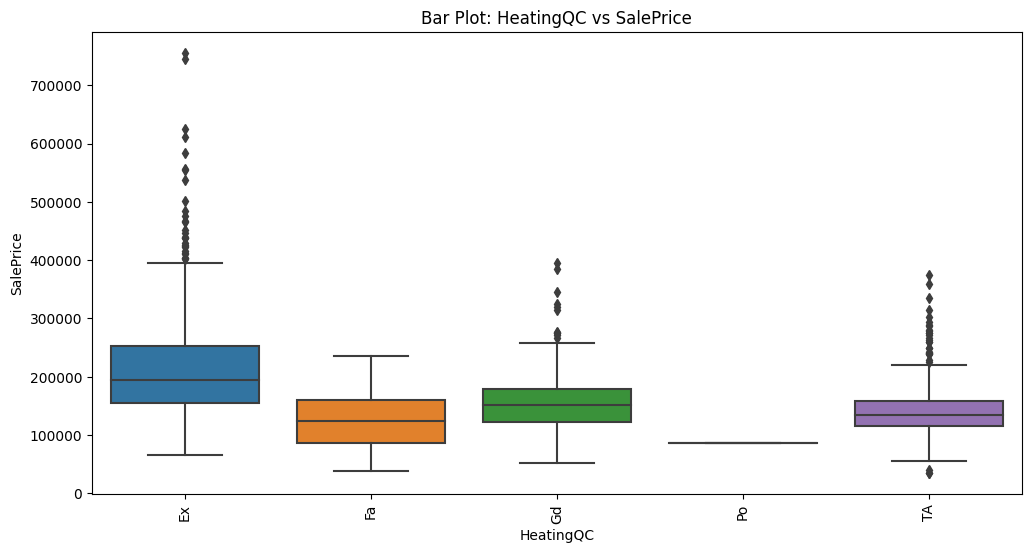

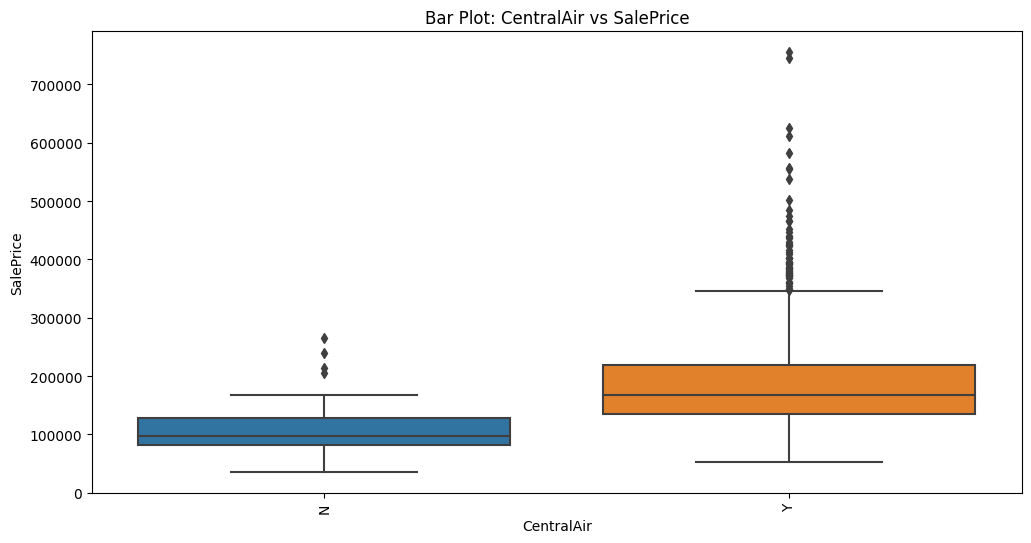

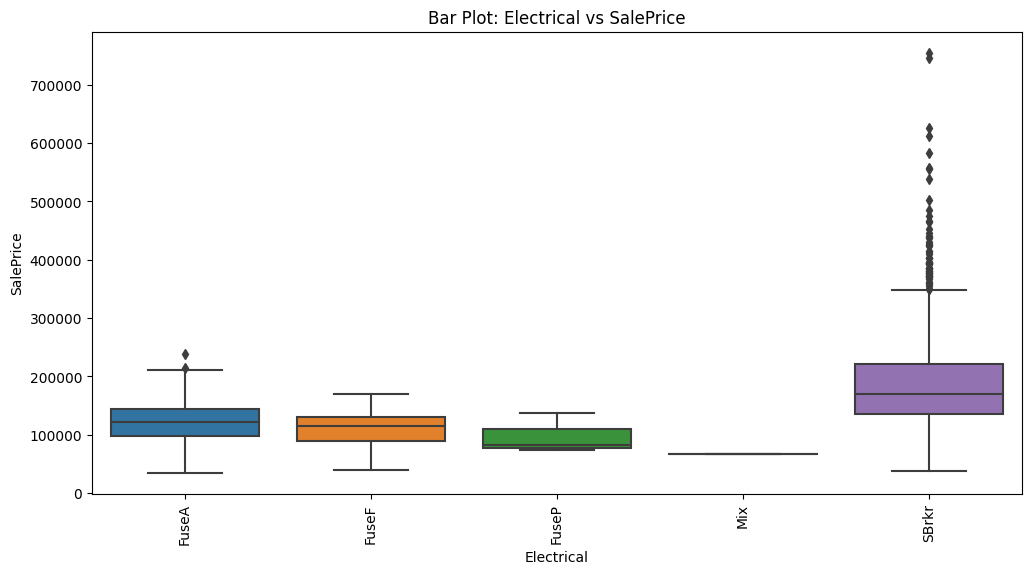

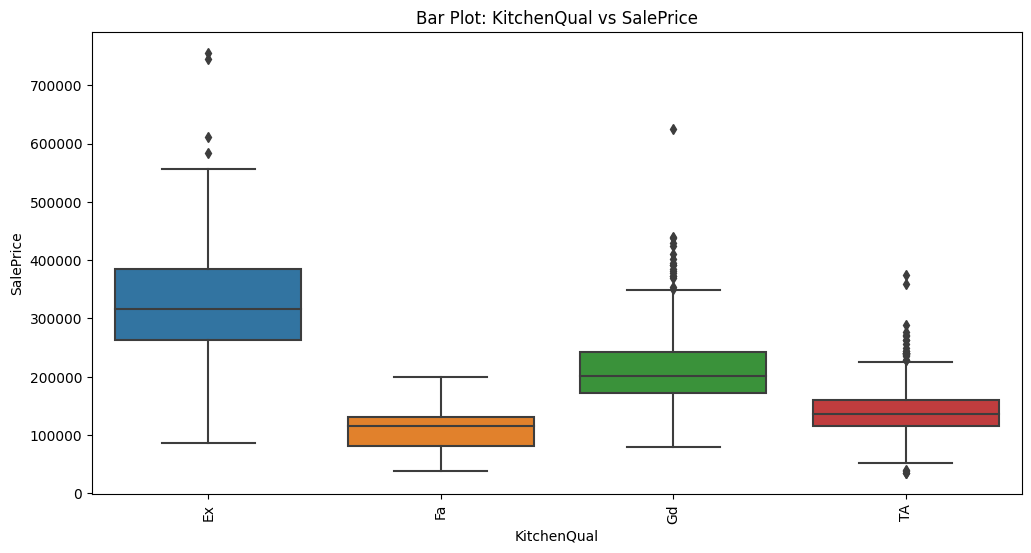

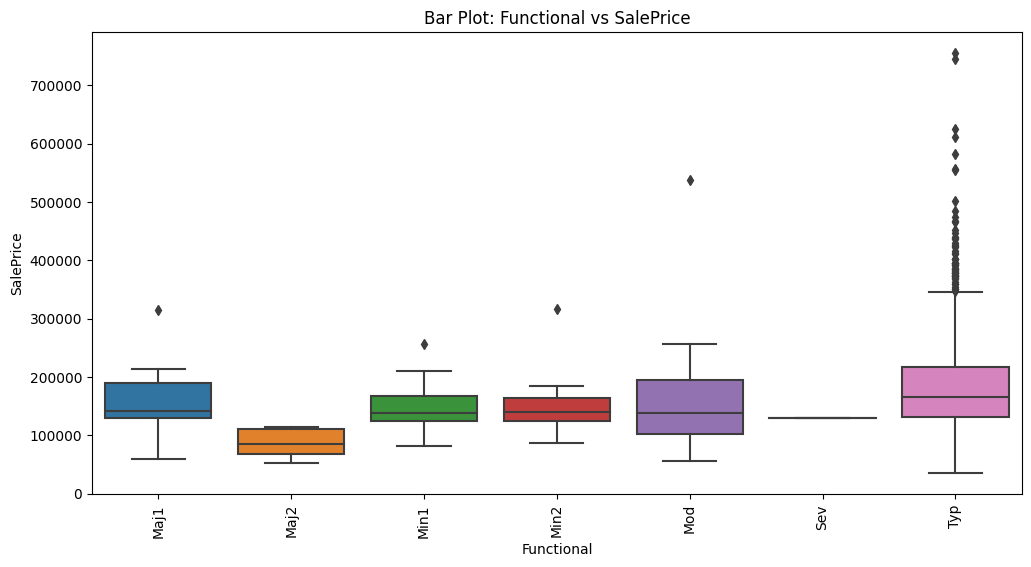

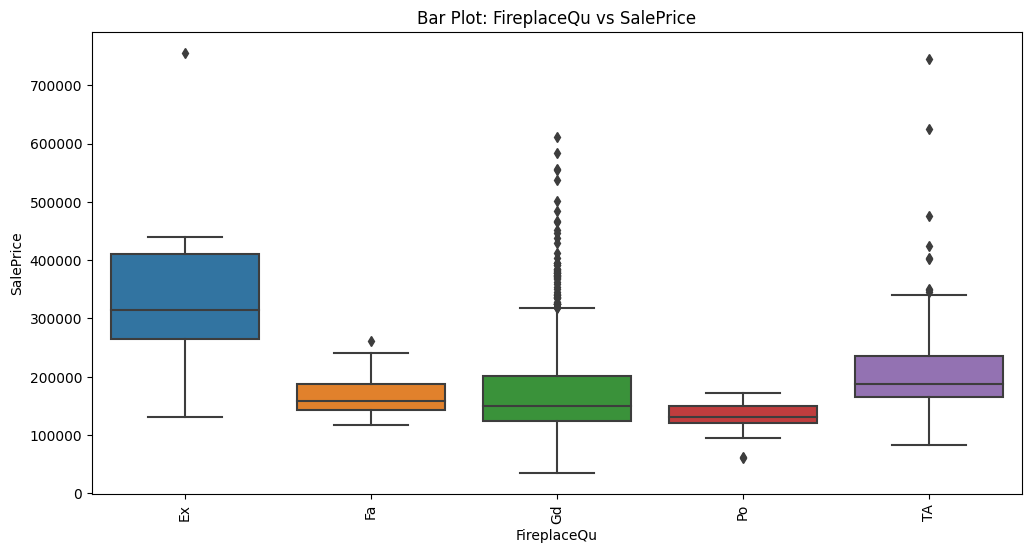

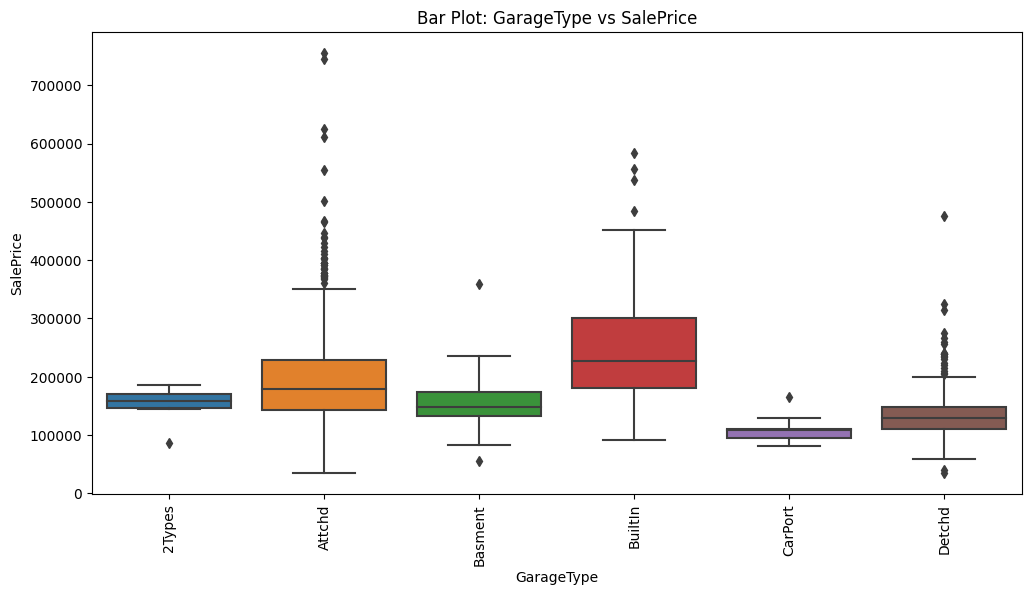

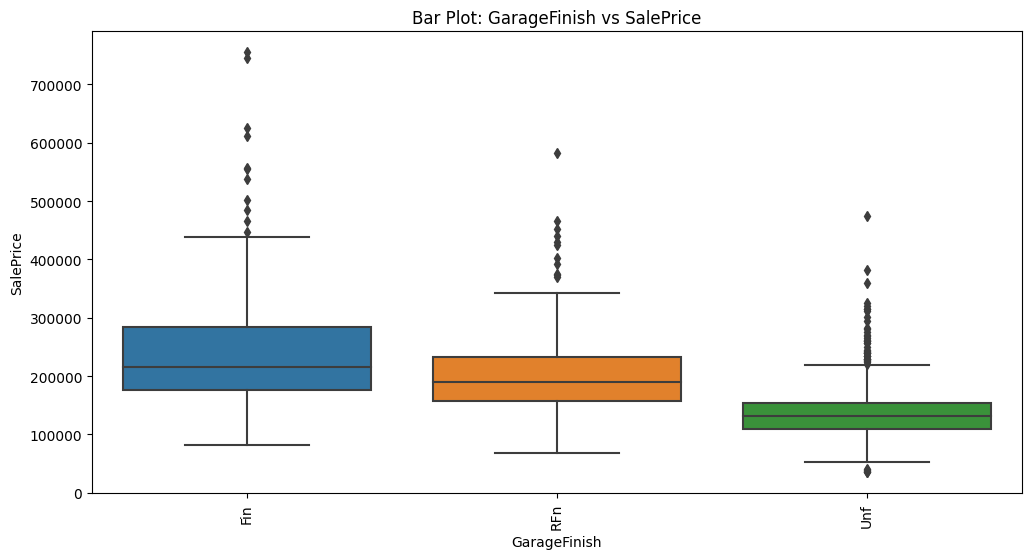

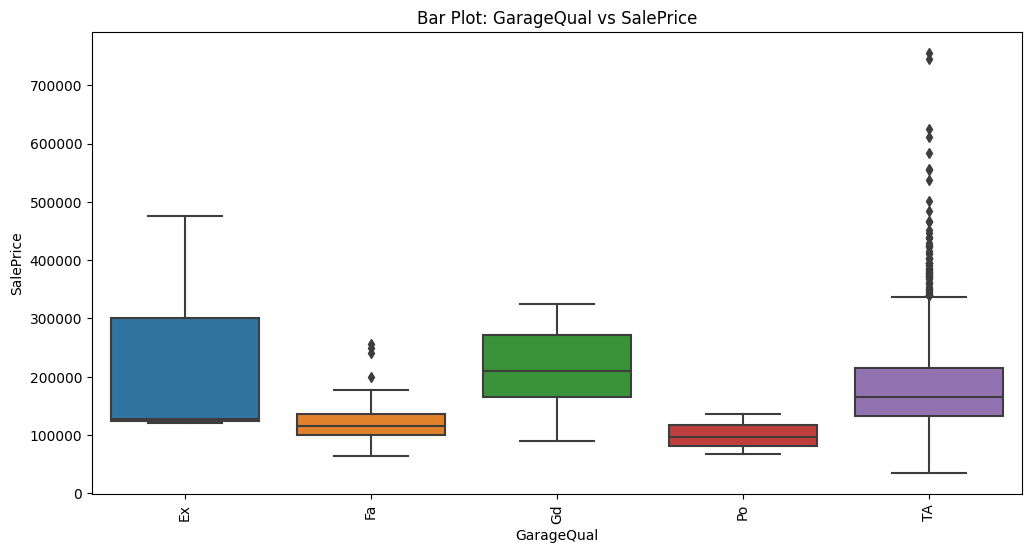

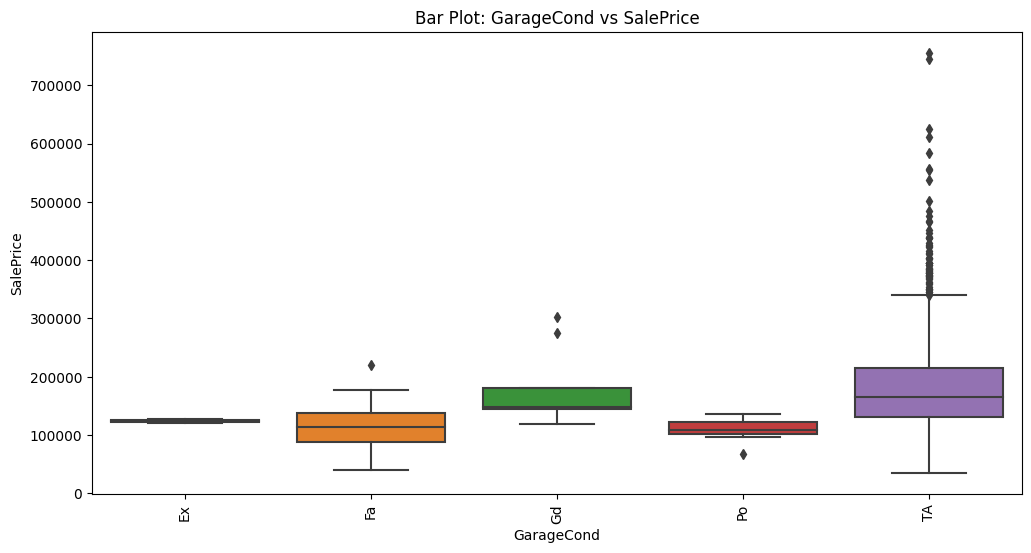

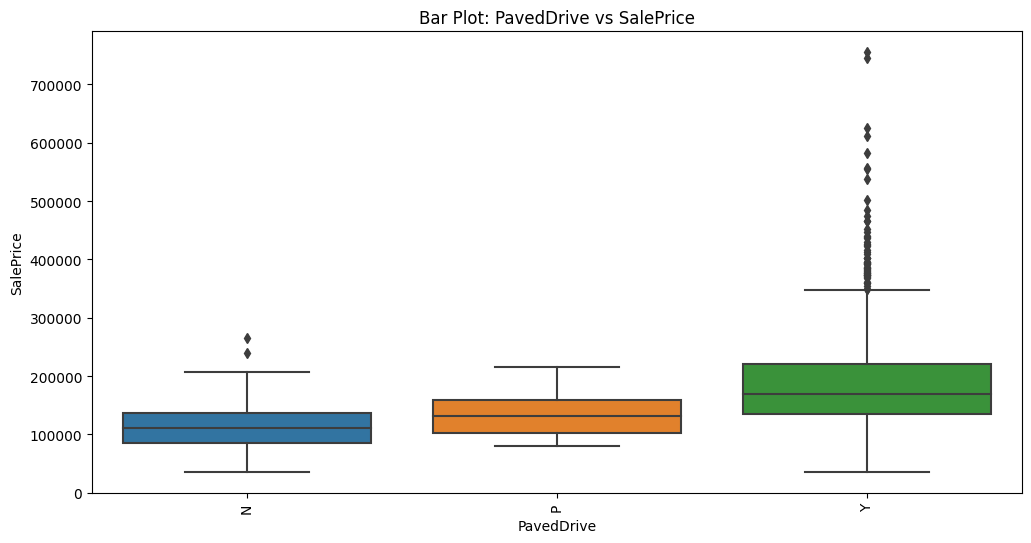

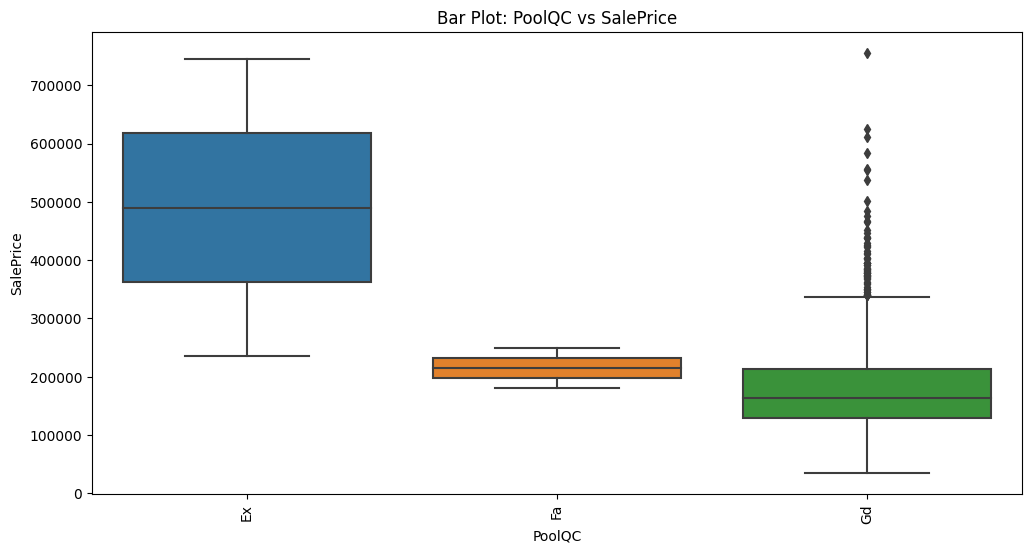

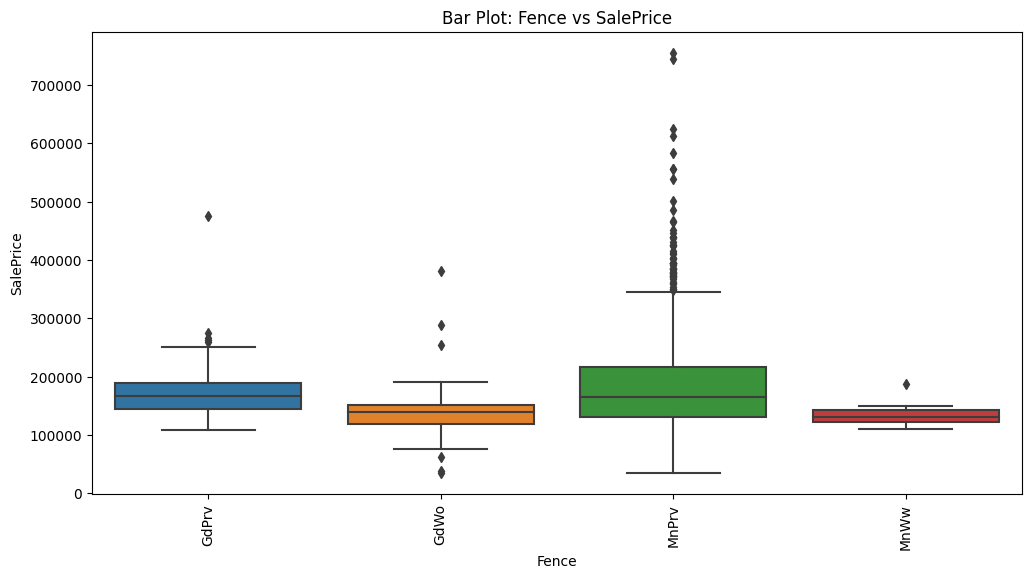

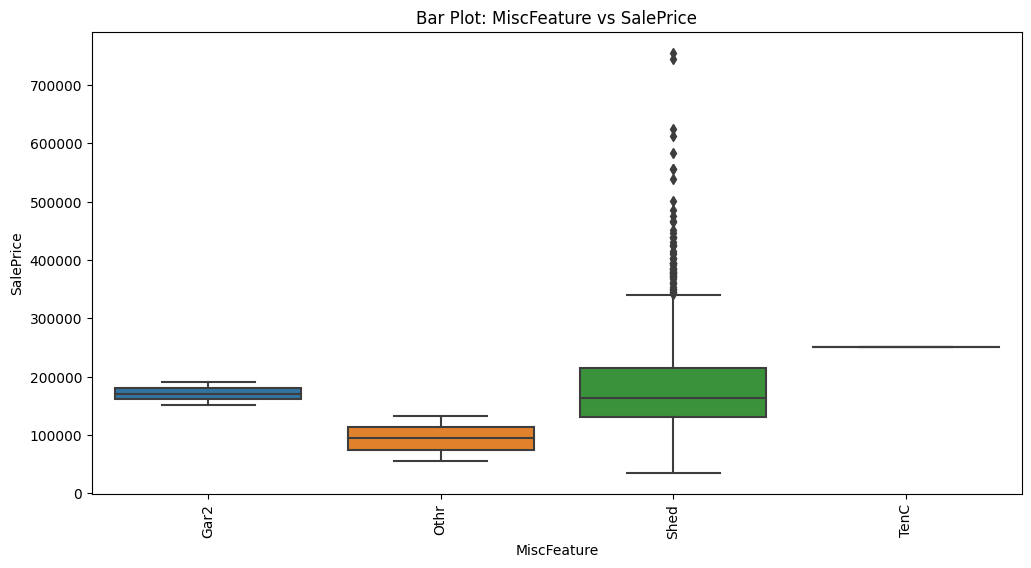

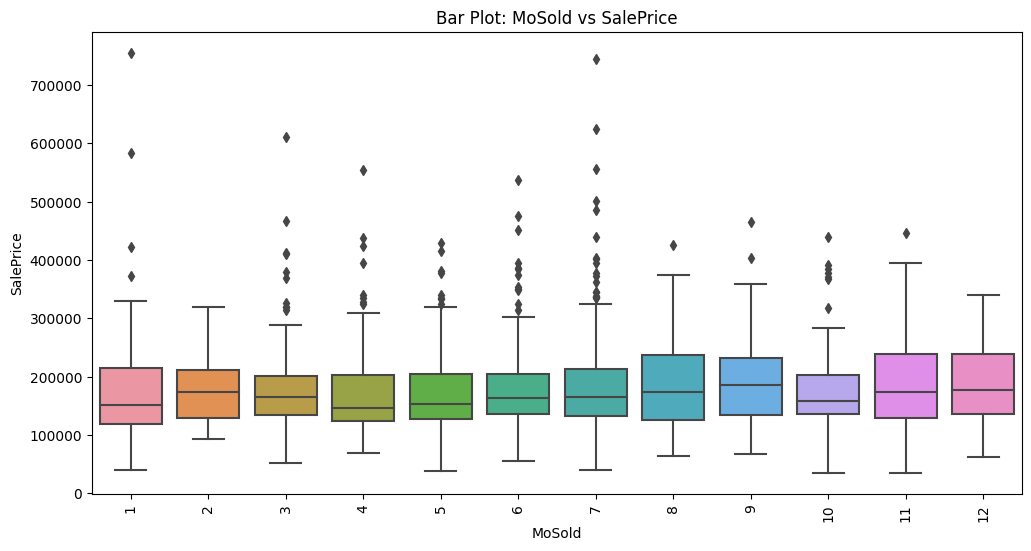

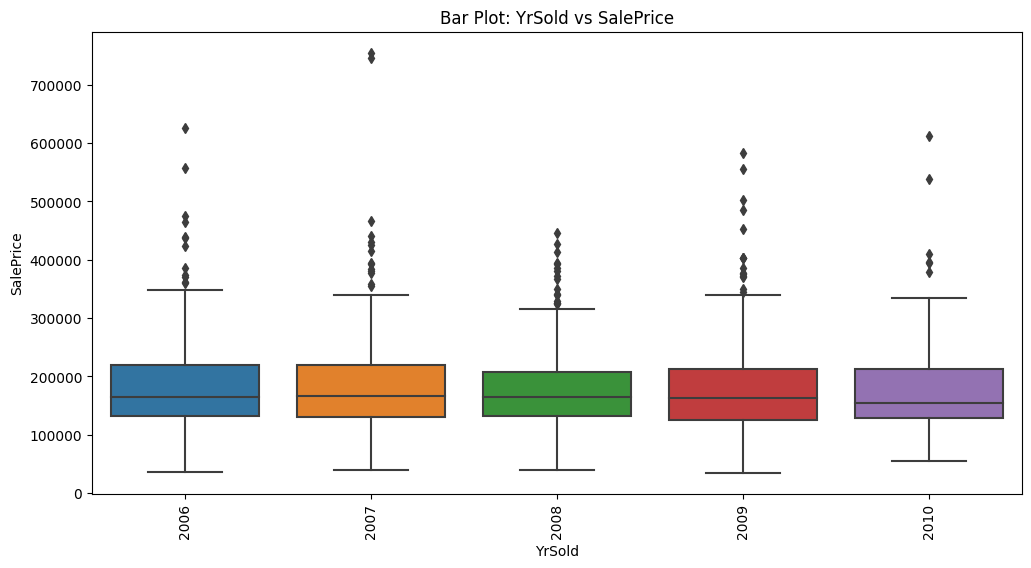

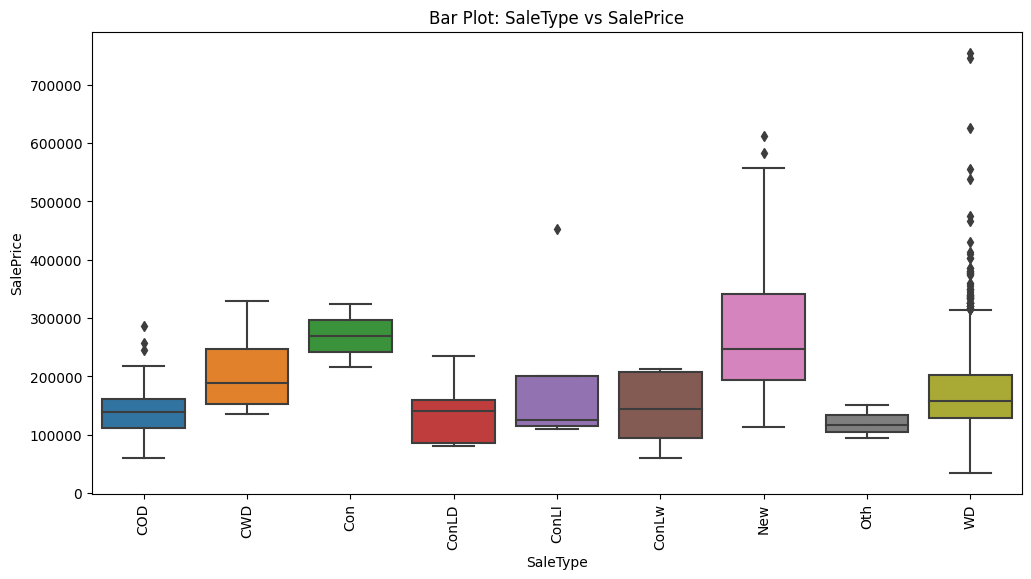

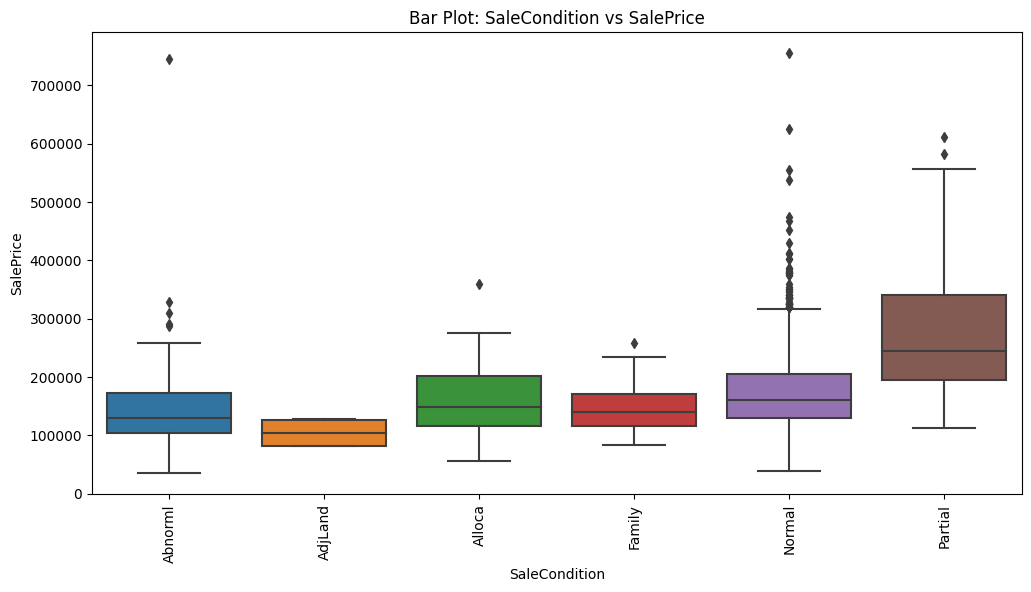

In [ ]:
# 2.2 Plot relationship between category variables and target variable(SalePrice)

# Iterate over each categorical variable and plot the relationship with 'SalePrice'
for var in category_vars:
    plt.figure(figsize=(12, 6))
    #sns.barplot(x=var, y='SalePrice', data=data)
    sns.boxplot(x=var, y='SalePrice', data=data)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title('Bar Plot: {} vs SalePrice'.format(var))
    plt.xticks(rotation=90)
    plt.show()

Correlation

Continuous-Continuous Variables

In [ ]:
# 3.1 Calculate correlation coefficient between the pairs of continuous-continuous variables
#adding SalePrice in continuous_vars list
continuous_vars.append('SalePrice')
# calculating Pearson correlation coefficient
data[continuous_vars].corr()

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea   
LotFrontage       1.000000  0.426095   0.123349      0.088866    0.193458  \
LotArea           0.426095  1.000000   0.014228      0.013788    0.104160   
YearBuilt         0.123349  0.014228   1.000000      0.592855    0.315707   
YearRemodAdd      0.088866  0.013788   0.592855      1.000000    0.179618   
MasVnrArea        0.193458  0.104160   0.315707      0.179618    1.000000   
BsmtFinSF1        0.233633  0.214103   0.249503      0.128451    0.264736   
BsmtFinSF2        0.049900  0.111170  -0.049107     -0.067759   -0.072319   
BsmtUnfSF         0.132644 -0.002618   0.149040      0.181133    0.114442   
TotalBsmtSF       0.392075  0.260833   0.391452      0.291066    0.363936   
1stFlrSF          0.457181  0.299475   0.281986      0.240379    0.344501   
2ndFlrSF          0.080177  0.050986   0.010308      0.140024    0.174561   
LowQualFinSF      0.038469  0.004779  -0.183784     -0.062419   -0.069071   
GrLivArea         0.402797  0.263116   0.199010      0.287389    0.390857   
BsmtFullBath      0.100949  0.158155   0.187599      0.119470    0.085310   
BsmtHalfBath     -0.007234  0.048046  -0.038162     -0.012337    0.026673   
FullBath          0.198769  0.126031   0.468271      0.439046    0.276833   
HalfBath          0.053532  0.014259   0.242656      0.183331    0.201444   
BedroomAbvGr      0.263170  0.119690  -0.070651     -0.040581    0.102821   
KitchenAbvGr     -0.006069 -0.017784  -0.174800     -0.149598   -0.037610   
TotRmsAbvGrd      0.352096  0.190015   0.095589      0.191740    0.280682   
Fireplaces        0.266639  0.271364   0.147716      0.112581    0.249070   
GarageYrBlt       0.070250 -0.024947   0.825667      0.642277    0.252691   
GarageCars        0.285691  0.154871   0.537850      0.420622    0.364204   
GarageArea        0.344997  0.180403   0.478954      0.371600    0.373066   
WoodDeckSF        0.088521  0.171698   0.224880      0.205726    0.159718   
OpenPorchSF       0.151972  0.084774   0.188686      0.226298    0.125703   
EnclosedPorch     0.010700 -0.018340  -0.387268     -0.193919   -0.110204   
3SsnPorch         0.070029  0.020423   0.031355      0.045286    0.018796   
ScreenPorch       0.041383  0.043160  -0.050364     -0.038740    0.061466   
PoolArea          0.206167  0.077672   0.004950      0.005829    0.011723   
MiscVal           0.003368  0.038068  -0.034383     -0.010286   -0.029815   
SalePrice         0.351799  0.263843   0.522897      0.507101    0.477493   
SalePrice         0.351799  0.263843   0.522897      0.507101    0.477493   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...   
LotFrontage      0.233633    0.049900   0.132644     0.392075  0.457181  ...  \
LotArea          0.214103    0.111170  -0.002618     0.260833  0.299475  ...   
YearBuilt        0.249503   -0.049107   0.149040     0.391452  0.281986  ...   
YearRemodAdd     0.128451   -0.067759   0.181133     0.291066  0.240379  ...   
MasVnrArea       0.264736   -0.072319   0.114442     0.363936  0.344501  ...   
BsmtFinSF1       1.000000   -0.050117  -0.495251     0.522396  0.445863  ...   
BsmtFinSF2      -0.050117    1.000000  -0.209294     0.104810  0.097117  ...   
BsmtUnfSF       -0.495251   -0.209294   1.000000     0.415360  0.317987  ...   
TotalBsmtSF      0.522396    0.104810   0.415360     1.000000  0.819530  ...   
1stFlrSF         0.445863    0.097117   0.317987     0.819530  1.000000  ...   
2ndFlrSF        -0.137079   -0.099260   0.004469    -0.174512 -0.202646  ...   
LowQualFinSF    -0.064503    0.014807   0.028167    -0.033245 -0.014241  ...   
GrLivArea        0.208171   -0.009640   0.240257     0.454868  0.566024  ...   
BsmtFullBath     0.649212    0.158678  -0.422900     0.307351  0.244671  ...   
BsmtHalfBath     0.067418    0.070948  -0.095804    -0.000315  0.001956  ...   
FullBath         0.058543   -0.076444   0.288886     0.323722  0.380637  ...   
HalfBath         0.004262   -0.03214

The variable with the highest positive correlation to "SalePrice" is "GrLivArea" with a correlation coefficient of 0.709.
Other variables with relatively high positive correlations include "GarageCars" (0.640), "GarageArea" (0.623), "TotalBsmtSF" (0.614), and "1stFlrSF" (0.606).
Variables like "FullBath", "TotRmsAbvGrd", "YearBuilt", and "YearRemodAdd" also show moderate positive correlations.



In [ ]:
# 3.1 Calculate correlation coefficient between the pairs of categorical-continuous variables

#The correlation ratio (eta) can be used to see if one or more categories have more influence among all categories

def correlation_ratio(categories, measurements):
  '''
  1.First, we calculate the mean value of each category and the mean of all values.
  2.we calculate the ratio of the weighted sum of the squares of the differences between each category’s average and
    overall average to the sum of squares between each value and overall average
        Parameters:
        categories (array-like): Categorical variable.
        measurements (array-like): Measurement variable

        retrun :
        float: Correlation ratio value.
  '''
  fcat, _ = pd.factorize(categories)
  cat_num = np.max(fcat)+1
  y_avg_array = np.zeros(cat_num)
  n_array = np.zeros(cat_num)
  for i in range(0,cat_num):
      cat_measures = measurements[np.argwhere(fcat == i).flatten()]
      n_array[i] = len(cat_measures)
      y_avg_array[i] = np.average(cat_measures)
  y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
  numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
  denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
  if numerator == 0:
      eta = 0.0
  else:
      eta = np.sqrt(numerator/denominator)
  return eta

In [ ]:
import itertools
#function can calculate eta for various columns in a data frame.
def cat_cont_eta(df, categorical_features, continuous_features):
    '''
    Calculates the correlation ratio (eta) between categorical and continuous variables.

    Parameters:
        df (DataFrame): Input DataFrame containing the data.
        categorical_features (list): List of categorical variable column names.
        continuous_features (list): List of continuous variable column names.

    Returns:
        DataFrame: Correlation ratio matrix between categorical and continuous variables.
    '''
    eta_corr = []
    for pair in itertools.product(categorical_features, continuous_features):
        try:
            eta_corr.append(correlation_ratio(df[pair[0]], df[pair[1]]))
        except ValueError:
            eta_corr.append(0)
    eta_corr = np.array(eta_corr).reshape(len(categorical_features), len(continuous_features))
    eta_corr = pd.DataFrame(eta_corr, index=categorical_features, columns=continuous_features)
    return eta_corr

In [ ]:
#Calling cat_cont funciton for calculting eta values
eta_df=cat_cont_eta(data,category_vars,continuous_vars)
# dataframe have correlation coefficient between the pairs of categorical-continuous variables
eta_df

LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
MSSubClass        0.531074  0.606753   0.815953      0.467053    0.360403   
MSZoning          0.343473  0.458348   0.468517      0.284320    0.147792   
Street            0.027083  0.060485   0.021966      0.065465    0.011184   
Alley             0.172270  0.181351   0.010126      0.073423    0.043692   
LotShape          0.147447  0.354818   0.237940      0.177052    0.113311   
LandContour       0.033385  0.184751   0.223273      0.140751    0.102118   
Utilities         0.044825  0.038935   0.011895      0.034080    0.045998   
LotConfig         0.232589  0.253620   0.151496      0.114127    0.050752   
LandSlope         0.032628  0.152218   0.076791      0.059173    0.030759   
Neighborhood      0.453241  0.569394   0.888553      0.626920    0.545341   
Condition1        0.078317  0.147758   0.275336      0.207098    0.111269   
Condition2        0.077311  0.093269   0.157766      0.071510    0.095612   
BldgType          0.457909  0.540556   0.324465      0.229093    0.126861   
HouseStyle        0.150871  0.133492   0.488975      0.318314    0.242331   
OverallQual       0.264245  0.271224   0.604952      0.568232    0.429226   
OverallCond       0.102754  0.078791   0.629469      0.431165    0.253843   
RoofStyle         0.164634  0.221512   0.154834      0.041331    0.255708   
RoofMatl          0.078346  0.176424   0.048381      0.071361    0.073903   
Exterior1st       0.160485  0.223431   0.669786      0.541961    0.273814   
Exterior2nd       0.205021  0.265495   0.666458      0.545733    0.272337   
MasVnrType        0.159687  0.109944   0.451000      0.302591    0.873959   
ExterQual         0.162996  0.170982   0.630472      0.604108    0.356769   
ExterCond         0.060642  0.070265   0.273747      0.160601    0.108605   
Foundation        0.152207  0.105130   0.762909      0.577054    0.262629   
BsmtQual          0.206526  0.182255   0.755987      0.589401    0.342230   
BsmtCond          0.080061  0.042465   0.260941      0.141115    0.087107   
BsmtExposure      0.125690  0.236091   0.311840      0.218114    0.178879   
BsmtFinType1      0.090778  0.088648   0.513119      0.466157    0.256167   
BsmtFinType2      0.064144  0.092962   0.093013      0.127035    0.078649   
Heating           0.046858  0.059144   0.213653      0.180226    0.085654   
HeatingQC         0.069623  0.079380   0.479073      0.551770    0.179332   
CentralAir        0.081947  0.098975   0.379995      0.298878    0.158311   
Electrical        0.067062  0.076603   0.351067      0.359738    0.148287   
KitchenQual       0.169603  0.194660   0.559374      0.655506    0.296757   
Functional        0.067421  0.091631   0.189051      0.094340    0.105164   
FireplaceQu       0.127661  0.187691   0.186518      0.129717    0.166313   
GarageType        0.254249  0.261479   0.522475      0.357985    0.266753   
GarageFinish      0.213341  0.195551   0.631453      0.471682    0.319942   
GarageQual        0.076011  0.065326   0.310747      0.159414    0.135211   
GarageCond        0.033481  0.036381   0.273769      0.167555    0.110558   
PavedDrive        0.112208  0.070433   0.428134      0.194219    0.190312   
PoolQC            0.071480  0.078225   0.018932      0.015996    0.037183   
Fence             0.074194  0.035347   0.131731      0.116406    0.034324   
MiscFeature       0.018318  0.072028   0.040515      0.063350    0.047925   
MoSold            0.097931  0.120249   0.080471      0.083172    0.079105   
YrSold            0.052451  0.036127   0.041809      0.062270    0.055513   
SaleType          0.144289  0.083332   0.360494      0.355434    0.170491   
SaleCondition     0.128003  0.086635   0.361320      0.345592    0.159712   

               BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  \
MSSubClass       0.340710    0.164559   0.244304     0.516580  0.528753  ...   
MSZoning         0.218377    0.110390   0.058399     0.302939  0.327139  ...   
S

The range of eta is between 0 and 1. A value closer to 0 indicates all
categories have similar values, and any single category doesn’t have more
influence on variable y. A value closer to 1 indicates one or more
categories have different values than other categories and have more influence on variable y.

In [ ]:
# Calculate correlation coefficient between the pairs of categorical-categorical variables

import scipy
def cramers_v(x, y):
  #this function calculate correlation between two categorical variables based on the chi2 test statistic known as  Cramer’s V.
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
#function that is use to find Cramer’s V in a data frame with categorical variable
def cat_cat_cramers_v(df, cat_features):
    cramers_v_corr = []
    for pair in itertools.product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [ ]:
#Calling the cat_cat_cramers_v function to see the correlation between two categorical variables
cramers=cat_cat_cramers_v(data,category_vars)
cramers

MSSubClass  MSZoning    Street     Alley  LotShape  \
MSSubClass       1.000000  0.337298  0.091705  0.292140  0.164319   
MSZoning         0.337298  1.000000  0.249384  0.462200  0.152191   
Street           0.091705  0.249384  0.916263  0.000000  0.033770   
Alley            0.292140  0.462200  0.000000  0.987444  0.042675   
LotShape         0.164319  0.152191  0.033770  0.042675  1.000000   
LandContour      0.140495  0.102102  0.113834  0.054417  0.126534   
Utilities        0.000000  0.000000  0.000000  0.000000  0.000000   
LotConfig        0.078722  0.063847  0.000000  0.024831  0.220956   
LandSlope        0.086814  0.071793  0.176221  0.000000  0.118896   
Neighborhood     0.373738  0.640629  0.198616  0.395332  0.244025   
Condition1       0.110788  0.071332  0.164925  0.000000  0.104624   
Condition2       0.157432  0.058713  0.000000  0.000000  0.000000   
BldgType         0.891384  0.188501  0.112459  0.202089  0.084491   
HouseStyle       0.847975  0.184489  0.019338  0.093646  0.073257   
OverallQual      0.202211  0.190255  0.072584  0.082516  0.116119   
OverallCond      0.189693  0.160948  0.068090  0.000000  0.059683   
RoofStyle        0.216762  0.072909  0.000000  0.138214  0.035358   
RoofMatl         0.080189  0.000000  0.000000  0.000000  0.185656   
Exterior1st      0.192750  0.177903  0.000000  0.141444  0.081534   
Exterior2nd      0.202989  0.186286  0.000000  0.154533  0.093261   
MasVnrType       0.227724  0.098248  0.000000  0.035144  0.068458   
ExterQual        0.285100  0.239436  0.321147  0.095502  0.111983   
ExterCond        0.167239  0.078999  0.000000  0.000000  0.000000   
Foundation       0.359476  0.223617  0.044165  0.164262  0.116556   
BsmtQual         0.348013  0.189159  0.000000  0.042880  0.139650   
BsmtCond         0.153030  0.091558  0.000000  0.000000  0.044905   
BsmtExposure     0.248191  0.072658  0.090890  0.065628  0.103929   
BsmtFinType1     0.213911  0.129684  0.000000  0.060156  0.058612   
BsmtFinType2     0.081545  0.037057  0.107466  0.016727  0.056858   
Heating          0.149986  0.054550  0.000000  0.091412  0.025132   
HeatingQC        0.239246  0.117093  0.017566  0.055890  0.052850   
CentralAir       0.434347  0.296601  0.040442  0.039775  0.107638   
Electrical       0.175909  0.103070  0.000000  0.000000  0.112359   
KitchenQual      0.282906  0.174365  0.061671  0.068316  0.092337   
Functional       0.096797  0.000000  0.000000  0.016791  0.000000   
FireplaceQu      0.154507  0.088190  0.000000  0.044223  0.089868   
GarageType       0.312883  0.186203  0.221160  0.161343  0.131430   
GarageFinish     0.430994  0.230930  0.000000  0.030333  0.174524   
GarageQual       0.191095  0.096864  0.000000  0.000000  0.062428   
GarageCond       0.155083  0.064637  0.000000  0.000000  0.027956   
PavedDrive       0.309413  0.218484  0.000000  0.089335  0.075496   
PoolQC           0.082647  0.000000  0.000000  0.000000  0.000000   
Fence            0.093681  0.000000  0.000000  0.000000  0.000000   
MiscFeature      0.203144  0.000000  0.000000  0.000000  0.000000   
MoSold           0.019368  0.025137  0.043210  0.000000  0.000000   
YrSold           0.000000  0.000000  0.034564  0.000000  0.000000   
SaleType         0.090476  0.150903  0.110886  0.000000  0.000000   
SaleCondition    0.151900  0.136065  0.099458  0.053722  0.001923   

               LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
MSSubClass        0.140495   0.000000   0.078722   0.086814      0.373738   
MSZoning          0.102102   0.000000   0.063847   0.071793      0.640629   
Street            0.113834   0.000000   0.000000   0.176221      0.198616   
Alley             0.054417   0.000000   0.024831   0.000000      0.395332   
LotShape          0.126534   0.000000   0.220956   0.118896      0.244025   
LandContour       1.000000   0.000000   0.060028   0.457249      0.359864   
Utilities         0.000000   0.499142   0.084991   0.000000      0.095943   
LotConfig        

In [ ]:
 #3.4 descriptive statistics of a variable
variable_stats = data.describe()
variable_stats

Id  LotFrontage       LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean    730.500000    69.265411   9573.045205  1971.473973   1984.865753   
std     421.610009    17.956718   3229.949039    29.665926     20.645407   
min       1.000000    37.500000   3405.500000  1903.000000   1950.000000   
25%     365.750000    59.000000   7553.500000  1954.000000   1967.000000   
50%     730.500000    70.000000   9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000  11601.500000  2000.000000   2004.000000   
max    1460.000000   102.500000  15551.500000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     72.344435   436.872346     0.114384   549.958219  1045.550856  ...   
std      99.655130   424.886935     0.318386   400.767268   364.811455  ...   
min       0.000000     0.000000     0.000000     0.000000   236.750000  ...   
25%       0.000000     0.000000     0.000000   223.000000   795.750000  ...   
50%       0.000000   383.500000     0.000000   477.500000   991.500000  ...   
75%     164.250000   712.250000     0.000000   808.000000  1298.250000  ...   
max     247.375000  1452.875000     1.000000  1356.000000  1746.250000  ...   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.741096   474.315753    82.676027    39.378767       0.142466   
std       0.823587   187.657694    97.162631    45.541608       0.349647   
min      -0.500000   116.750000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.500000   843.250000   253.000000   128.000000       1.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean      0.016438     0.079452     0.004795     0.035616  180921.195890  
std       0.127198     0.270536     0.069100     0.185395   79442.502883  
min       0.000000     0.000000     0.000000     0.000000   34900.000000  
25%       0.000000     0.000000     0.000000     0.000000  129975.000000  
50%       0.000000     0.000000     0.000000     0.000000  163000.000000  
75%       0.000000     0.000000     0.000000     0.000000  214000.000000  
max       1.000000     1.000000     1.000000     1.000000  755000.000000  

[8 rows x 33 columns]

The summary provides information about the  mean, standard deviation (measure of variability),
 minimum, quartiles (25th, 50th, and 75th percentiles), and maximum values for each variable in the dataset

In [ ]:
# 9. Preprocessing the data

#checking for missing values
data.isna().sum().sum()

0

In [ ]:
#Importing the library for preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical variable
for i,j in enumerate(category_vars):
  data[category_vars[i]] = label_encoder.fit_transform(data[category_vars[i]])

In [ ]:
#depndent and independent variable
X=data.drop('SalePrice',axis=1)
y=data['SalePrice']

In [ ]:
# Perform data preprocessing
#Scalling the values using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])
X.head()


LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1   
0    -1.730865  0.200350  -0.045532     -0.237620   -0.347817    0.064238  \
1    -1.728492 -1.001421  -0.045532      0.598008    0.008348    0.064238   
2    -1.726120  0.200350  -0.045532     -0.070494    0.519367    0.064238   
3    -1.723747  0.440704  -0.045532     -0.516163   -0.007137    0.064238   
4    -1.721374  0.200350  -0.045532      0.820843    1.451590    0.064238   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageQual  GarageCond   
0   -0.169981   0.750731     0.314667  -0.02618  ...   -0.293785   -0.069409  \
1   -0.169981   0.750731     0.314667  -0.02618  ...   -0.293785   -0.069409   
2   -0.169981  -1.378933     0.314667  -0.02618  ...   -0.293785   -0.069409   
3   -0.169981  -1.378933     0.314667  -0.02618  ...   -0.293785   -0.069409   
4   -0.169981  -1.378933     0.314667  -0.02618  ...   -0.293785   -0.069409   

   PavedDrive    PoolQC     Fence  MiscFeature    MoSold    YrSold  SaleType   
0    0.049718  0.250362  0.039485    -0.192177 -1.599111  0.138777  0.313867  \
1    0.049718  0.250362  0.039485    -0.192177 -0.489110 -0.614439  0.313867   
2    0.049718  0.250362  0.039485    -0.192177  0.990891  0.138777  0.313867   
3    0.049718  0.250362  0.039485    -0.192177 -1.599111 -1.367655  0.313867   
4    0.049718  0.250362  0.039485    -0.192177  2.100892  0.138777  0.313867   

   SaleCondition  
0       0.208502  
1       0.208502  
2       0.208502  
3      -3.426284  
4       0.208502  

[5 rows x 80 columns]

In [ ]:
#train_test_split function from scikit-learn to split your data into training and testing sets
from sklearn.model_selection import train_test_split,KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
 #Models

#Importing the necessary algorithm as told in question
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import GridSearchCV
from mlxtend.regressor import StackingRegressor

In [ ]:
# 4. 1 building the linear regression
Lr=LinearRegression()
Lr.fit(X_train,y_train)
predict_test=Lr.predict(X_test)
predict_train=Lr.predict(X_train)
error_test=np.sqrt(msle(np.abs(y_test),np.abs(predict_test)))
error_train=np.sqrt(msle(np.abs(y_train),np.abs(predict_train)))
print('RMSLE for train: ',error_train)
print('RMSLE for test: ' ,error_test)

RMSLE for train:  0.15003188948868976
RMSLE for test:  0.318126728730245


In [ ]:

# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Lasso

#Define the alpha values to test [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
alpha_lasso = [250,400,600,700,800,900,1100,1500,2000,3000]

In [ ]:
# 4.2 defining a function which will fit lasso regression model and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha):
  lassoreg = Lasso(alpha=alpha)
  lassoreg.fit(train_x,train_y)
  train_y_pred = lassoreg.predict(train_x)
  test_y_pred = lassoreg.predict(test_x)
  #root means squared log error
  rmsle_train=np.sqrt(msle(train_y,train_y_pred))
  rmsle_test=np.sqrt(msle(test_y,test_y_pred))
  ret=[rmsle_train]
  ret.extend([rmsle_test])

  ret.extend([lassoreg.intercept_])
  ret.extend(lassoreg.coef_)


  return ret


In [ ]:
#Initialize the dataframe to store coefficients
col = ['rmsle_train','rmsle_test','intercept'] + ['coef_Var_%d'%i for i in range(1,81)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(X_train, y_train, X_test, y_test, alpha_lasso[i])



In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

rmsle_train rmsle_test intercept coef_Var_1 coef_Var_2   
alpha_2.5e+02        0.15       0.22   1.8e+05   -5.8e+02   -3.1e+03  \
alpha_4e+02          0.15        0.2   1.8e+05   -4.4e+02     -3e+03   
alpha_6e+02          0.15       0.19   1.8e+05   -2.2e+02   -2.7e+03   
alpha_7e+02          0.15       0.19   1.8e+05     -1e+02   -2.5e+03   
alpha_8e+02          0.15       0.19   1.8e+05         -0   -2.4e+03   
alpha_9e+02          0.15       0.19   1.8e+05         -0   -2.2e+03   
alpha_1.1e+03        0.15       0.18   1.8e+05         -0     -2e+03   
alpha_1.5e+03        0.15       0.18   1.8e+05         -0   -1.6e+03   
alpha_2e+03          0.15       0.17   1.8e+05         -0   -1.2e+03   
alpha_3e+03          0.15       0.17   1.8e+05         -0   -2.1e+02   

              coef_Var_3 coef_Var_4 coef_Var_5 coef_Var_6 coef_Var_7  ...   
alpha_2.5e+02   -5.4e+02     -2e+03    6.3e+03    7.4e+02          0  ...  \
alpha_4e+02     -4.2e+02   -1.6e+03    6.2e+03    5.5e+02          0  ...   
alpha_6e+02     -2.5e+02   -1.1e+03      6e+03    2.9e+02          0  ...   
alpha_7e+02     -1.7e+02   -7.4e+02    5.9e+03    1.7e+02          0  ...   
alpha_8e+02          -86   -4.5e+02    5.8e+03         29          0  ...   
alpha_9e+02         -2.9   -1.5e+02    5.7e+03          0          0  ...   
alpha_1.1e+03         -0         -0    5.7e+03          0          0  ...   
alpha_1.5e+03         -0         -0    5.9e+03          0         -0  ...   
alpha_2e+03           -0          0    6.1e+03          0         -0  ...   
alpha_3e+03           -0          0    6.6e+03          0         -0  ...   

              coef_Var_71 coef_Var_72 coef_Var_73 coef_Var_74 coef_Var_75   
alpha_2.5e+02       2e+03    -8.5e+03    -1.2e+04     4.3e+02         -42  \
alpha_4e+02       1.8e+03    -7.7e+03    -1.1e+04     3.4e+02          -0   
alpha_6e+02       1.7e+03    -6.6e+03    -9.9e+03     1.9e+02          -0   
alpha_7e+02       1.6e+03    -6.1e+03    -9.4e+03     1.1e+02          -0   
alpha_8e+02       1.5e+03    -5.6e+03    -8.9e+03          34          -0   
alpha_9e+02       1.4e+03    -5.1e+03    -8.4e+03           0          -0   
alpha_1.1e+03     1.2e+03    -4.2e+03    -7.5e+03           0          -0   
alpha_1.5e+03     9.4e+02    -2.3e+03    -5.7e+03           0           0   
alpha_2e+03       5.3e+02          -0    -3.6e+03           0          -0   
alpha_3e+03             0          -0    -2.7e+03           0           0   

              coef_Var_76 coef_Var_77 coef_Var_78 coef_Var_79 coef_Var_80  
alpha_2.5e+02    -6.6e+02    -4.5e+02    -2.1e+02      -4e+02     2.3e+03  
alpha_4e+02      -5.5e+02    -2.2e+02          -8    -1.5e+02     2.2e+03  
alpha_6e+02      -3.7e+02          -0          -0          -0     1.9e+03  
alpha_7e+02      -2.7e+02          -0          -0          -0     1.9e+03  
alpha_8e+02      -1.7e+02          -0          -0          -0     1.8e+03  
alpha_9e+02           -65          -0          -0          -0     1.7e+03  
alpha_1.1e+03          -0          -0          -0          -0     1.6e+03  
alpha_1.5e+03          -0          -0          -0          -0     1.3e+03  
alpha_2e+03            -0          -0          -0           0     9.2e+02  
alpha_3e+03            -0          -0          -0           0     1.5e+02  

[10 rows x 83 columns]

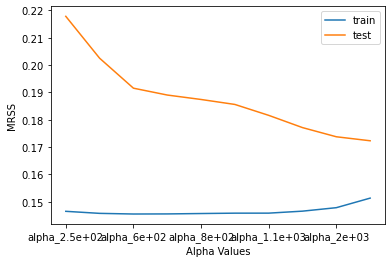

In [ ]:
coef_matrix_lasso[['rmsle_train',	'rmsle_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [ ]:
# 4.3 Now using the optimized alpha value for the Lasso model so we can decrease the error
alpha=1500
lassoreg = Lasso(alpha=1500)
lassoreg.fit(X_train,y_train)
train_y_pred = lassoreg.predict(X_train)
test_y_pred = lassoreg.predict(X_test)
#root means squared log error
rmsle_train=np.sqrt(msle(y_train,train_y_pred))
rmsle_test=np.sqrt(msle(y_test,test_y_pred))
print("RMSLE for train: ",rmsle_train)
print('RMSLE for test: ',rmsle_test)

RMSLE for train:  0.14656089651508764
RMSLE for test:  0.17711141759439333


**Great we can be able to decrease the error by using Regularization from approx 0.18 to 0.14 **

In [ ]:
#4.4  Bagging model (Random Forest)
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predict_train=random_forest.predict(X_train)
predict_test= random_forest.predict(X_test)

rmslet=np.sqrt(msle(y_train,predict_train))
rmslete=np.sqrt(msle(y_test,predict_test))
print('RMSLE for train(RandomFores): ',rmslet)
print('RMSLE for test(RandomFores): ',rmslete)



# 4.5 Boosting model (AdaBoost)
adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)
y_pred_train=adaboost.predict(X_train)
y_pred_test = adaboost.predict(X_test)
error_train=np.sqrt(msle(y_train,y_pred_train))
error_test=np.sqrt(msle(y_test,y_pred_test))

print('RMSLE for train (AdaBoost):', error_train)
print('RMSLE for train (AdaBoost):', error_test)

RMSLE for train(RandomFores):  0.05993864571651701
RMSLE for test(RandomFores):  0.15501467523909793
RMSLE for train (AdaBoost): 0.18436362372194834
RMSLE for train (AdaBoost): 0.21848642614438274


In [ ]:
# 5 We have define a function which takes input linear model instance,independent variable,dependent variable
# It return the RMSLE for the given model

def model_error(ml_model,x,y,rstate = 11):
    i = 1
    rmsle1= []
    x=x
    y=y
    #Creating instance of KFold() and puting n_splits=5
    kf = KFold(n_splits=5,random_state=rstate,shuffle=True)
    for train_index,test_index in kf.split(x,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        x_train,x_test = x.loc[train_index],x.loc[test_index]
        y_train1,y_test1 = y[train_index],y[test_index]

        model = ml_model
        model.fit(x_train, y_train1)
        pred_test = model.predict(x_test)

        rmsle =np.sqrt(msle(np.abs(pred_test),np.abs(y_test1)))
        sufix = ""
        msg = ""

        msg += "Valid RMSLE: {:.5f}".format(rmsle)
        print("{}".format(msg))
        # Save scores
        rmsle1.append(rmsle)
        i+=1
    return rmsle1


In [ ]:
#Importing the decision tree regressor
from sklearn.tree import DecisionTreeRegressor

#Creating instance of decisiontreeregressor  and putting hyperparameter
dtr=DecisionTreeRegressor(random_state=12,max_depth=15,min_samples_leaf=25, min_samples_split=25)

In [ ]:
##Calling the function model_score()
dtr1=model_error(dtr,X,y)


1 of kfold 5
Valid RMSLE: 0.17862

2 of kfold 5
Valid RMSLE: 0.19847

3 of kfold 5
Valid RMSLE: 0.20931

4 of kfold 5
Valid RMSLE: 0.17837

5 of kfold 5
Valid RMSLE: 0.19572


In [ ]:
#Call model error with linear regression instance
lr=model_error(Lr,X,y)


1 of kfold 5
Valid RMSLE: 0.18126

2 of kfold 5
Valid RMSLE: 0.17389

3 of kfold 5
Valid RMSLE: 0.16715

4 of kfold 5
Valid RMSLE: 0.36975

5 of kfold 5
Valid RMSLE: 0.17853


In [ ]:
#calling model error funciton with random forest instance
rfr=model_error(random_forest,X,y)


1 of kfold 5
Valid RMSLE: 0.13779

2 of kfold 5
Valid RMSLE: 0.16294

3 of kfold 5
Valid RMSLE: 0.15417

4 of kfold 5
Valid RMSLE: 0.13701

5 of kfold 5
Valid RMSLE: 0.15299


In [ ]:
#shape of train and test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1168, 80), (1168,), (292, 80), (292,))

**Linear regression and randomforest is working well**

In [ ]:
# 6: Hyperparameter Tuning
# Grid search for Random Forest hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]    #If our model not perform well on this hyperparameter then we can all add more hyperparameter

}


grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

#  the best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rmsle_b = np.sqrt(msle(y_test, y_pred_best_rf))
print('best rmsle (Random Forest):', rmsle_b)


# Grid search for AdaBoost hyperparameters
param_grid_adaboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=3)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost model
best_adaboost = grid_search_adaboost.best_estimator_
y_pred_best_adaboost = best_adaboost.predict(X_test)
rmsle_add = np.sqrt(msle(y_test, y_pred_best_adaboost))
print('Best rmsle (AdaBoost):', rmsle_add)


best rmsle (Random Forest): 0.1546360564444807
Best rmsle (AdaBoost): 0.2252018110826399


**Well** we can see the lowest error is in  random forest approx 0.14 which is better than addaboost

In [ ]:
# 7 Feature selection techniques
# importing the SequentialFeatureSelector from mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# initallization SequentialFeatureSelector with randomforest instance and other parameter of sfs (forward feature selection)
sfs1 = sfs(best_rf, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_log_error',n_jobs=-1)

#sfs1 = sfs(best_rf, k_features=30, forward=False, verbose=2, scoring='neg_mean_squared_log_error') (backward elimination)

In [ ]:
#fittig SequentialFeatureSelector model
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished

[2023-06-13 20:05:25] Features: 1/4 -- score: -0.053576977289495585[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:  1.0min finished

[2023-06-13 20:06:27] Features: 2/4 -- score: -0.04157964901735519[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:  1.2min finished

[2023-06-13 20:07:41] Features: 3/4 -- score: -0.034489707076611344[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done  77 

In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['GrLivArea', 'BedroomAbvGr', 'Street', 'OverallQual']


In [ ]:
# creating a new dataframe using the above variables and adding the target variable
new_data = data[feat_names]
new_data['SalePrice'] = data['SalePrice']

In [ ]:
# first five rows of the new data
new_data.head()


GrLivArea  BedroomAbvGr  Street  OverallQual  SalePrice
0    1.7e+03             3       1            6     208500
1    1.3e+03             3       1            5     181500
2    1.8e+03             3       1            6     223500
3    1.7e+03             3       1            6     140000
4    2.2e+03             4       1            7     250000

In [ ]:
X_new=new_data.drop('SalePrice',axis=1)
y_new=new_data['SalePrice']

In [ ]:
# 8 : Stacking of multiple models to improve the model performance


# Creating the list of estimators
estimators = [Lasso(alpha=alpha),AdaBoostRegressor()]
sr = StackingRegressor(estimators,RandomForestRegressor(n_estimators=10,random_state=42))
sr.fit(X_train, y_train)
# Predict using the stacking regressor
predicttrain=sr.predict(X_train)
predicttest=sr.predict(X_test)

errortrain=np.sqrt(msle(y_train,predicttrain))
errortest=np.sqrt(msle(y_test,predicttest))
print('RMSLE for train (Stacking):',errortrain)
print('RMSLE for test (Stacking):',errortest)


RMSLE for train (Stacking): 0.06098951212252701
RMSLE for test (Stacking): 0.16378962006690967


With the help of stacking we can be able to decrease the error value

In [ ]:
# 9 checking the residual for homoscedasticity and normal distribution
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' :y_pred_best_rf,
})
residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

fitted values  predicted values  residuals
892          154500           1.4e+05    1.5e+04
1105         325000           3.3e+05   -7.4e+03
413          115000           1.2e+05   -1.8e+03
522          159000           1.6e+05   -2.2e+03
1036         315500           3.2e+05   -1.9e+03

 Plotting residual curve (if there constant Variance OR **Homoscedastic**?)

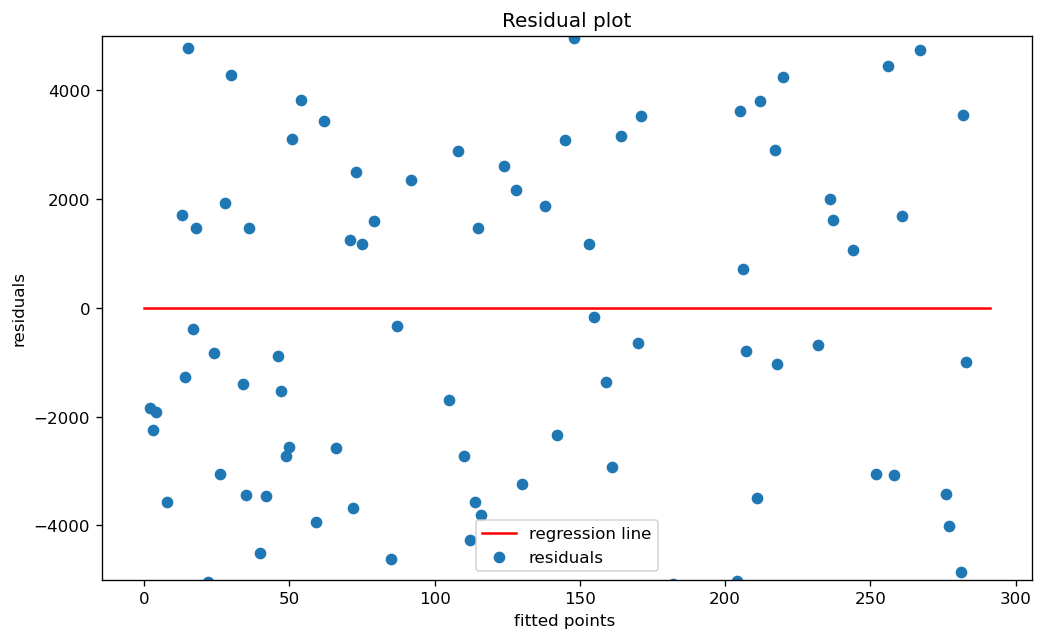

In [ ]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
l=len(y_test)
f = range(0,l)
k = [0 for i in range(0,l)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-5000, 5000)
plt.legend()

# From the above scatter plot we can assume that there is not any pattern in the residuals

Checking the **normal** distribution of the residual or not

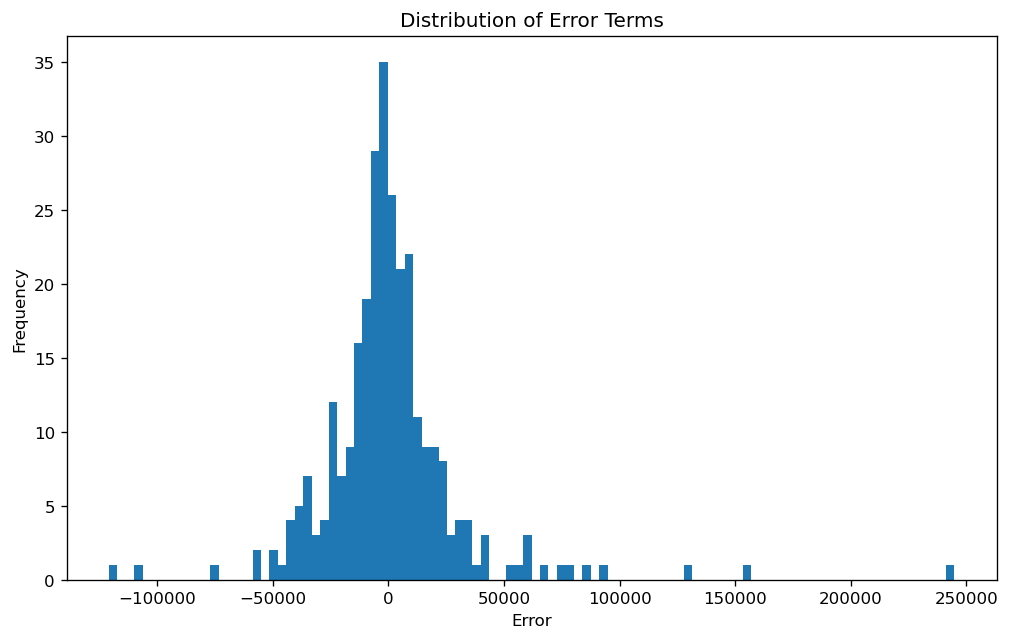

In [ ]:
#Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 100)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

Residual values is normally distributed but having some outliers

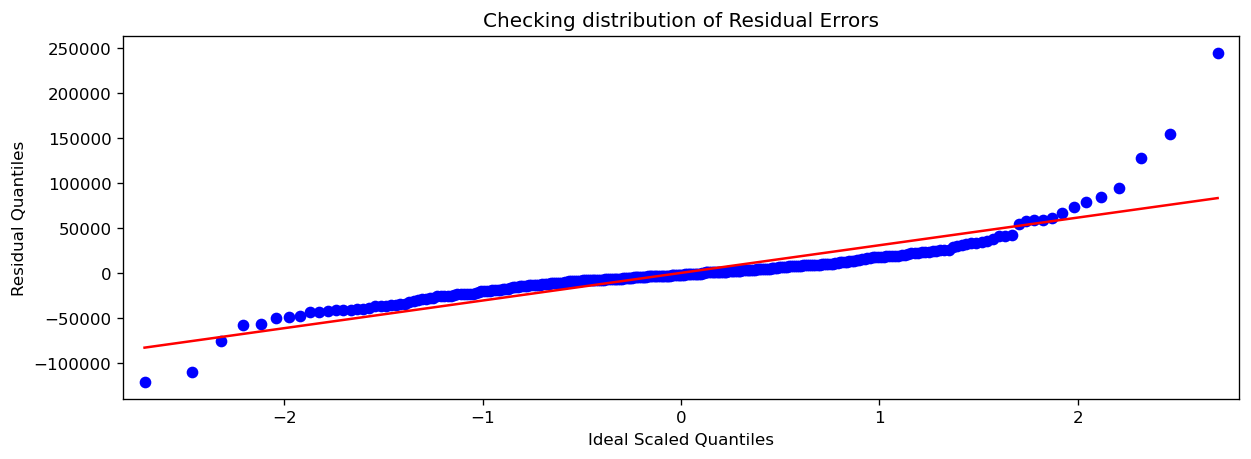

In [ ]:
#QQplot for distribution
from statsmodels.graphics.gofplots import qqplot
fig,ax=plt.subplots(figsize=(12,4),dpi=120)
#plotting qqplot
qqplot(residuals.residuals,line='s',ax=ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

# The Above QQ-plot clearly tell that the residual are normally distributed with few outliers

In [ ]:
# 10 Analysis of Feature Importance
# Random Forest Feature Importance
importances = best_rf.feature_importances_
#creating dataframe
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
#soritng the features in decending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print('Random Forest Feature Importance:')
print(feature_importance_rf)

Random Forest Feature Importance:
         Feature  Importance
17  BedroomAbvGr        0.56
46   OverallQual        0.12
43    Condition2       0.039
38     Utilities        0.03
34        Street        0.03
..           ...         ...
64    Electrical     5.2e-05
75   MiscFeature     3.9e-05
5     BsmtFinSF1     5.6e-06
74         Fence     4.2e-06
9       1stFlrSF     2.9e-07

[80 rows x 2 columns]


# RandomForest feature_importances_ tells that BedroomAbFGr ,OverallQual,Utilites ,HeatingQC and Street are most important feature

In [ ]:
# 11 Analysis of Feature Importance
# Lasso Feature Importance
importances = lassoreg.coef_
#creating dataframe
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
#soritng the features in decending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print('Lasso regression Feature Importance:')
print(feature_importance_rf)

Lasso regression Feature Importance:
         Feature  Importance
46   OverallQual     2.1e+04
17  BedroomAbvGr     1.7e+04
34        Street     8.8e+03
4     MasVnrArea     5.9e+03
19  TotRmsAbvGrd     4.5e+03
..           ...         ...
52    MasVnrType    -2.9e+03
72    PavedDrive    -5.7e+03
27     3SsnPorch    -6.4e+03
53     ExterQual    -7.4e+03
30       MiscVal    -8.2e+03

[80 rows x 2 columns]


The top features according to lasso regression are OverallQual,BedroomAbvGr and Utilites.

In [ ]:
# 12 Analysis of Feature Importance
# AdaBoost Feature Importance
importances = best_adaboost.feature_importances_
feature_importance_adaboost = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_adaboost = feature_importance_adaboost.sort_values(by='Importance', ascending=False)
print('AdaBoost Feature Importance:')
print(feature_importance_adaboost)

AdaBoost Feature Importance:
          Feature  Importance
17   BedroomAbvGr        0.26
46    OverallQual        0.11
49       RoofMatl       0.077
61        Heating       0.068
12      GrLivArea       0.064
..            ...         ...
36       LotShape           0
31      SalePrice           0
26  EnclosedPorch           0
25    OpenPorchSF           0
50    Exterior1st           0

[80 rows x 2 columns]


# **According** to **importance** of feature we can train our model while using the **top** **features**

# Collecting the top features according to feature selection and feature importance from different models

In [ ]:
#features collection
features_of_models=['BedroomAbvGr','OverallQual','Utilities','HeatingQC',
                    'Street','TotRmsAbvGrd','Condition2','GrLivArea']

In [ ]:
#dataset of new features collection
newest_data=data[features_of_models]

In [ ]:
#Independent variables
X=newest_data
#dependent variable
y=data['SalePrice']

In [ ]:
# Perform data preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X=pd.DataFrame(X,columns=['BedroomAbvGr','OverallQual','Utilities','HeatingQC',
                    'Street','TotRmsAbvGrd','Condition2','GrLivArea'])
X.head()

BedroomAbvGr  OverallQual  Utilities  HeatingQC  Street  TotRmsAbvGrd   
0          0.17         0.65     -0.026      -0.88   0.064          0.98  \
1          0.17       -0.072     -0.026      -0.88   0.064         -0.32   
2          0.17         0.65     -0.026      -0.88   0.064         -0.32   
3          0.17         0.65     -0.026       0.27   0.064          0.33   
4           1.3          1.4     -0.026      -0.88   0.064           1.6   

   Condition2  GrLivArea  
0      -0.032       0.48  
1      -0.032      -0.51  
2      -0.032       0.64  
3      -0.032       0.49  
4      -0.032        1.6

In [ ]:
#Importing module
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Spiliting into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#(Random Forest)
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predict_train=random_forest.predict(X_train)
predict_test= random_forest.predict(X_test)

rmslet=np.sqrt(msle(y_train,predict_train))
rmslete=np.sqrt(msle(y_test,predict_test))
r2_score1=r2_score(y_test,predict_test)
print("r2_score: ", r2_score1)
print('RMSLE for test(RandomFores): ',rmslete)

r2_score:  0.8009654139179049
RMSLE for test(RandomFores):  0.20862203511828883


In [ ]:
# Hyperparameter Tuning
# Grid search for Random Forest hyperparameters
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10]    #If our model not perform well on this hyperparameter then we can all add more hyperparameter

}


grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)

#  the best Random Forest model
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rmsle_b = np.sqrt(msle(y_test, y_pred_best_rf))
print('best rmsle (Random Forest):', rmsle_b)


# Grid search for AdaBoost hyperparameters
param_grid_adaboost = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search_adaboost = GridSearchCV(estimator=adaboost, param_grid=param_grid_adaboost, cv=3)
grid_search_adaboost.fit(X_train, y_train)

# Get the best AdaBoost model
best_adaboost = grid_search_adaboost.best_estimator_
y_pred_best_adaboost = best_adaboost.predict(X_test)
rmsle_add = np.sqrt(msle(y_test, y_pred_best_adaboost))
print('Best rmsle (AdaBoost):', rmsle_add)

best rmsle (Random Forest): 0.20365342656435234
Best rmsle (AdaBoost): 0.23368008463732176


In [ ]:
# Stacking of multiple models to improve the model performance

# Creating the list of estimators
estimators = [Lasso(alpha=alpha),AdaBoostRegressor()]
sr = StackingRegressor(estimators,RandomForestRegressor(n_estimators=10,random_state=42))
sr.fit(X_train, y_train)
# Predict using the stacking regressor
predicttrain=sr.predict(X_train)
predicttest=sr.predict(X_test)

errortrain=np.sqrt(msle(y_train,predicttrain))
errortest=np.sqrt(msle(y_test,predicttest))
r2_score2=r2_score(y_test,predicttest)
print('RMSLE for test (Stacking):',errortest)
print('R2_score : ',r2_score2)

RMSLE for test (Stacking): 0.2124673599550585
R2_score :  0.7971434575200685


In [ ]:
#Shape of new formed dataset
newest_data.shape

(1460, 8)

# Wonderful! with the help of feature selection ,feature importance ,stacking,hyperparameter tuning in ensemble model we are successfully able to decrease the number of features from 80 to 8.

The best thing is we are getting same RMSLE as we are getting with the help of 80 features